In [180]:
## Spring 2019 Deep Learning In-class Demo. ##
## Copyright@ Cong Gao, the Johns Hopkins University, cgao11@jhu.edu 

import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

relu_flag = False
show_weight = True

In [181]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        print('Initialize!!!')
        #nn.init.constant(m.weight.data, 0.0)
        #nn.init.normal_(m.weight.data)
        #nn.init.xavier_normal_(m.weight.data)
        nn.init.kaiming_normal_(m.weight.data)
        nn.init.constant(m.bias.data, -2.0)

Text(0.5,1,'Data Distribution')

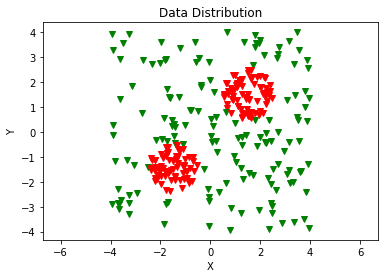

In [182]:
# Plot data
X = np.load('demo_data_x.npy')
Y = np.load('demo_data_y.npy')
n_samples = Y.shape[0]
plt.figure()
for i in range(n_samples):
    if Y[i] == 1:
        plt.plot(X[i,0], X[i,1], "rv")
    else:
        plt.plot(X[i,0], X[i,1], "gv")

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.title('Data Distribution')

In [183]:
def plot_points (X, Y, params, scale, n, data):
    '''
    plot points in the virtualization image
    '''
    points_color = [[0., 0. , 255.], [255., 0., 0.], [0., 255., 0.],[0., 0. , 0.]]
    
    for i in range(X.shape[0]):
        x1 = int(int( X[i,0] * n / (scale*2)) + n/2)
        x2 = int(int( X[i,1] * n / (scale*2)) + n/2)
        data[x1,x2] = points_color[int(Y[i])]
        data[x1+1,x2] = points_color[int(Y[i])]
        data[x1,x2+1] = points_color[int(Y[i])]
        data[x1+1,x2+1] = points_color[int(Y[i])]

    return data


def plot_background (params, scale, n):
    '''
    color background in the virtualization image
    '''

    background_color = [[0., 191., 255.], [255., 110., 180.], [202., 255., 112.],[156., 156., 156.]]
   
    data = np.zeros((n,n,3), dtype='uint8')
    
    for i in range(n):
        x1 = -scale + 2 * scale / n * i
        for j in range(n):
            x2 = -scale + 2 * scale / n * j
            input_data = np.array([x1, x2]).astype(float)
            input_data = torch.from_numpy(input_data)
            input_data = input_data.type(torch.FloatTensor)
            if torch.cuda.is_available():
                input_data = Variable(input_data.cuda())
            else:
                input_data = Variable(input_data)
                
            y_hat = params(input_data)
            data[i,j] = background_color [ int(y_hat>0.5)]
    return data


def virtualization(X, y, params):

    scale = 4.5  # the scale of X axis and Y axis. To say, x is from -scale to +scale
    n = 200      # seperate the image into n*n pixels 

    data = plot_background (params, scale, n)
    data = plot_points (X, y, params, scale, n, data)
    
    plt.imshow(data)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

In [184]:
class _2D_Dataset(Dataset):
    """2D-dataSet"""
    
    def __init__(self, data_npy, label_npy, train = True, transform=None):
        self.data = np.load(data_npy)
        self.label = np.load(label_npy)
        self.transform = transform
        self.train_flag = train
    
    def __len__(self):
        return np.shape(self.data)[0]
    
    def __getitem__(self, idx):
        data = np.array(self.data[idx]).astype('float')
        label = np.array(self.label[idx]).astype('float')
        
        sample = {'data': data, 'label': label}
        
        if self.transform:
            sample = self.transform(sample)
        
        sample['data'].astype(float)
        sample['label'].astype(float)
        return sample

In [185]:
class Net(nn.Module):
    def __init__(self, relu = True):
        super(Net, self).__init__()
        self.ly1 = nn.Linear(2, 10)
        self.ly2 = nn.Linear(10, 10)
        self.ly3 = nn.Linear(10, 10)
        self.ly4 = nn.Linear(10, 1)
        if relu:
            self.activ = nn.ReLU()
        else:
            self.activ = nn.Sigmoid()    
        self.out_activ = nn.Sigmoid()
        
    def forward(self, x):
        x = self.ly1(x)
        x = self.activ(x)
        x = self.ly2(x)
        x = self.activ(x)
        x = self.ly3(x)
        x = self.activ(x)
        x = self.ly4(x)
        x = self.out_activ(x)
        return x

In [186]:
model = Net(relu_flag)
if torch.cuda.is_available():
    model.cuda()
    
num_epochs = 1000
learning_rate = 1e-3
batch_size = 20

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

train_dataset=_2D_Dataset(data_npy = 'demo_data_x.npy', label_npy = 'demo_data_y.npy',
                         train = True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


Initialize!!!
Initialize!!!
Initialize!!!
Initialize!!!


/home/cong/Applications/anaconda2/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  if __name__ == '__main__':
/home/cong/Applications/anaconda2/envs/pytorch_env/lib/python3.6/site-packages/torch/nn/functional.py:1474: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


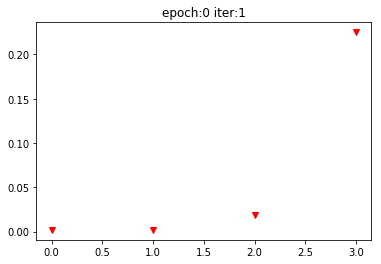

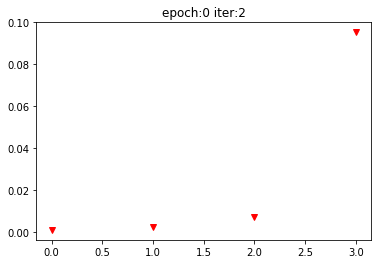

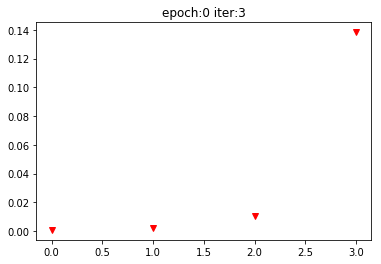

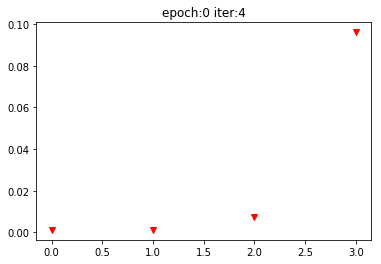

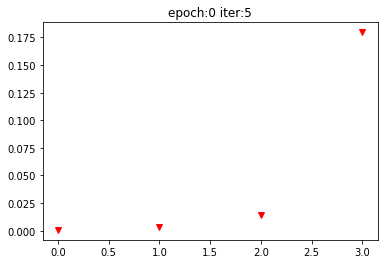

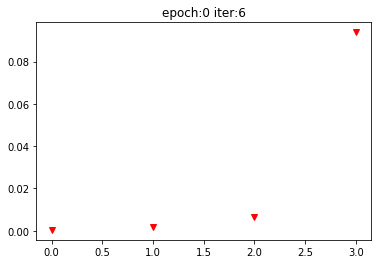

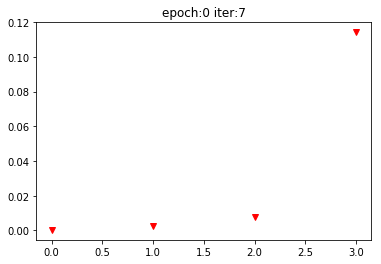

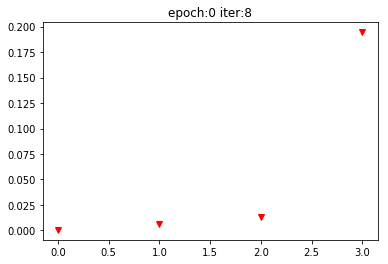

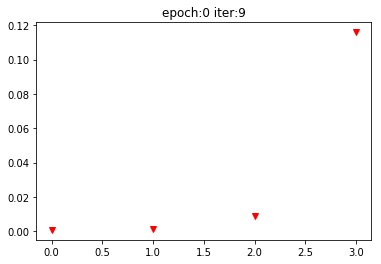

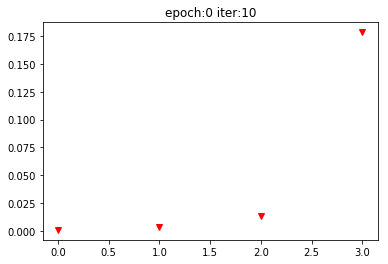

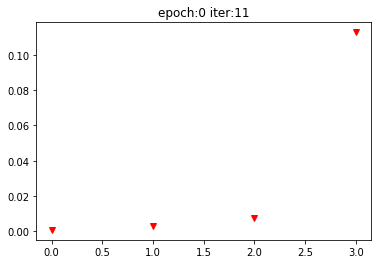

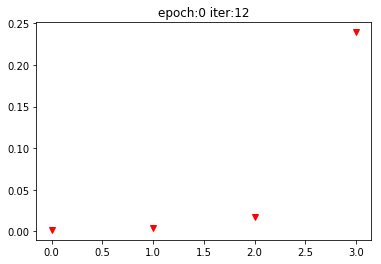

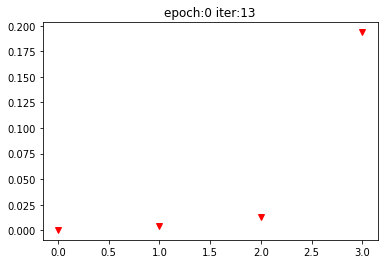

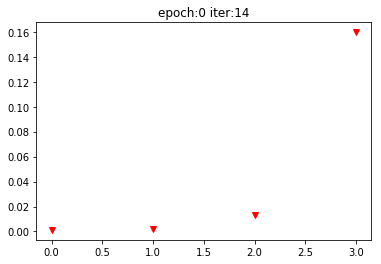

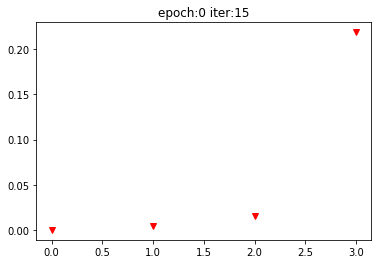

epoch [1/1000], Training loss:1.1173


/home/cong/Applications/anaconda2/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/cong/Applications/anaconda2/envs/pytorch_env/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


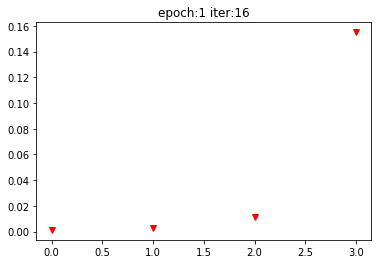

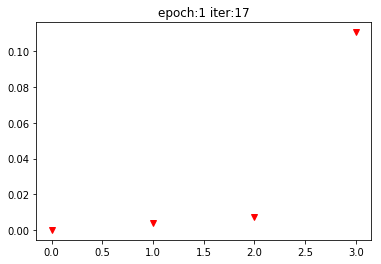

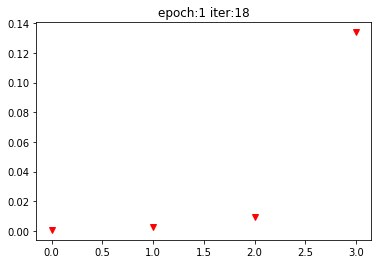

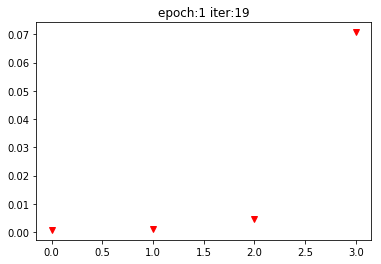

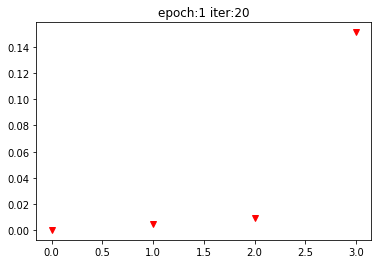

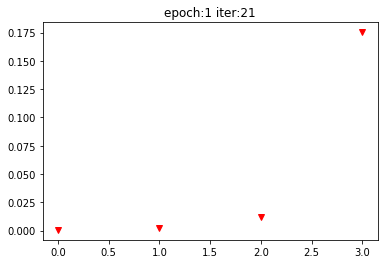

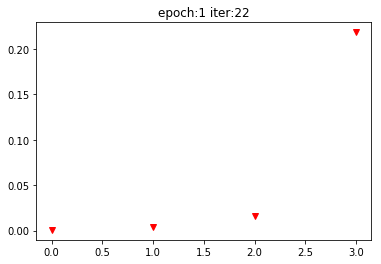

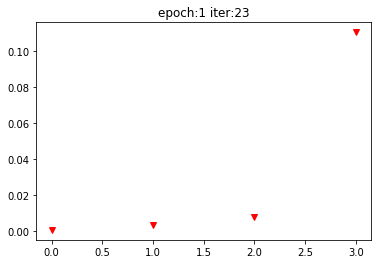

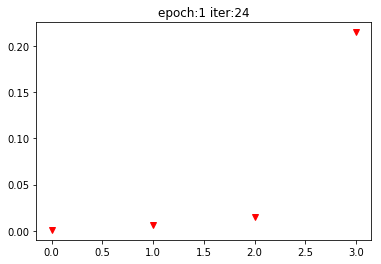

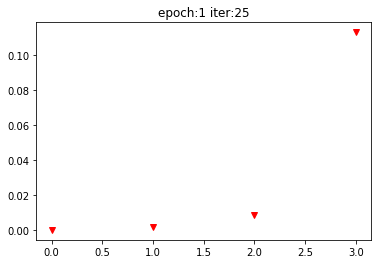

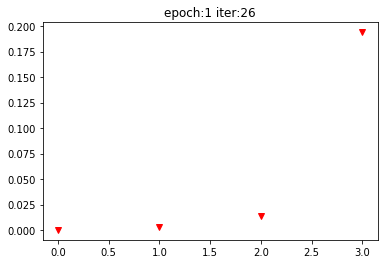

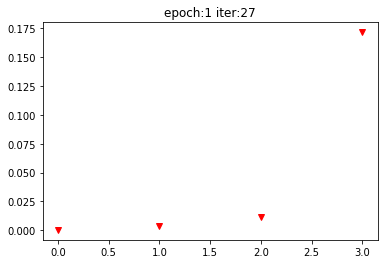

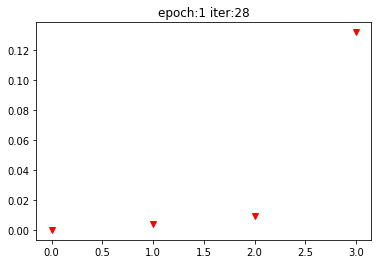

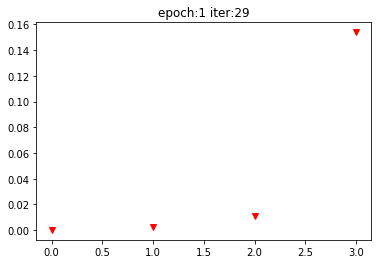

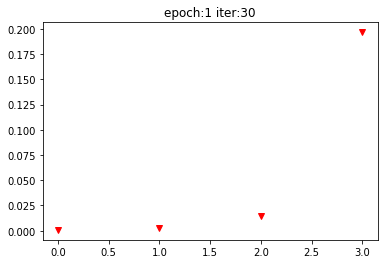

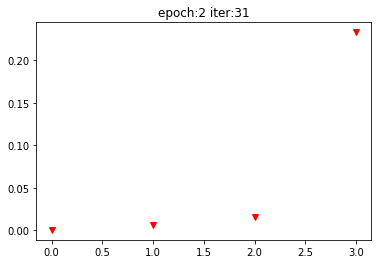

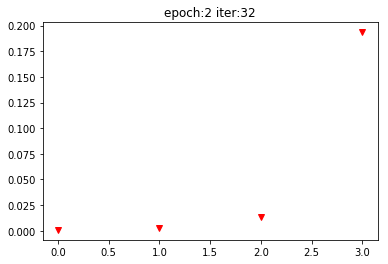

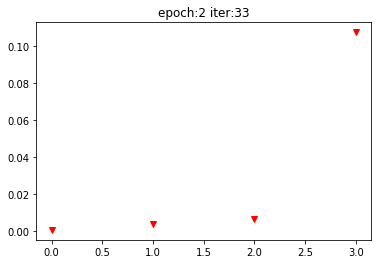

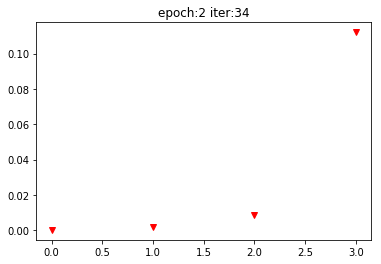

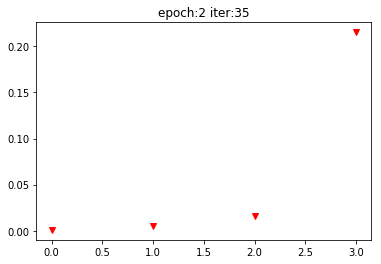

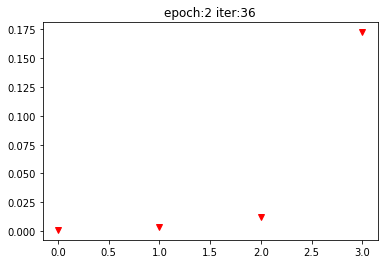

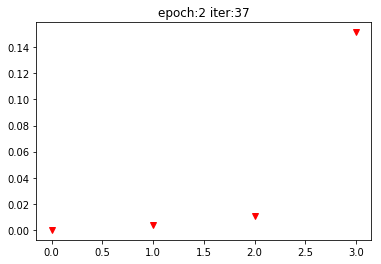

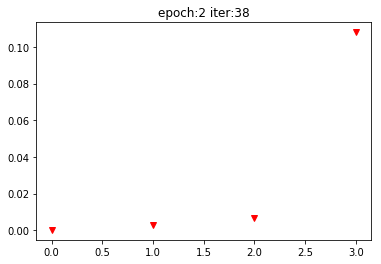

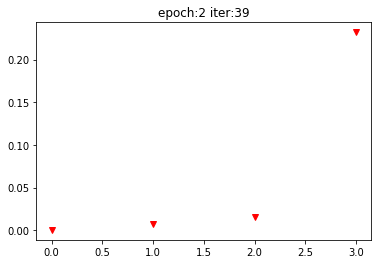

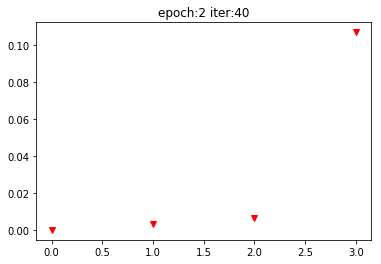

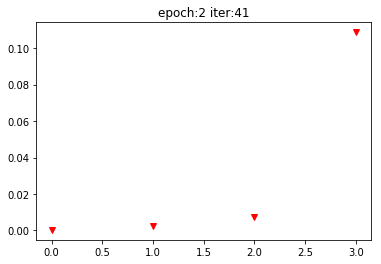

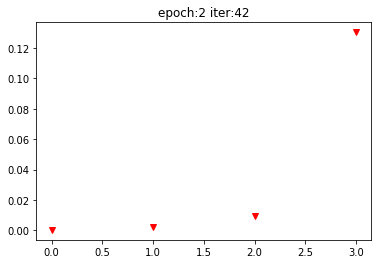

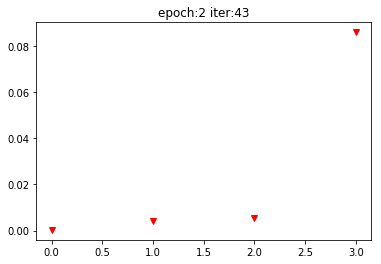

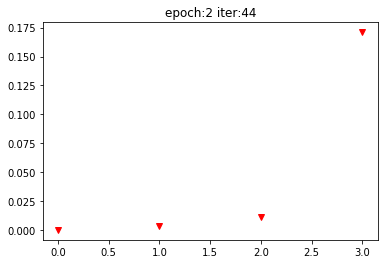

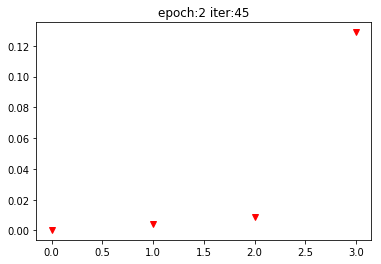

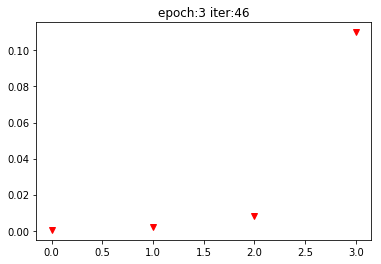

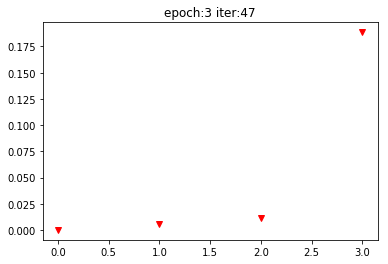

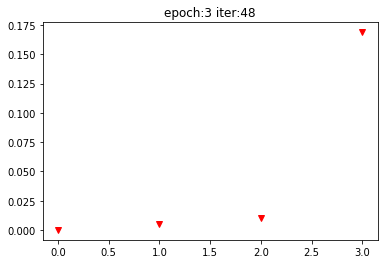

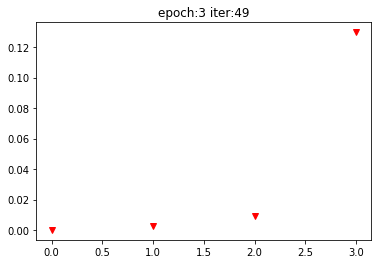

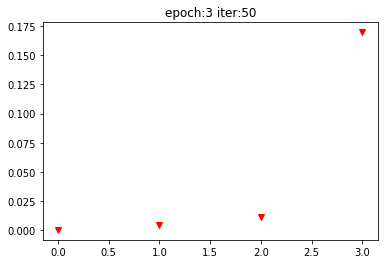

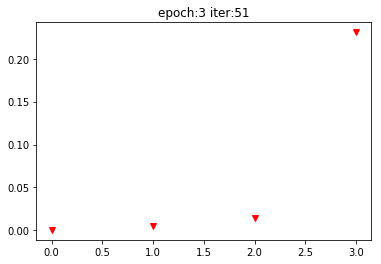

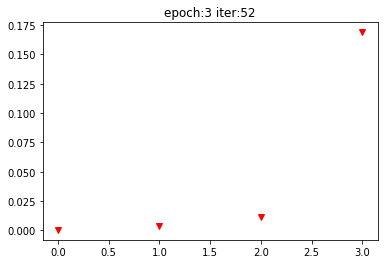

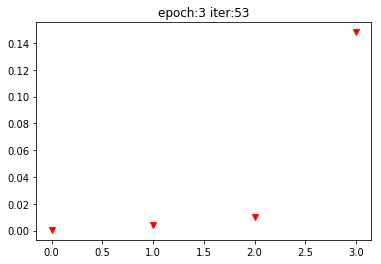

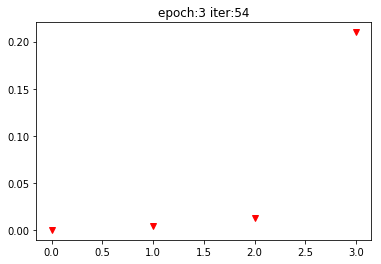

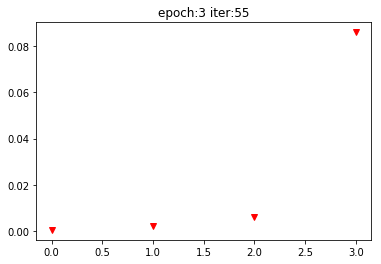

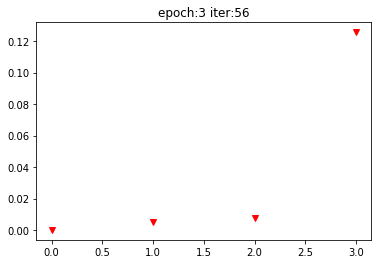

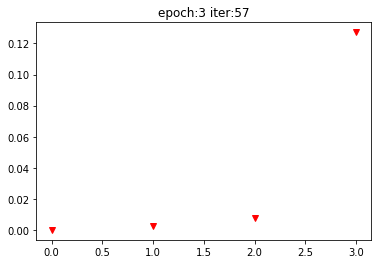

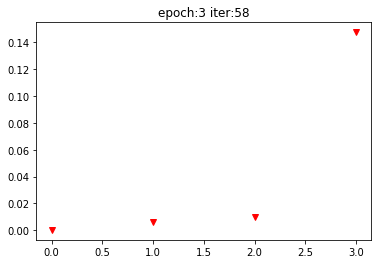

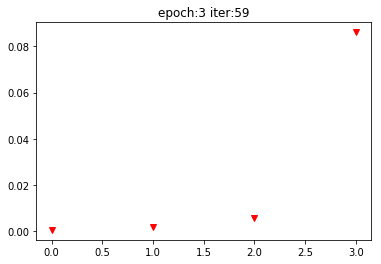

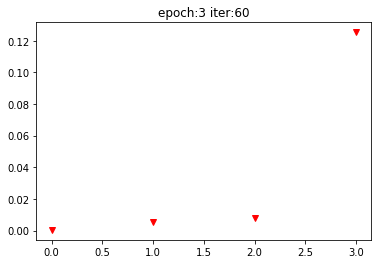

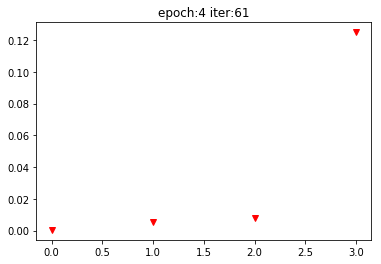

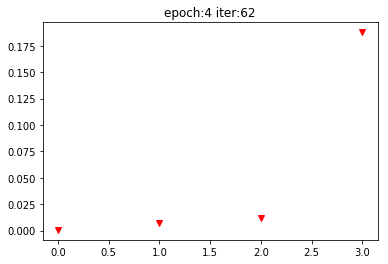

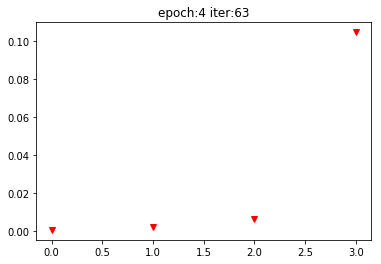

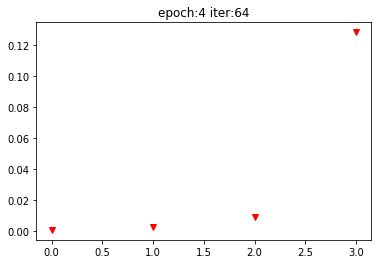

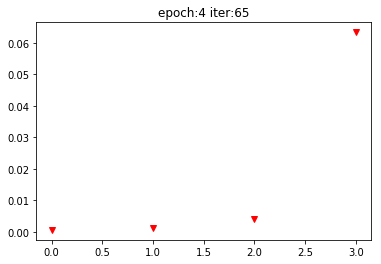

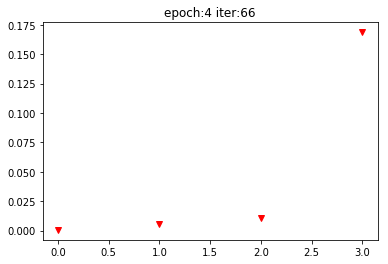

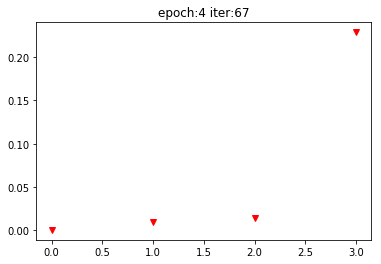

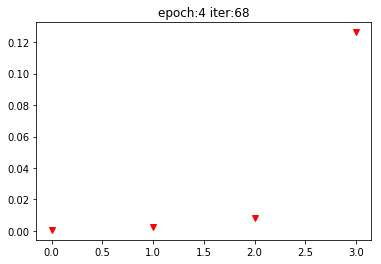

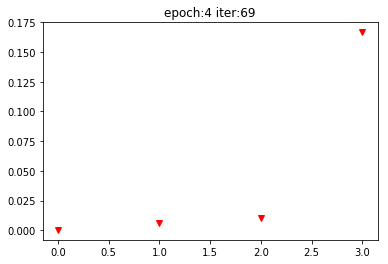

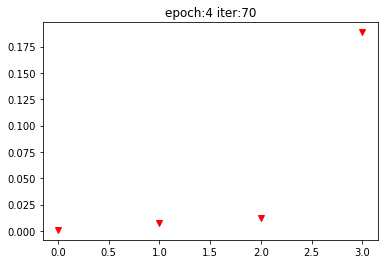

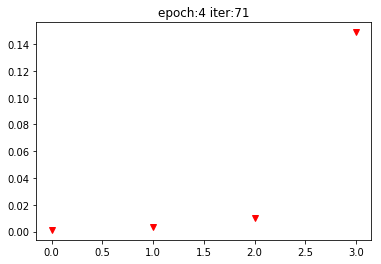

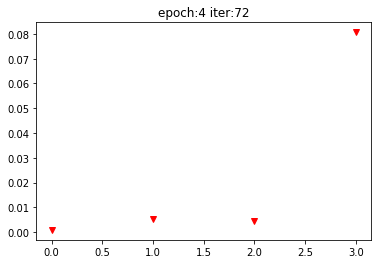

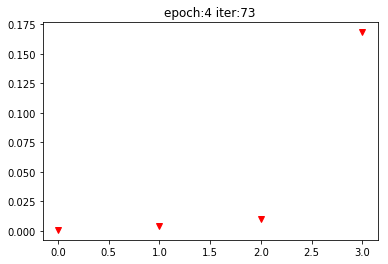

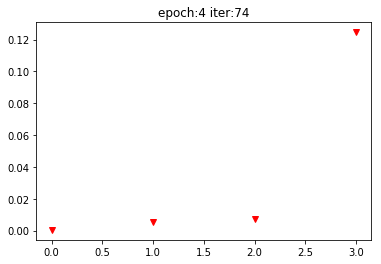

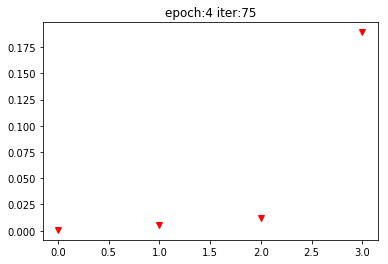

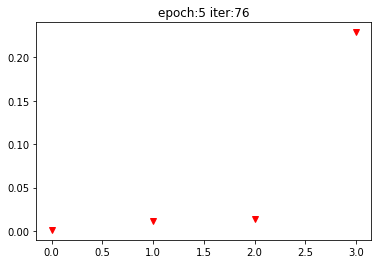

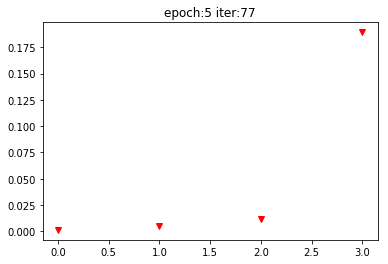

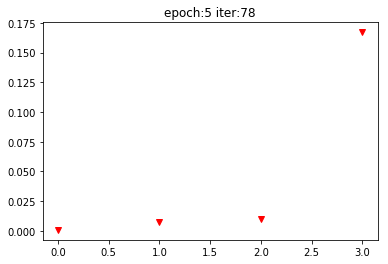

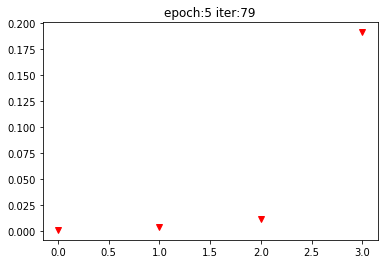

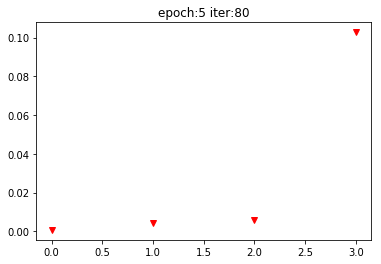

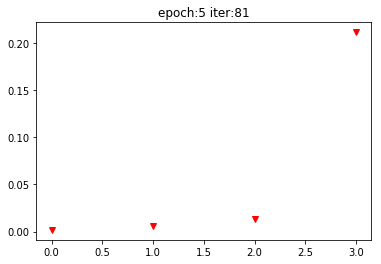

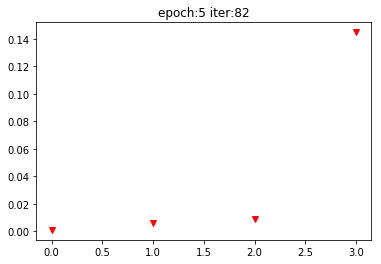

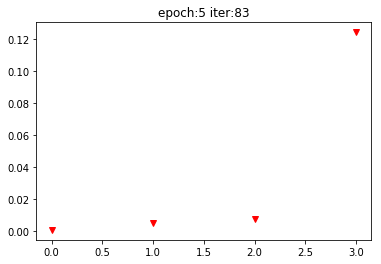

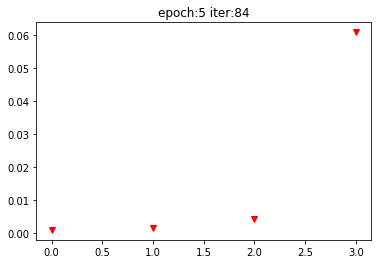

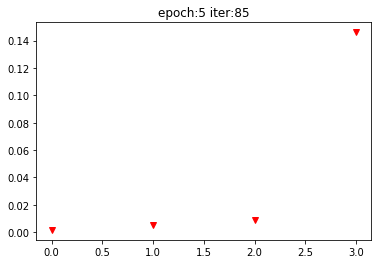

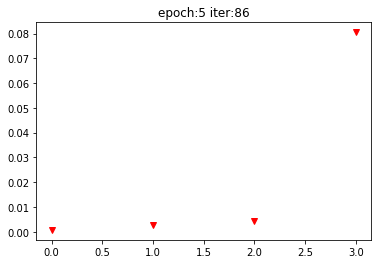

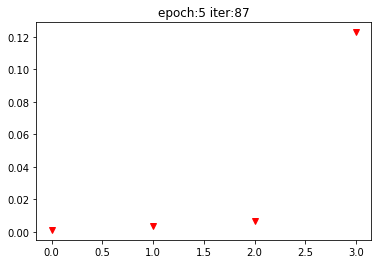

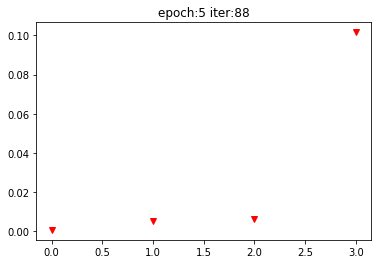

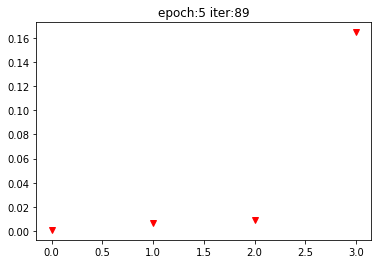

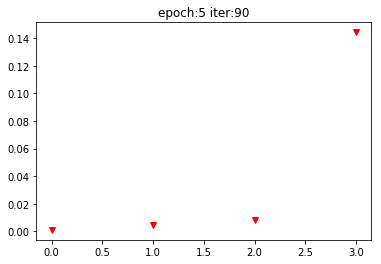

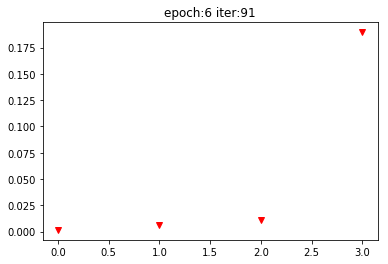

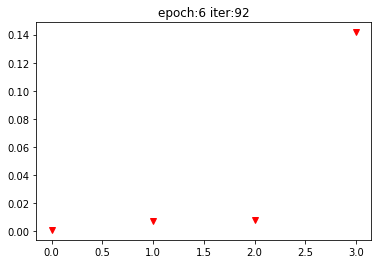

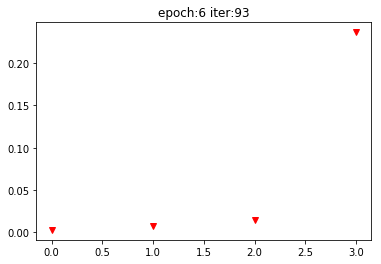

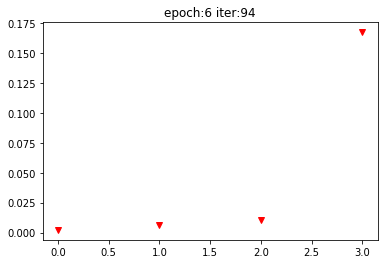

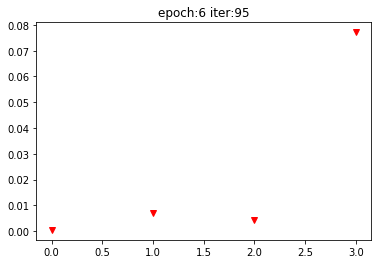

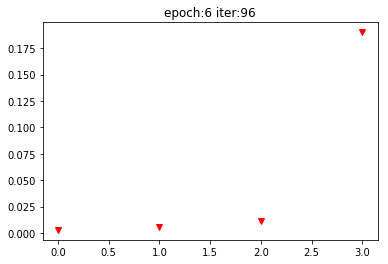

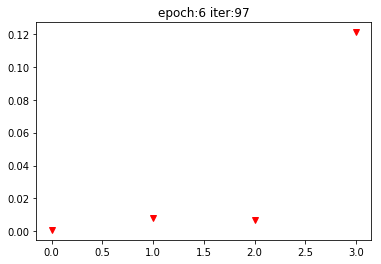

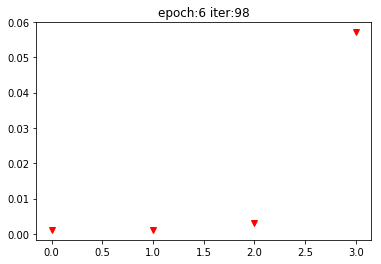

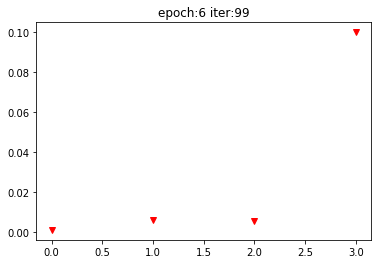

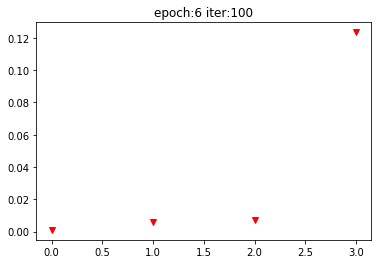

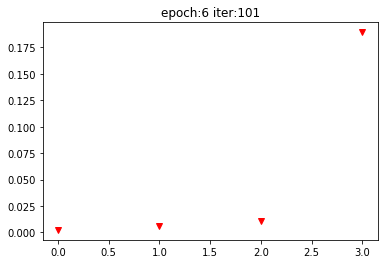

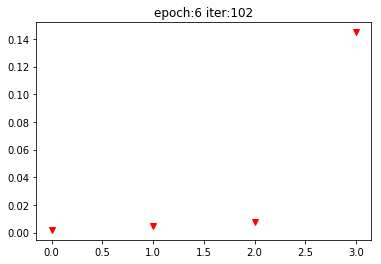

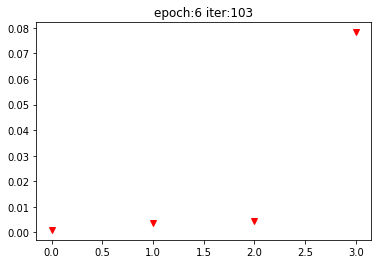

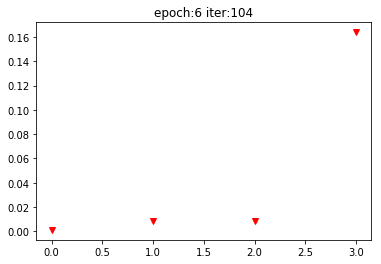

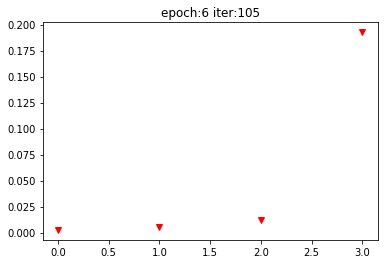

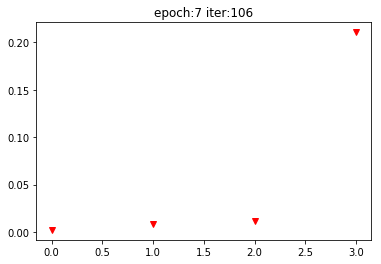

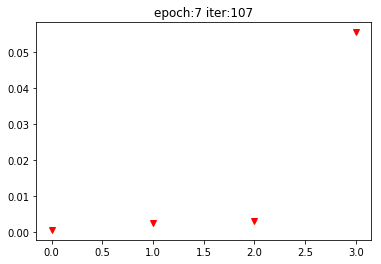

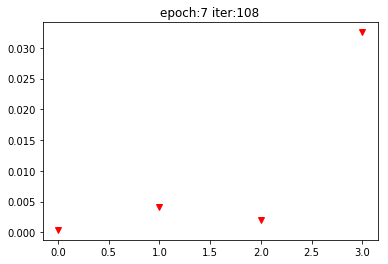

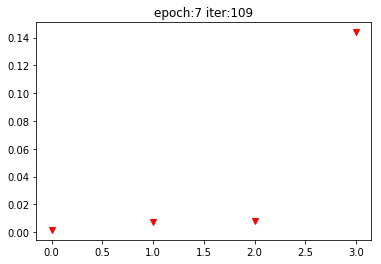

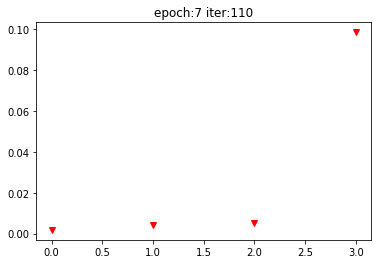

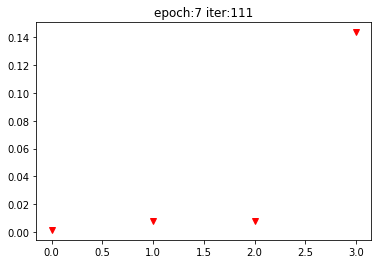

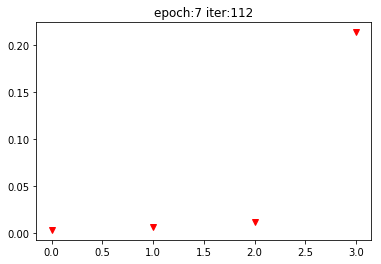

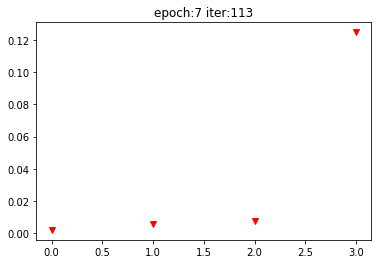

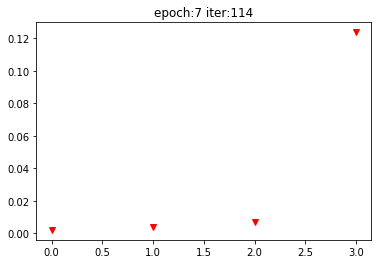

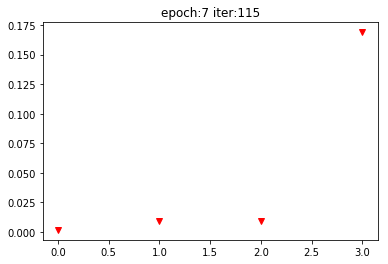

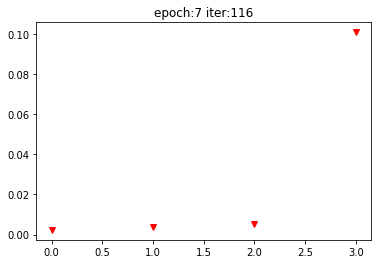

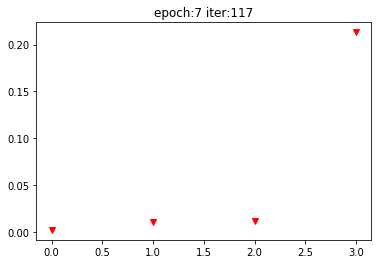

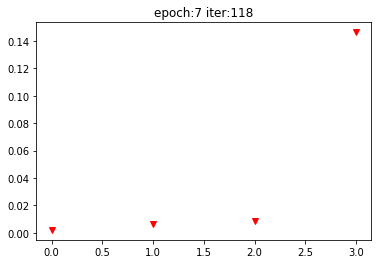

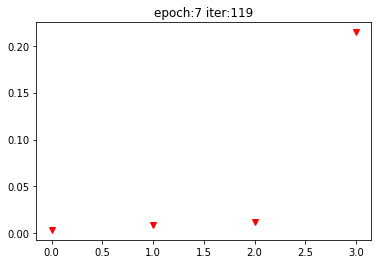

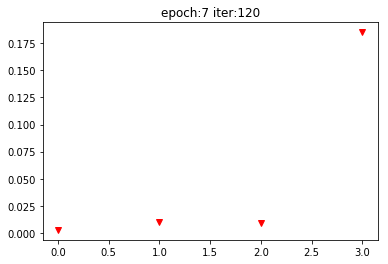

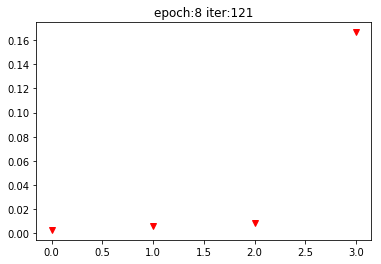

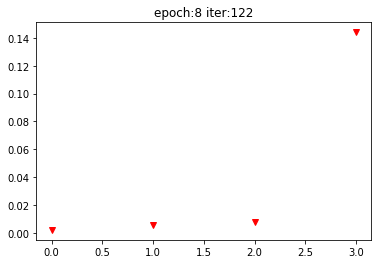

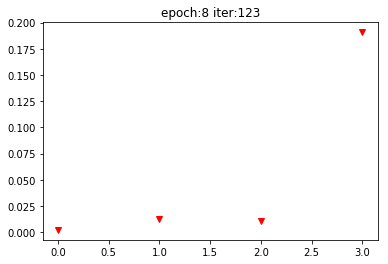

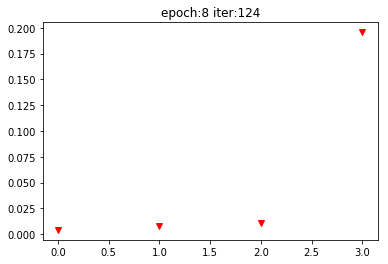

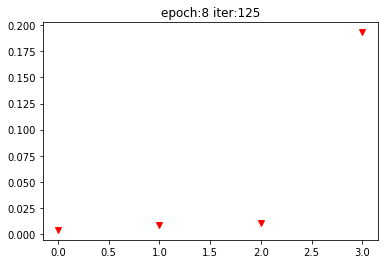

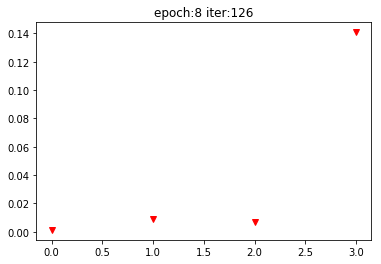

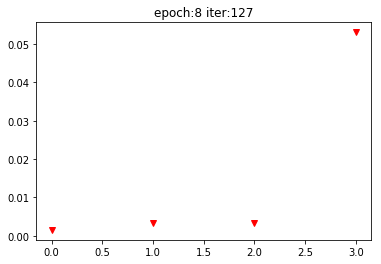

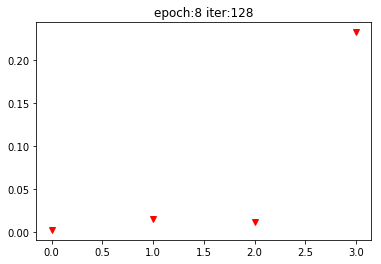

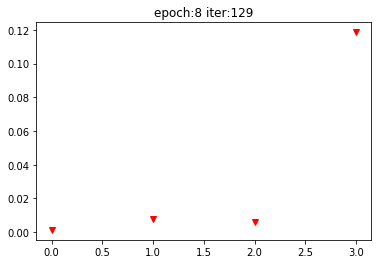

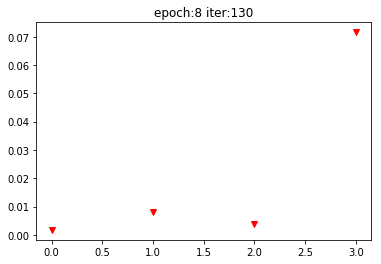

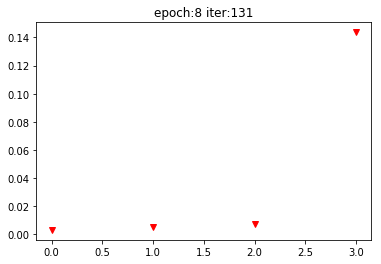

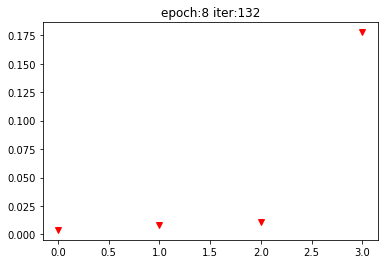

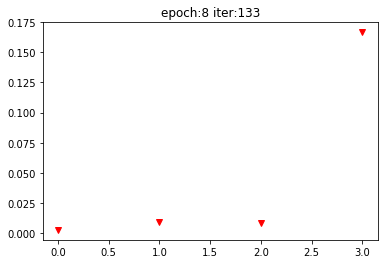

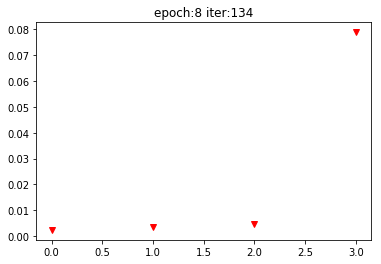

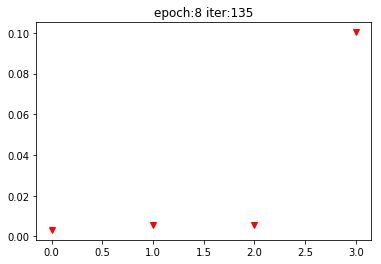

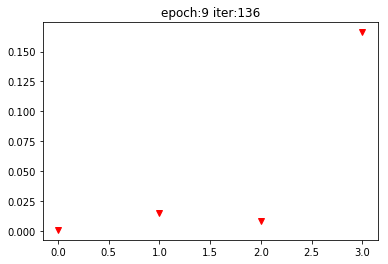

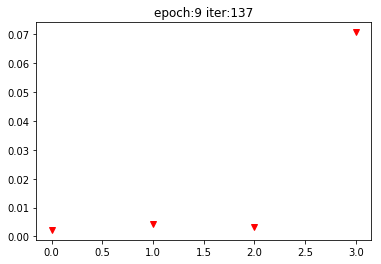

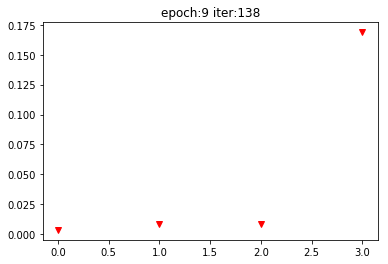

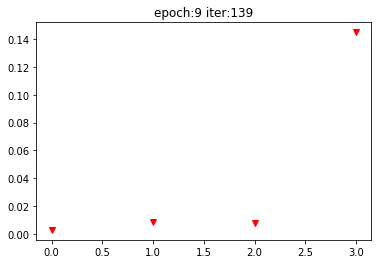

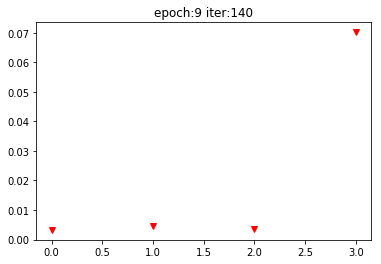

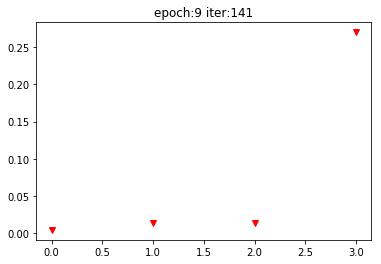

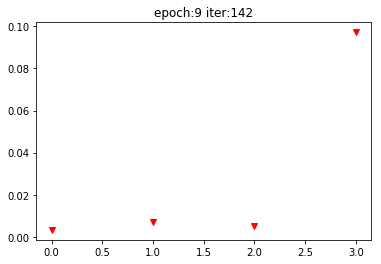

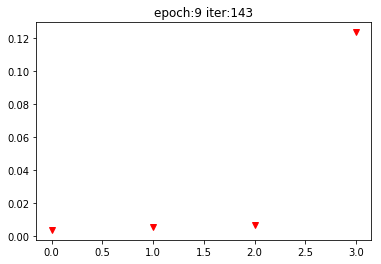

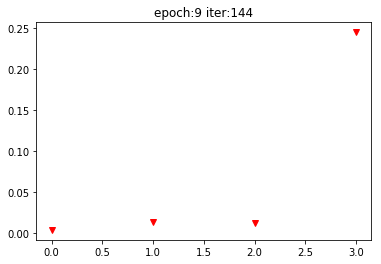

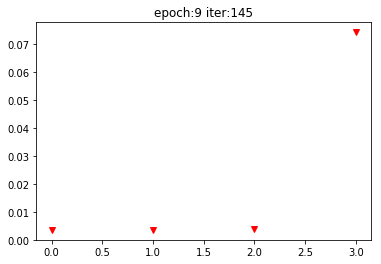

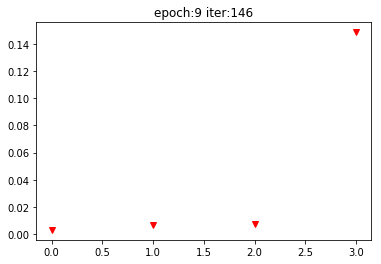

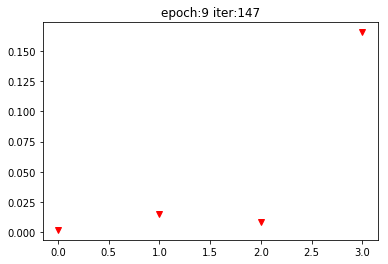

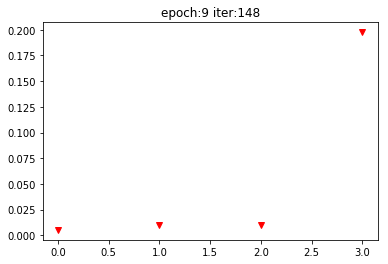

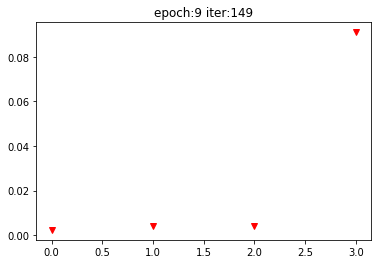

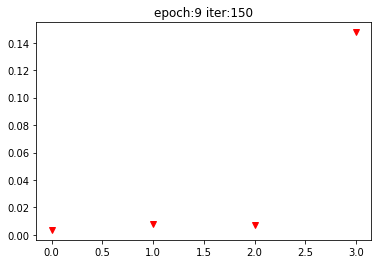

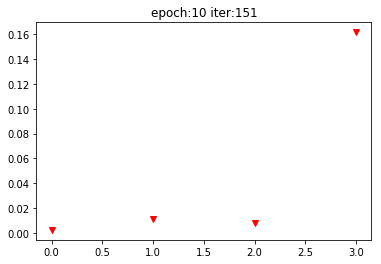

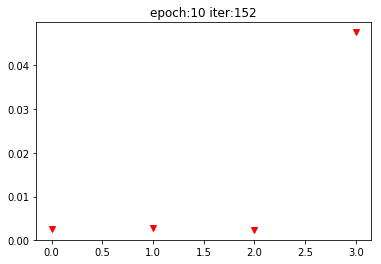

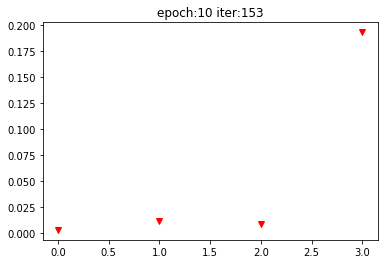

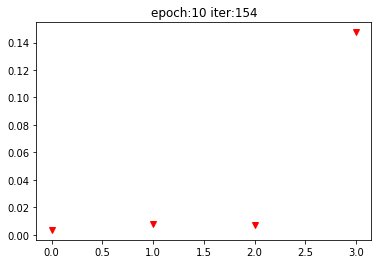

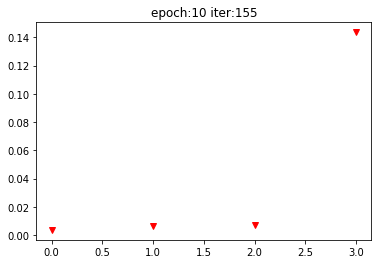

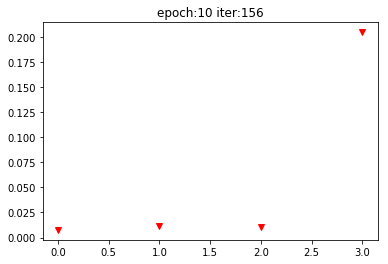

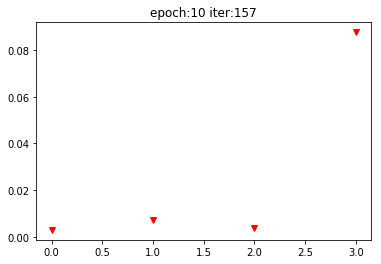

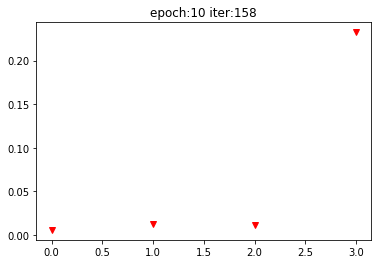

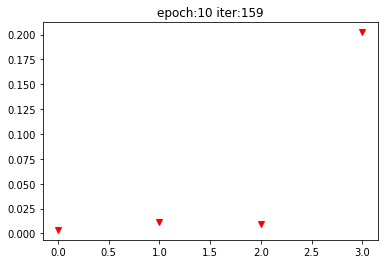

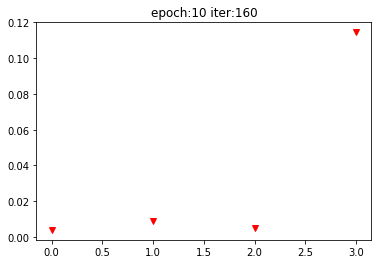

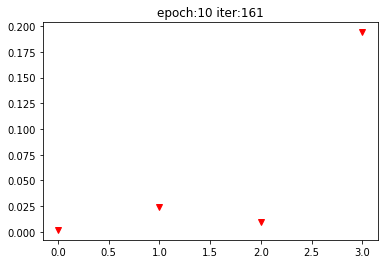

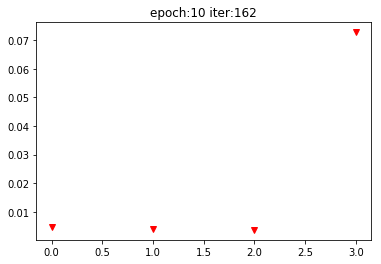

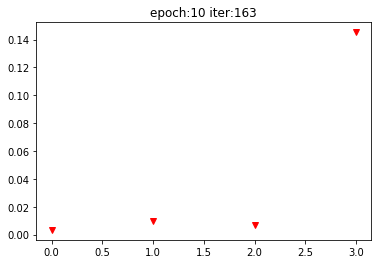

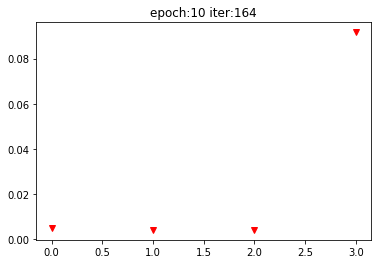

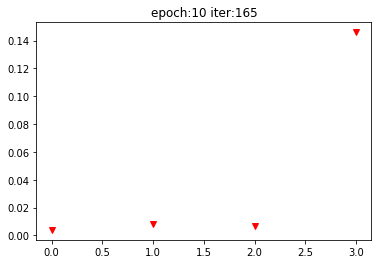

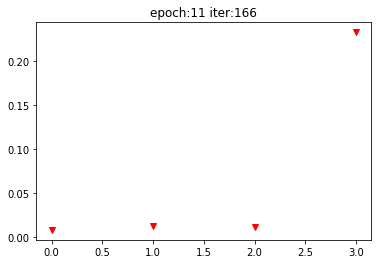

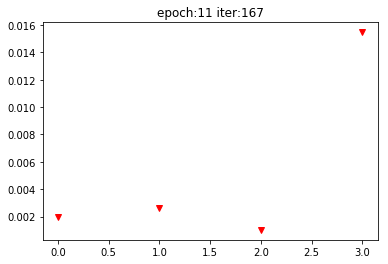

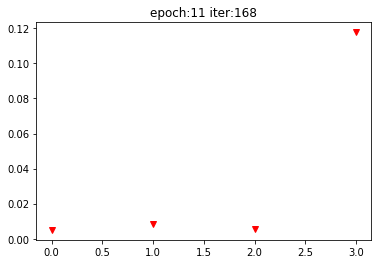

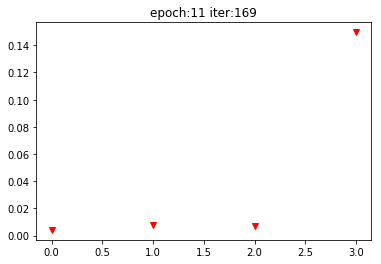

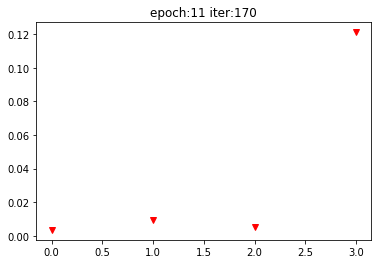

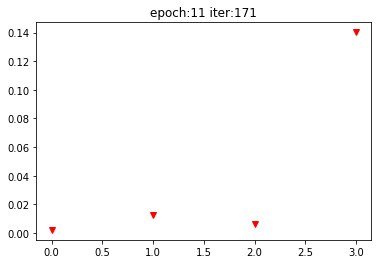

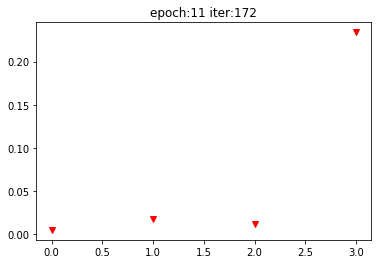

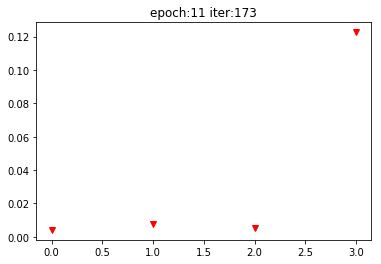

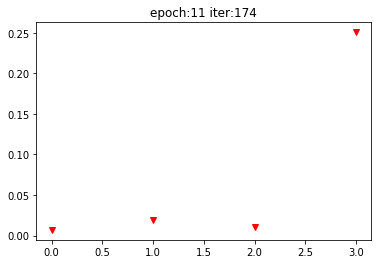

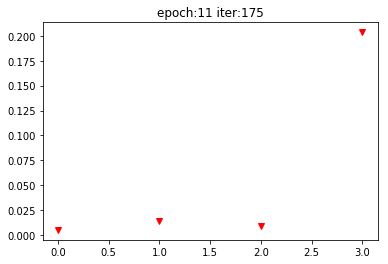

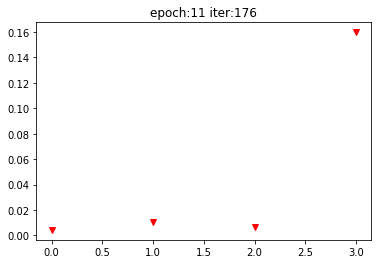

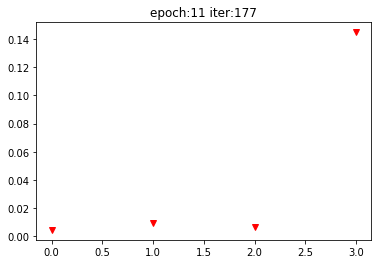

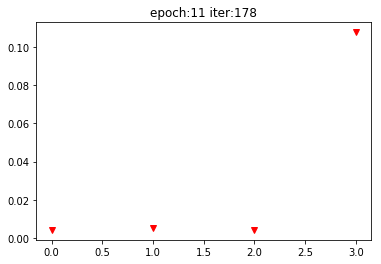

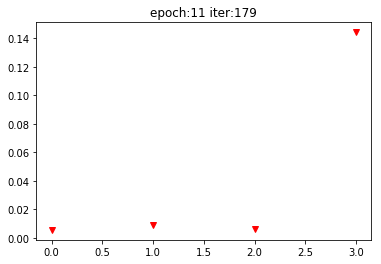

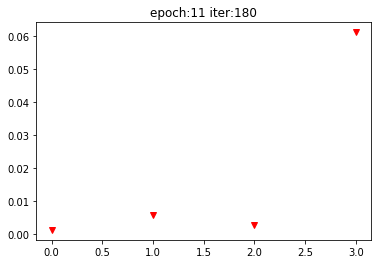

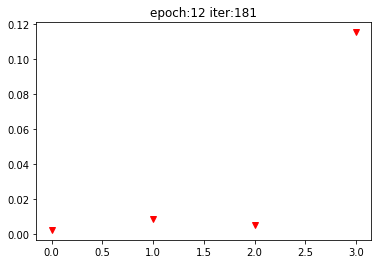

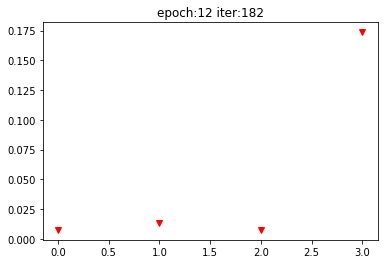

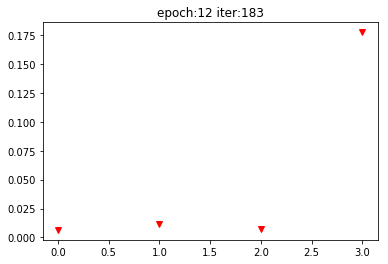

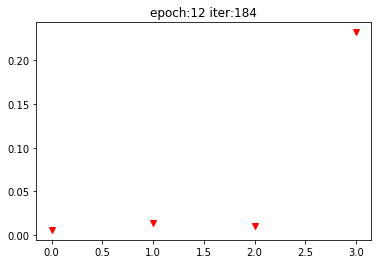

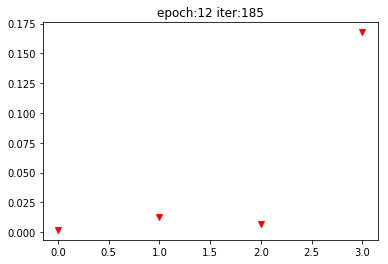

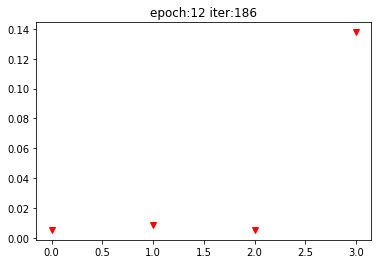

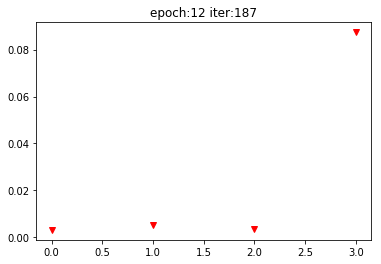

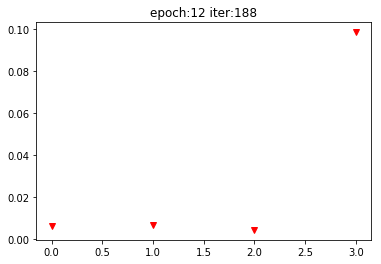

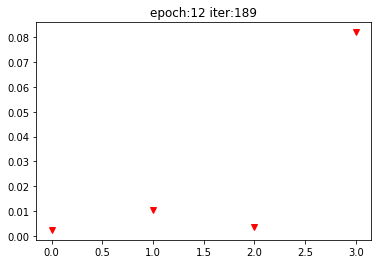

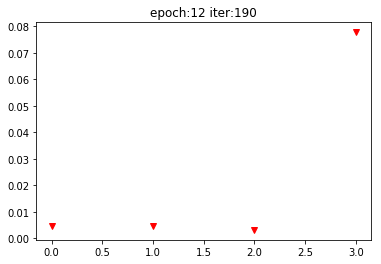

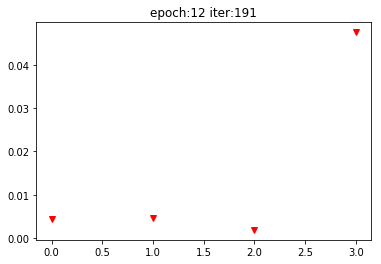

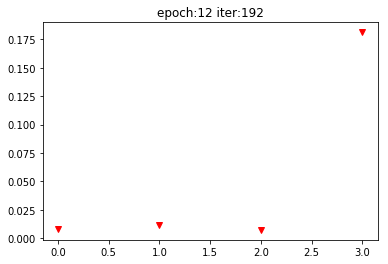

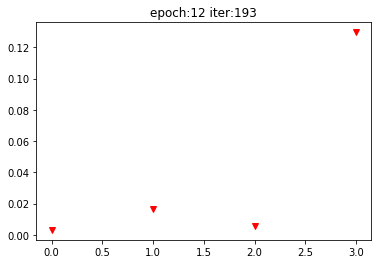

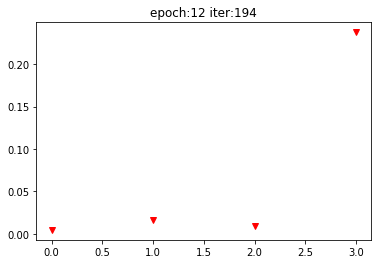

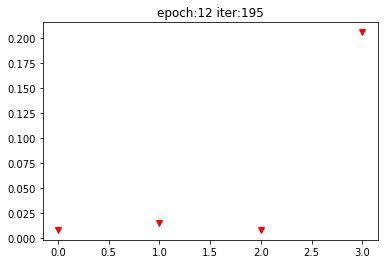

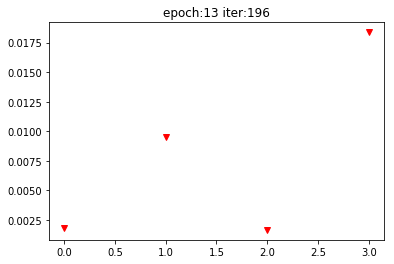

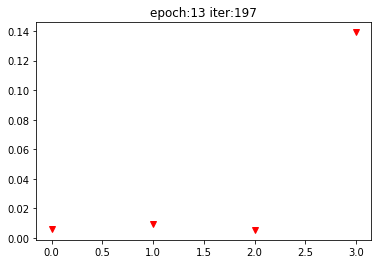

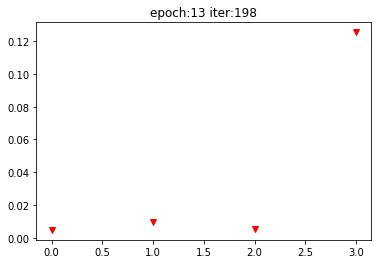

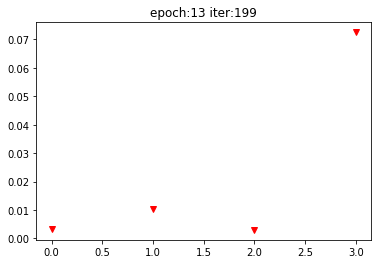

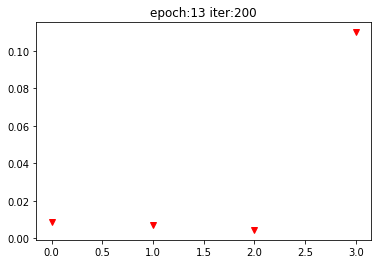

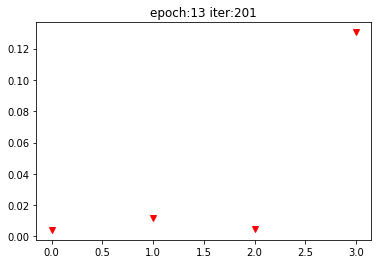

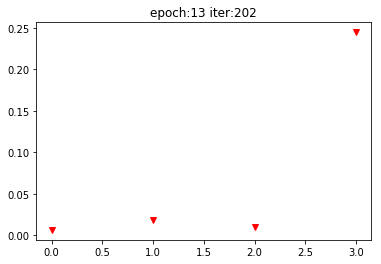

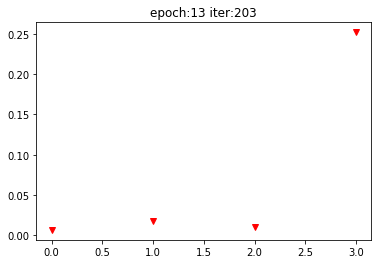

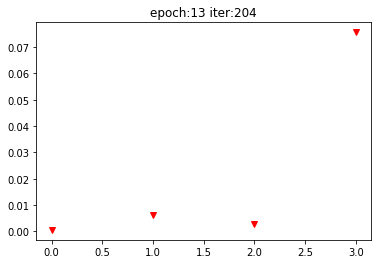

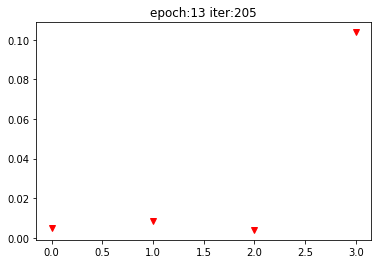

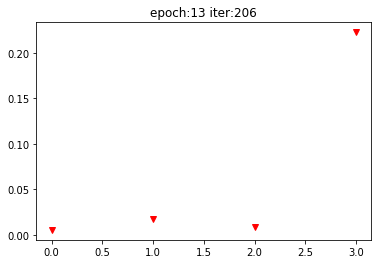

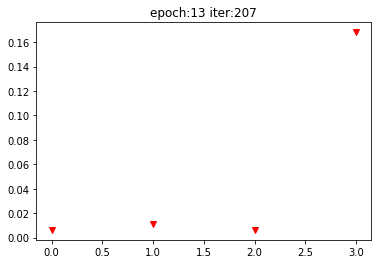

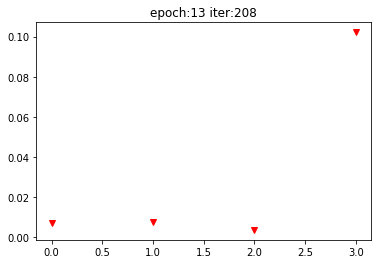

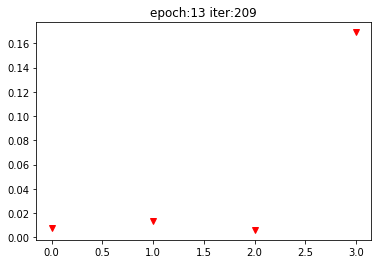

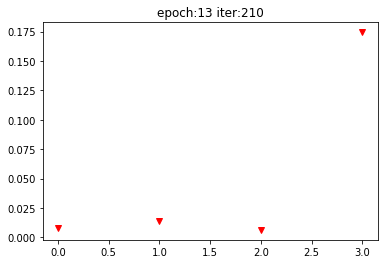

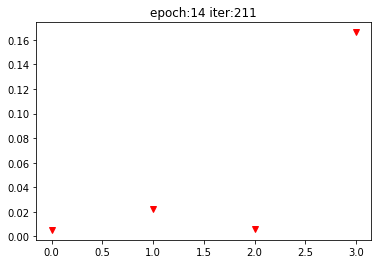

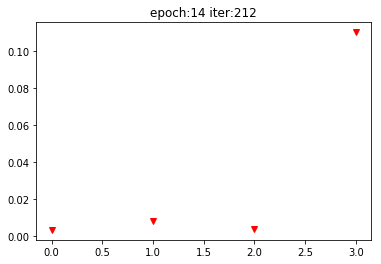

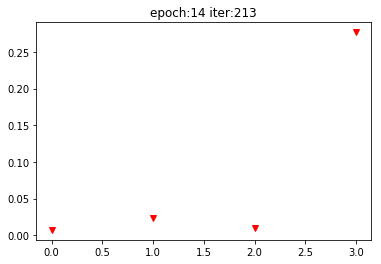

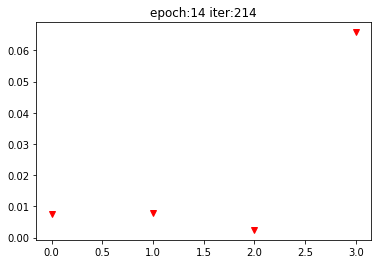

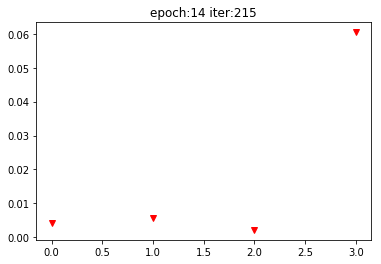

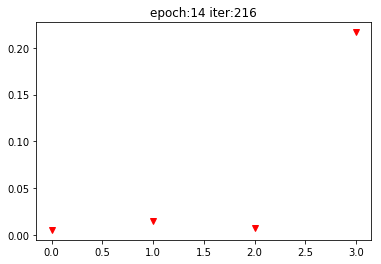

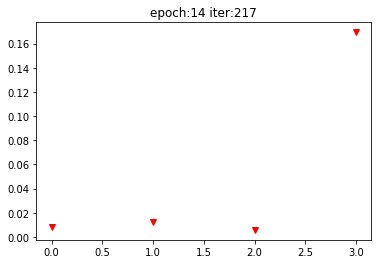

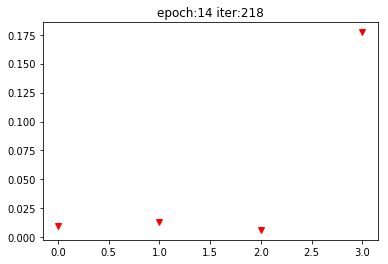

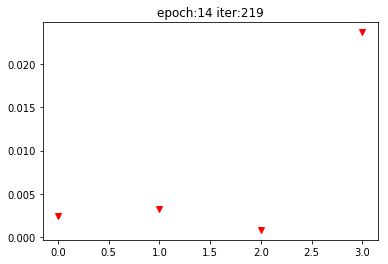

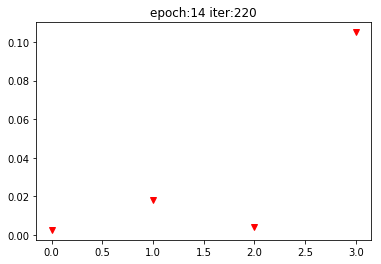

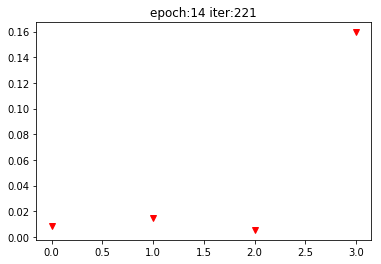

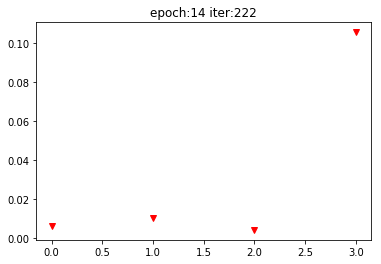

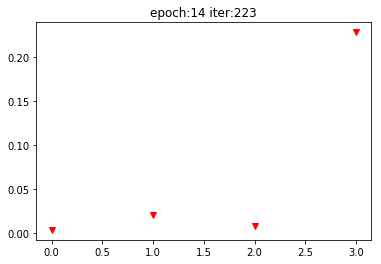

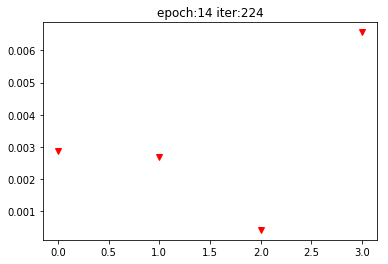

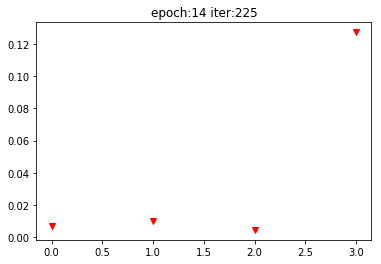

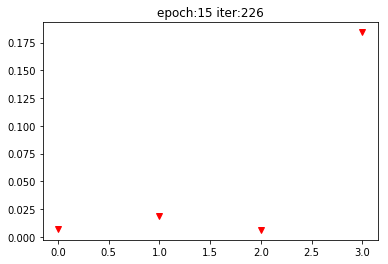

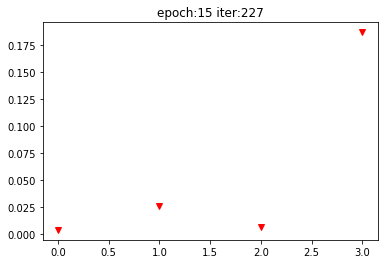

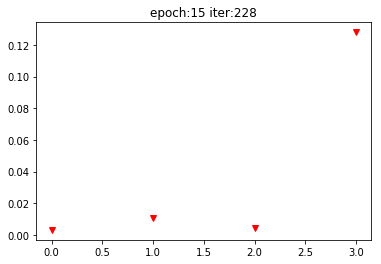

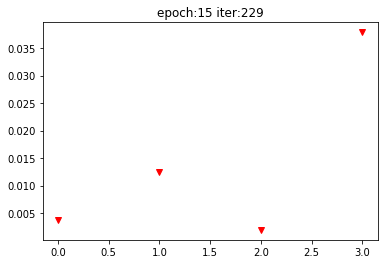

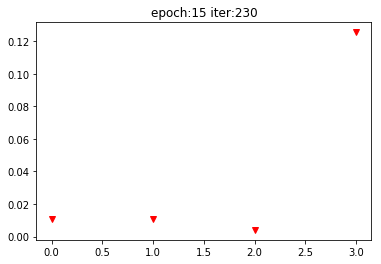

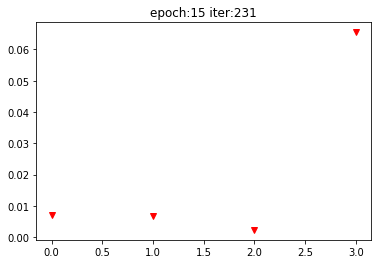

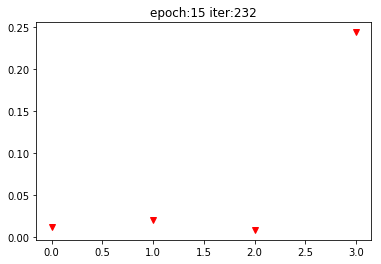

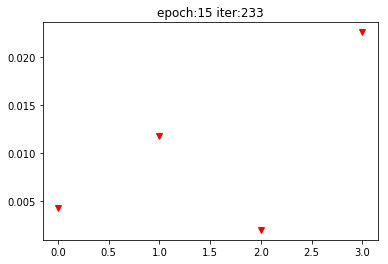

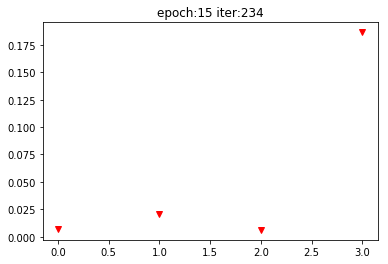

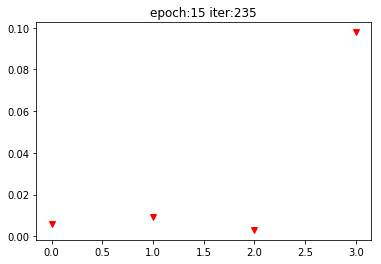

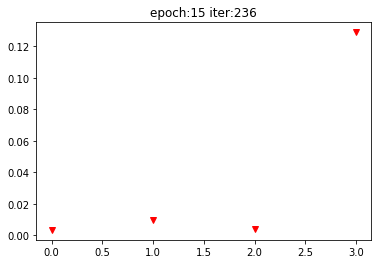

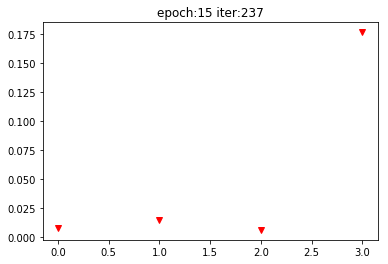

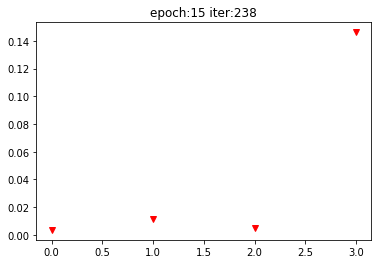

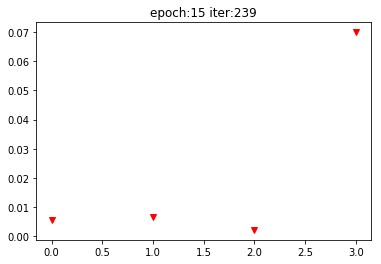

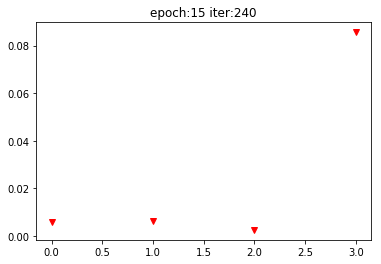

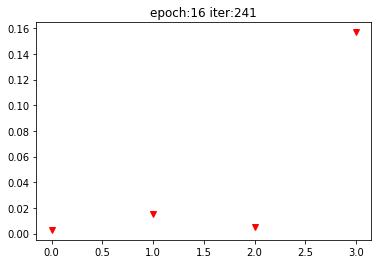

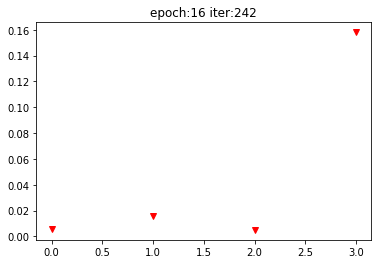

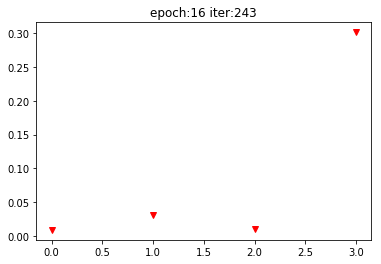

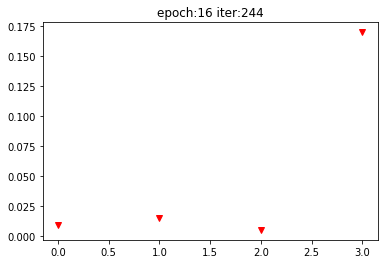

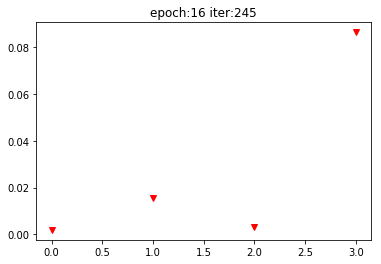

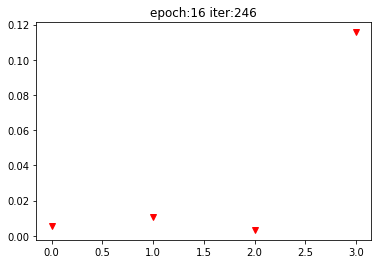

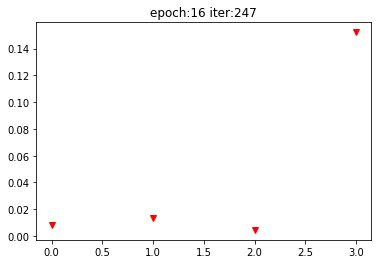

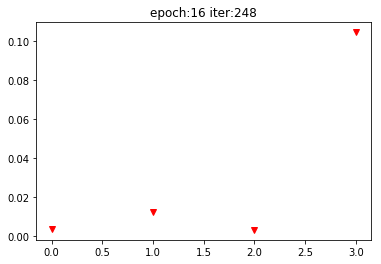

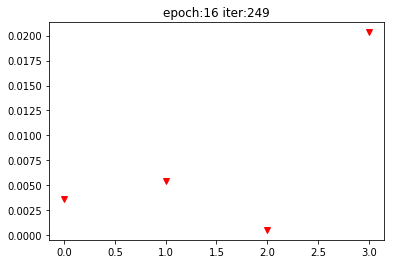

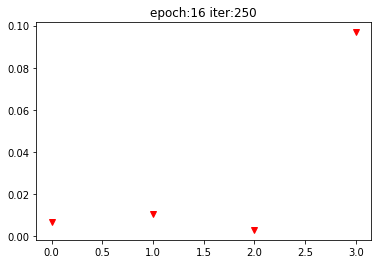

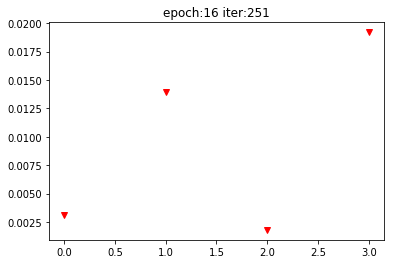

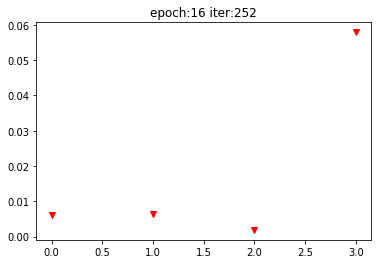

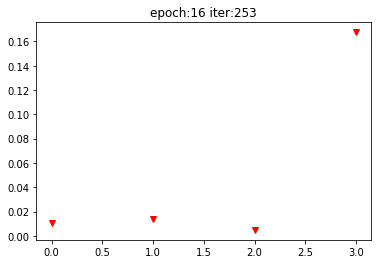

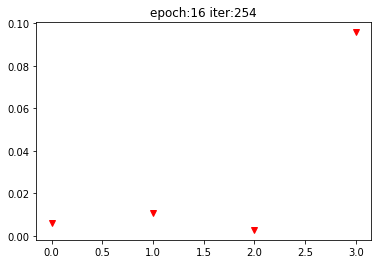

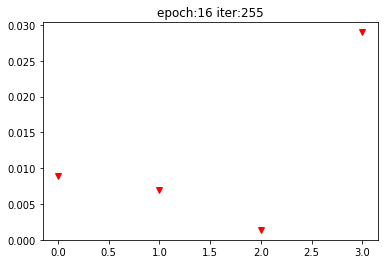

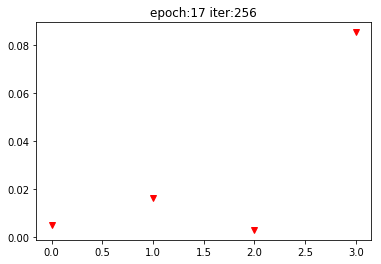

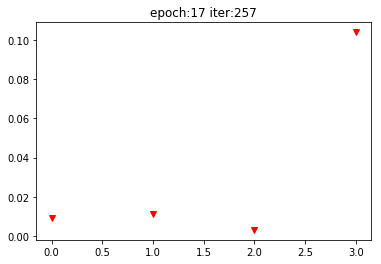

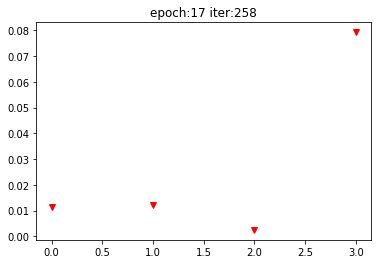

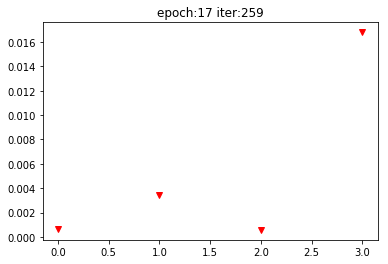

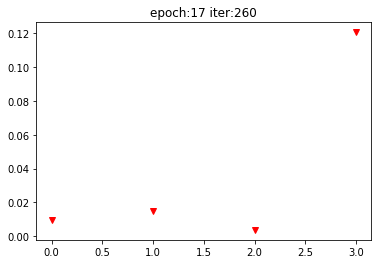

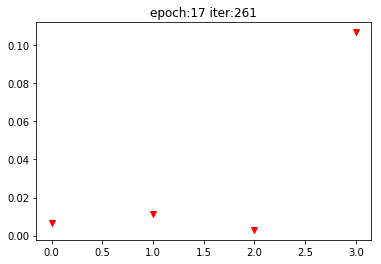

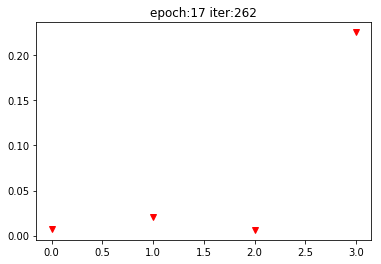

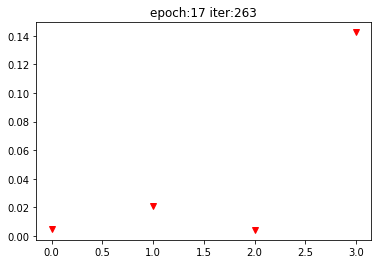

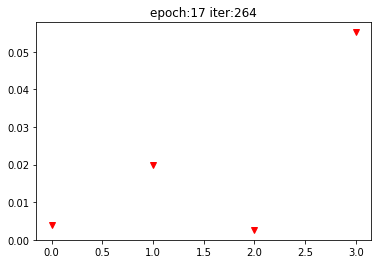

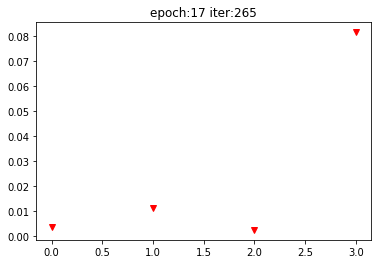

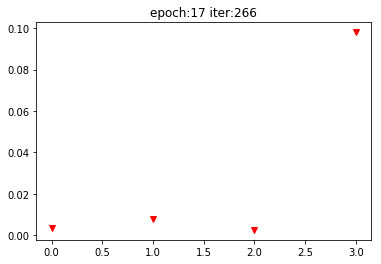

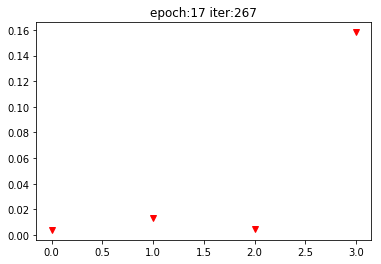

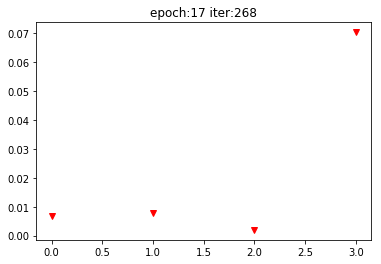

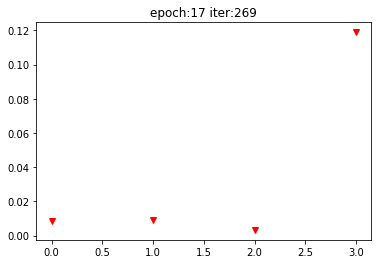

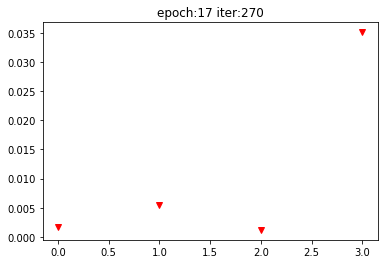

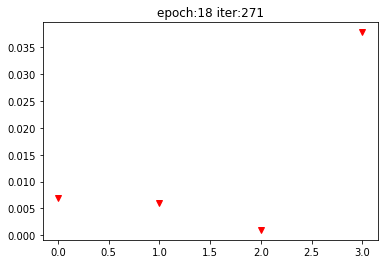

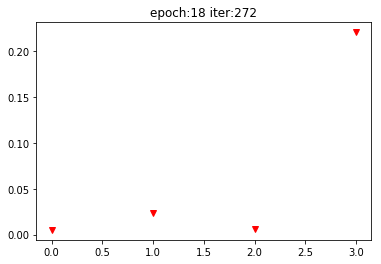

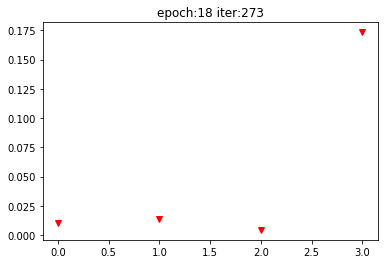

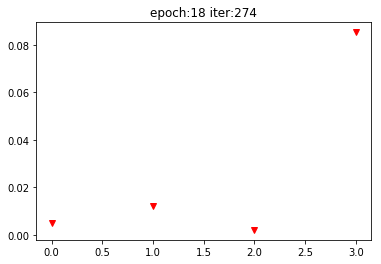

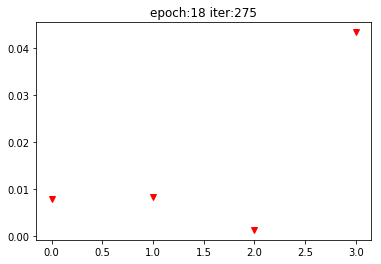

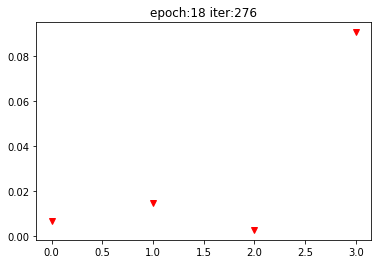

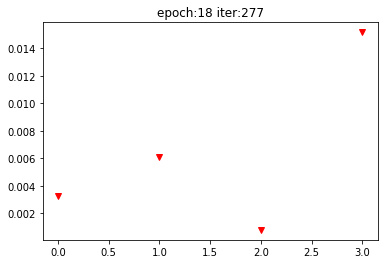

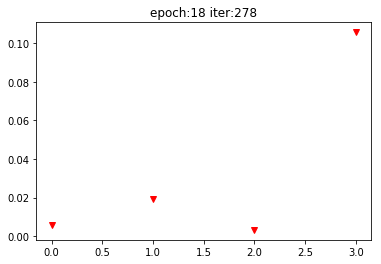

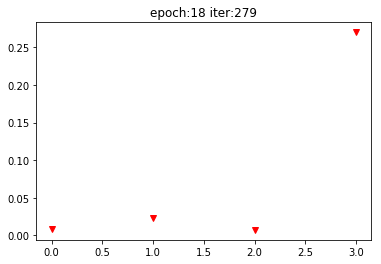

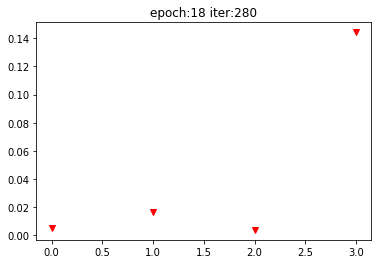

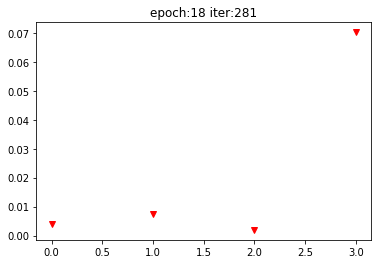

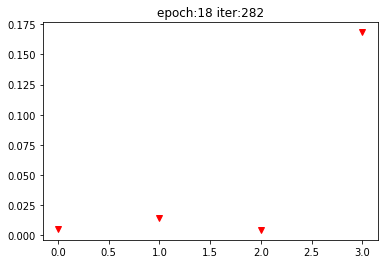

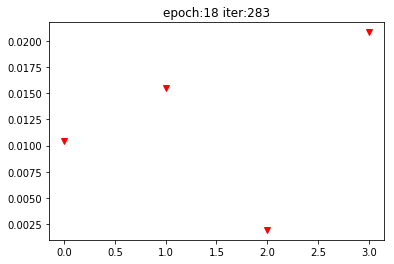

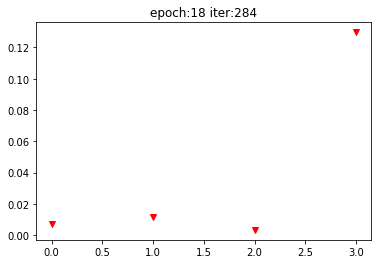

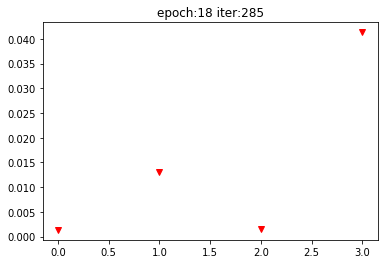

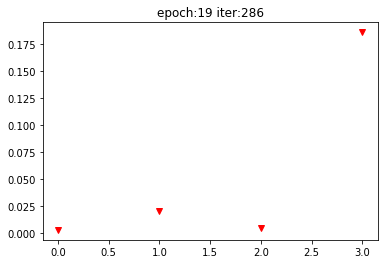

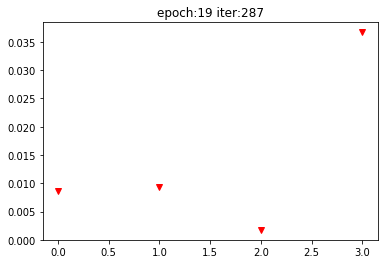

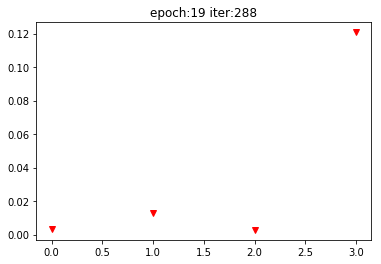

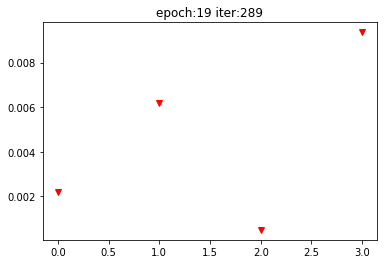

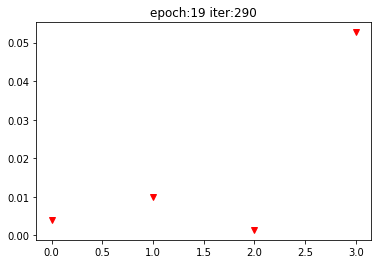

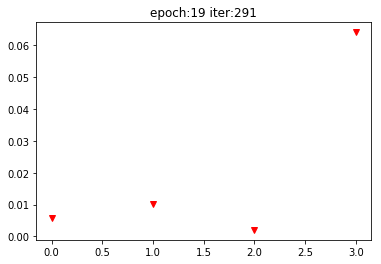

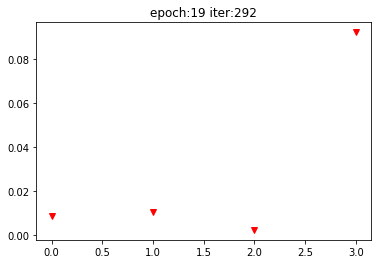

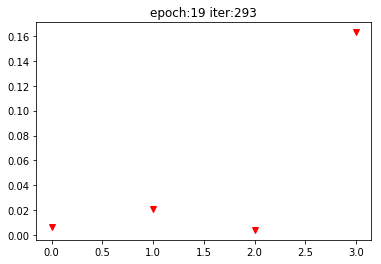

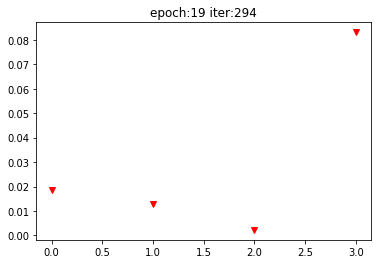

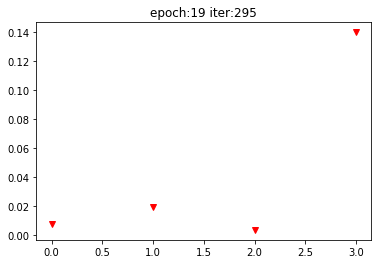

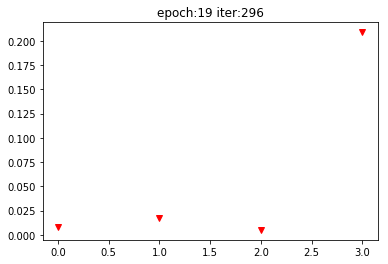

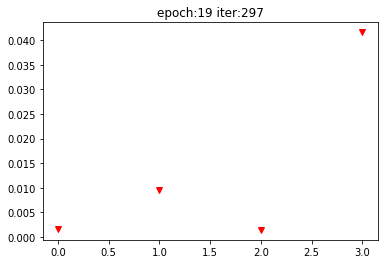

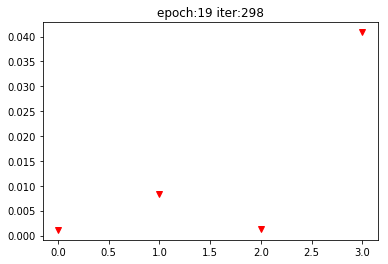

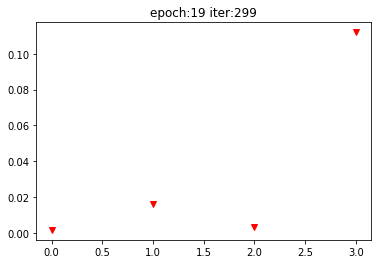

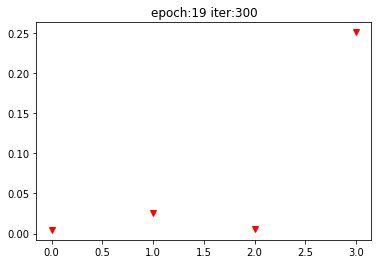

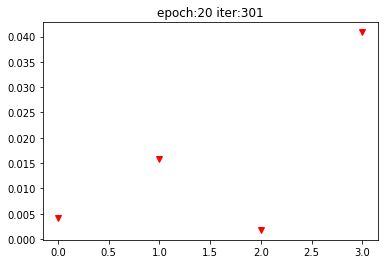

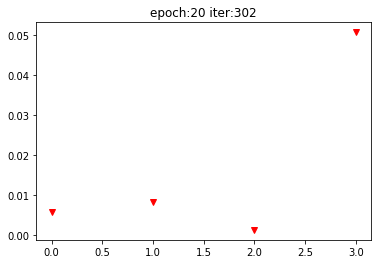

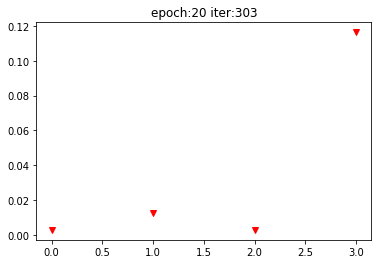

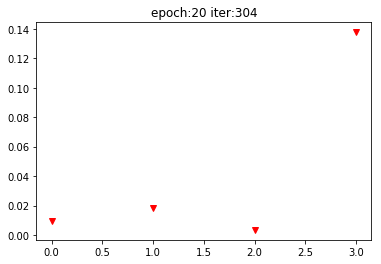

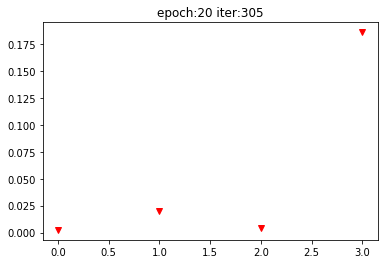

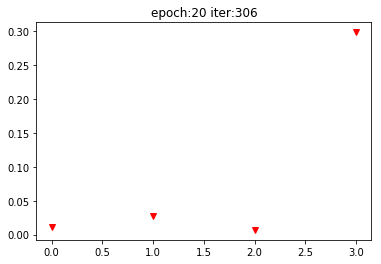

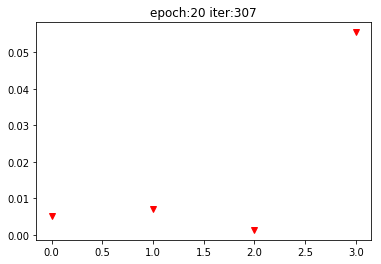

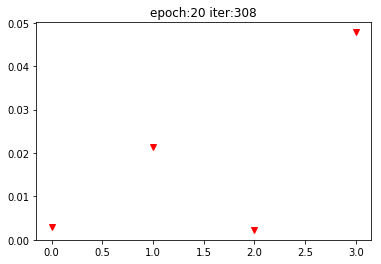

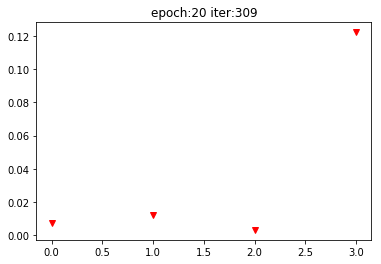

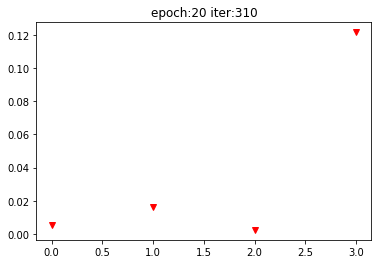

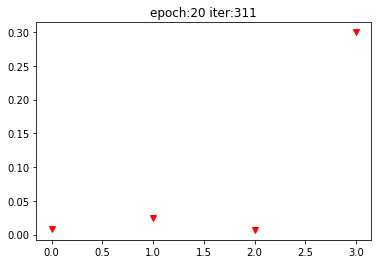

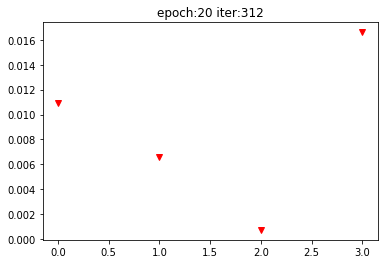

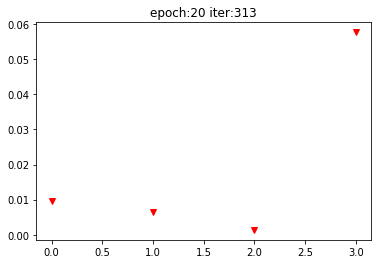

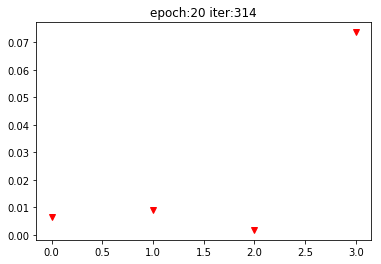

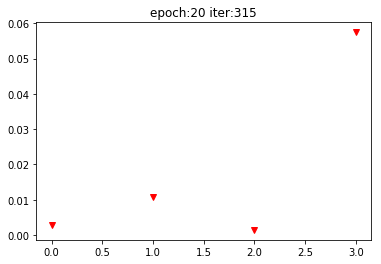

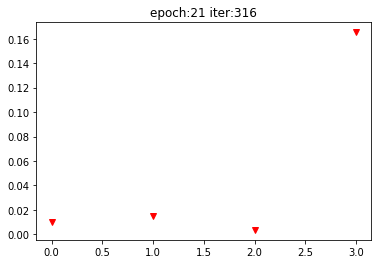

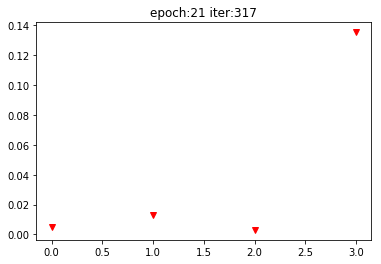

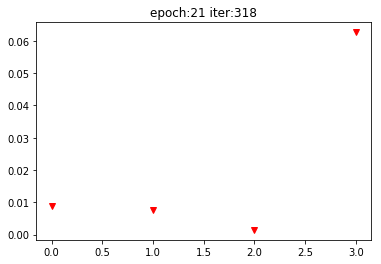

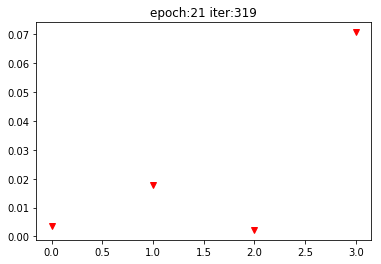

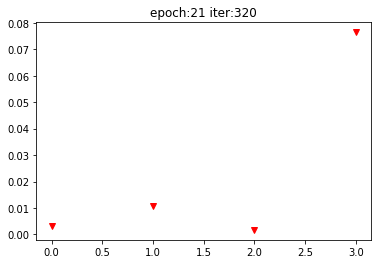

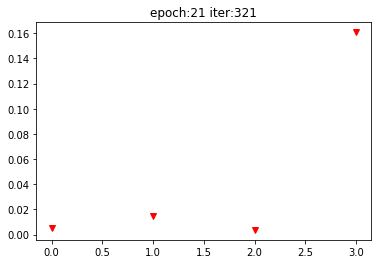

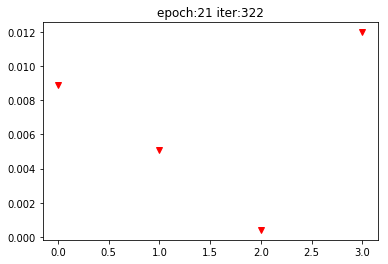

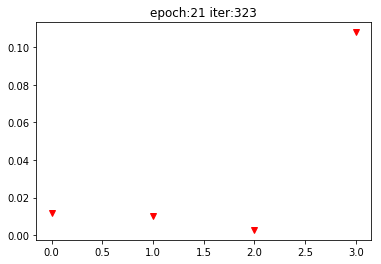

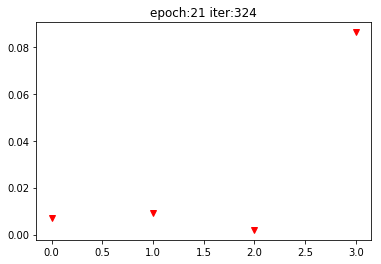

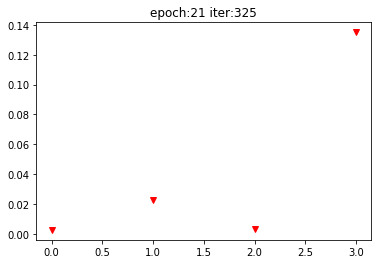

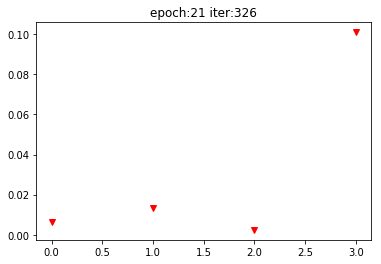

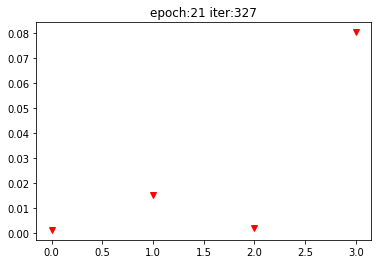

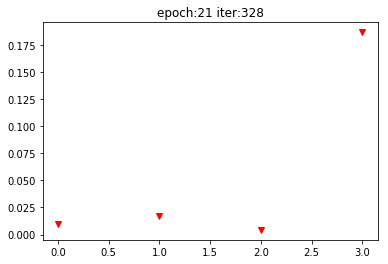

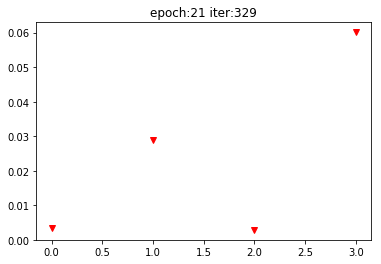

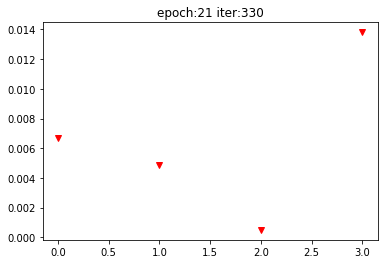

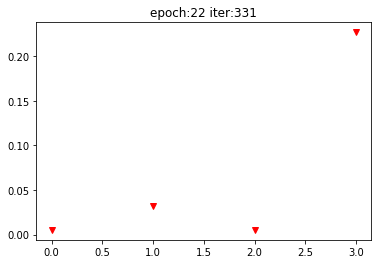

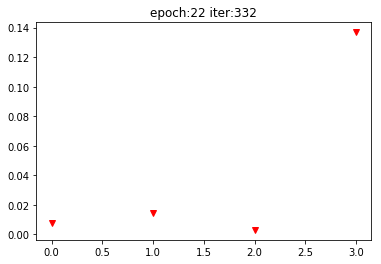

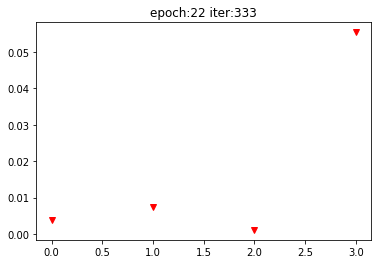

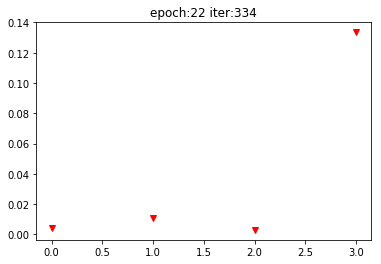

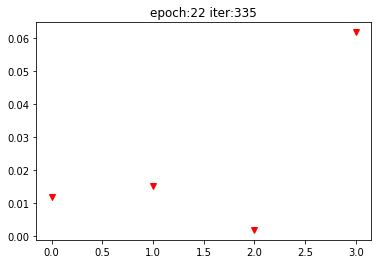

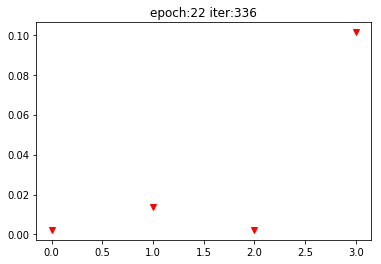

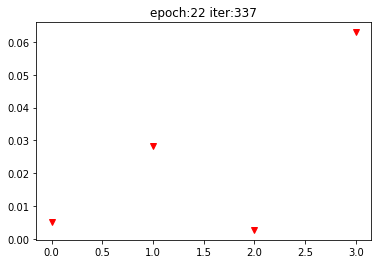

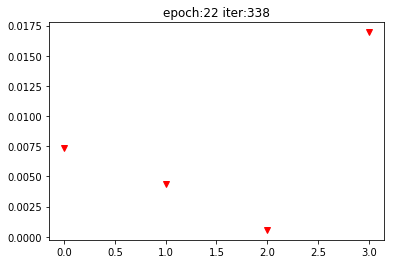

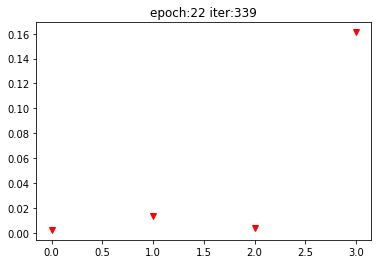

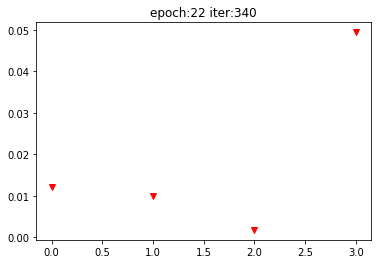

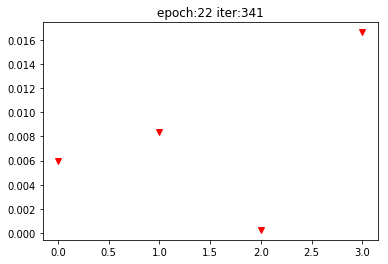

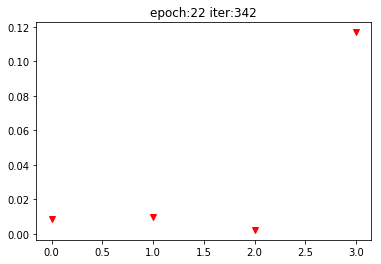

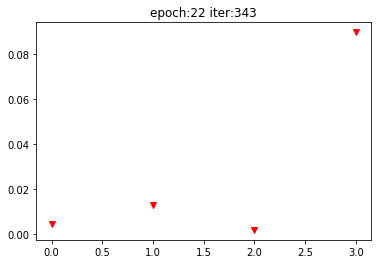

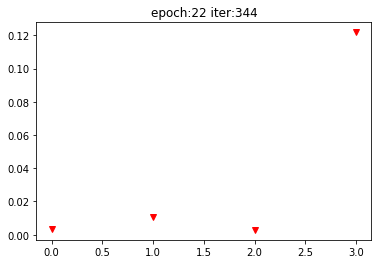

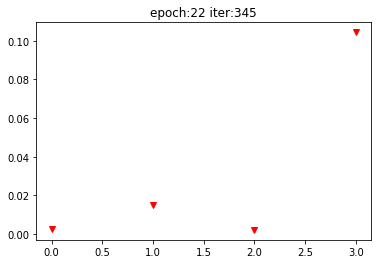

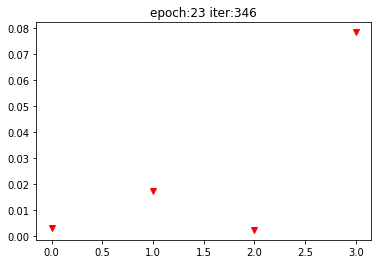

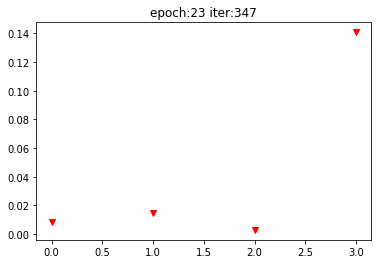

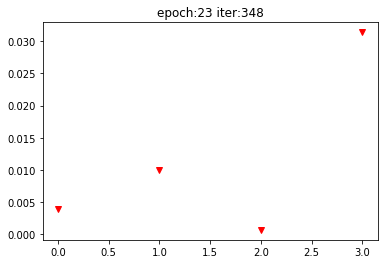

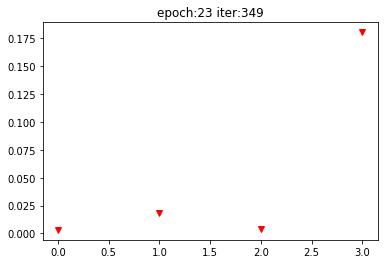

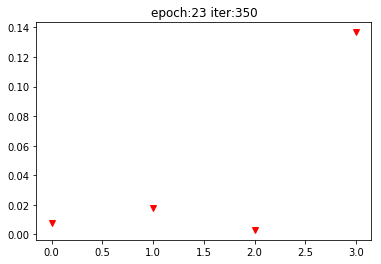

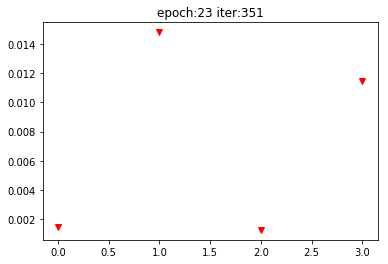

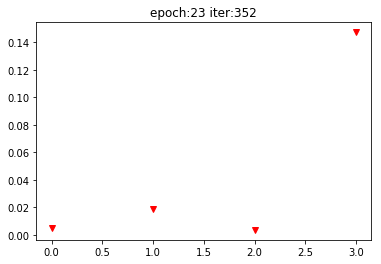

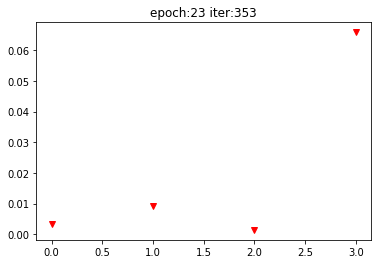

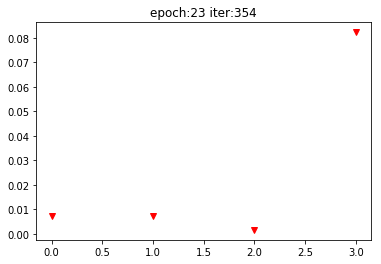

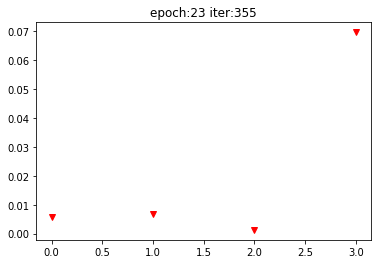

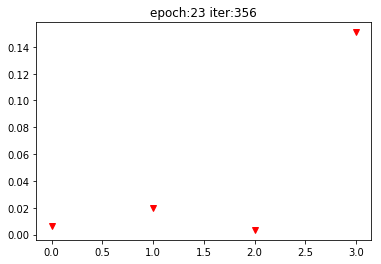

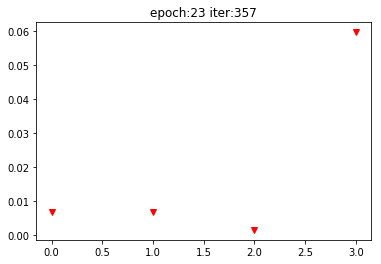

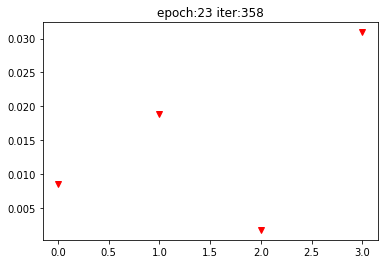

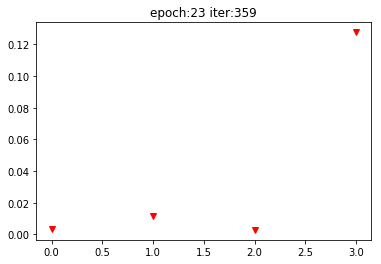

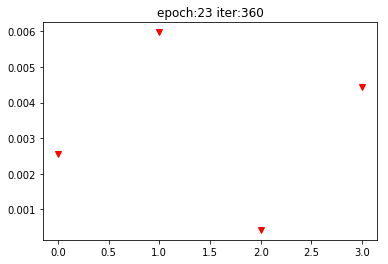

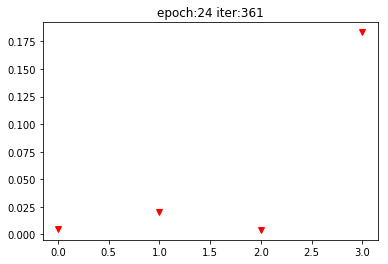

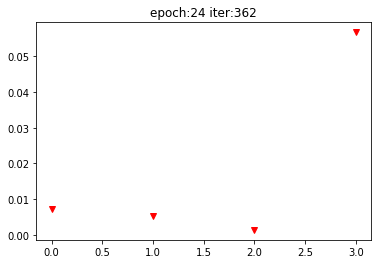

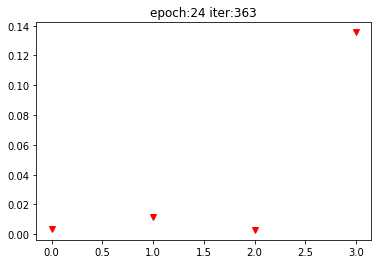

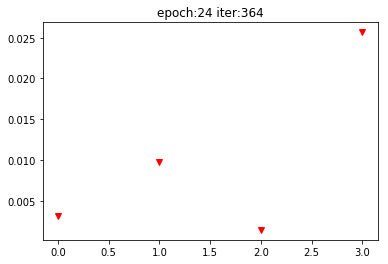

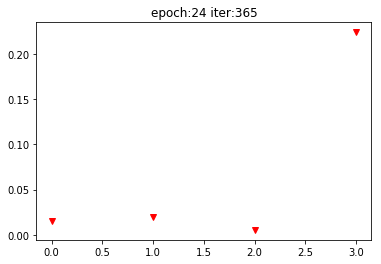

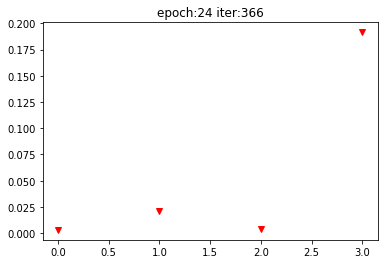

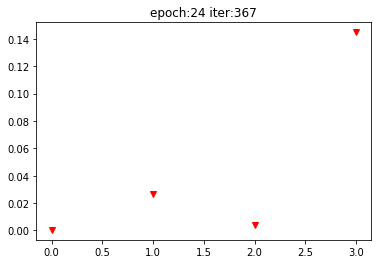

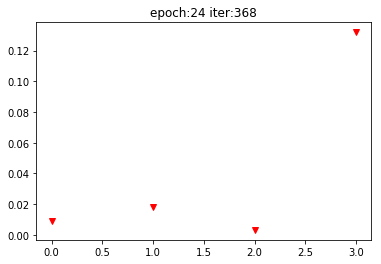

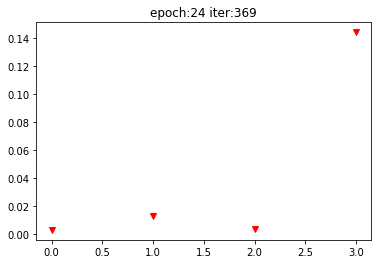

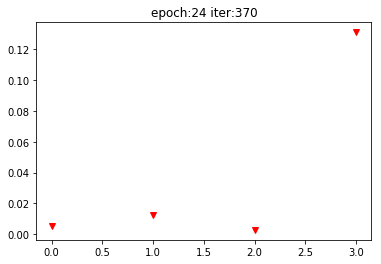

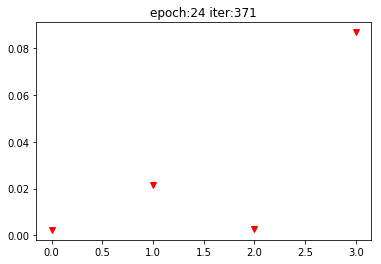

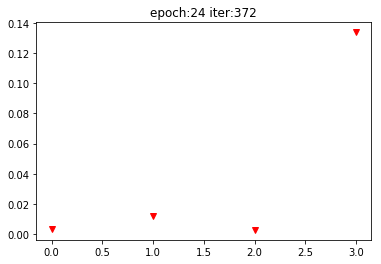

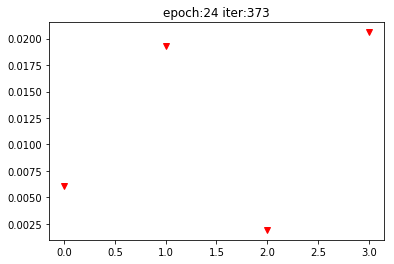

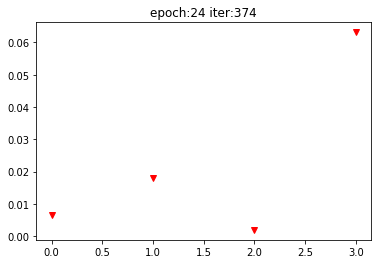

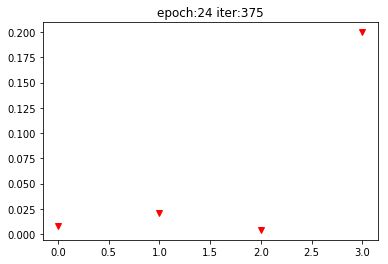

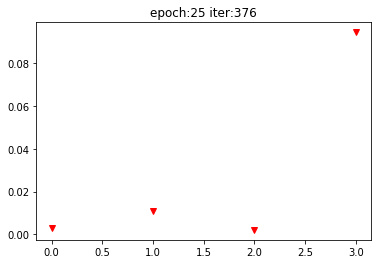

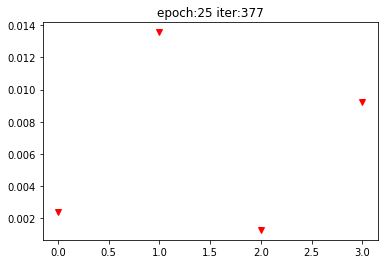

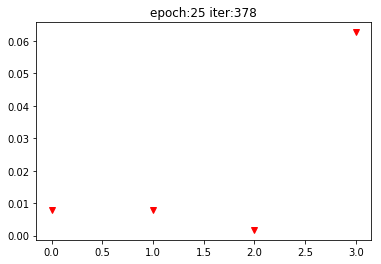

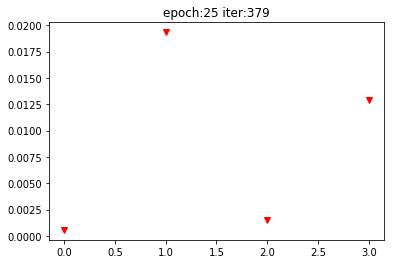

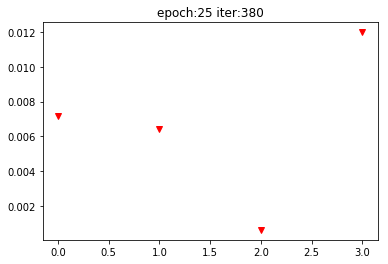

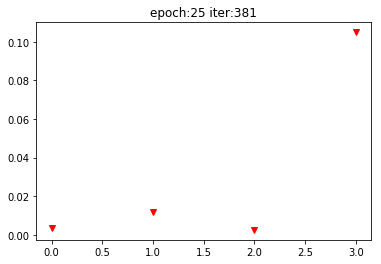

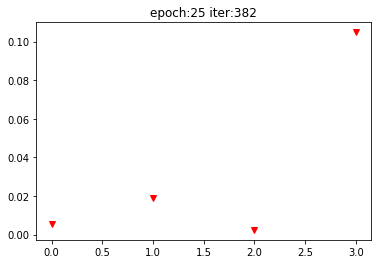

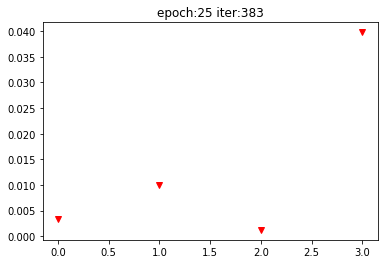

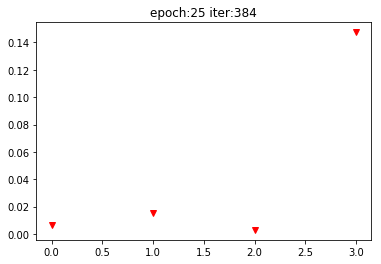

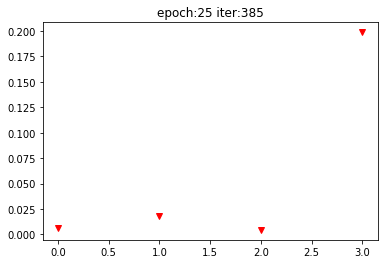

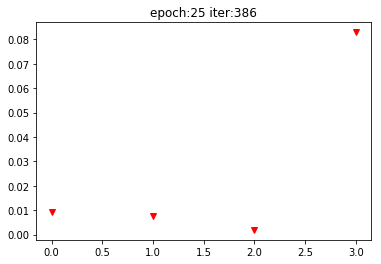

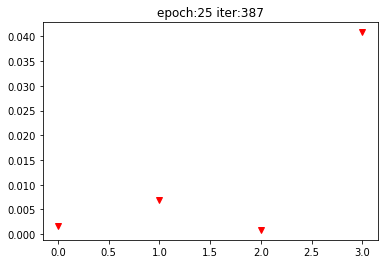

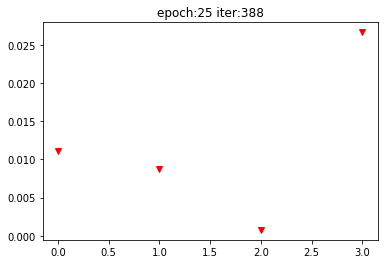

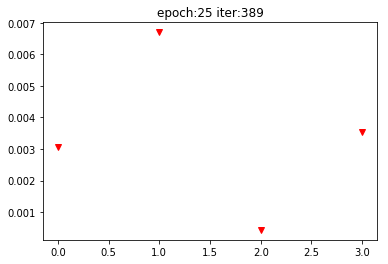

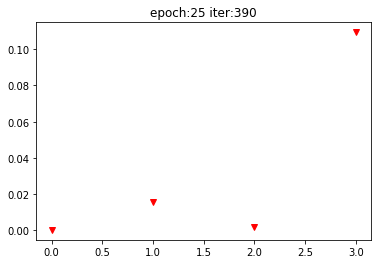

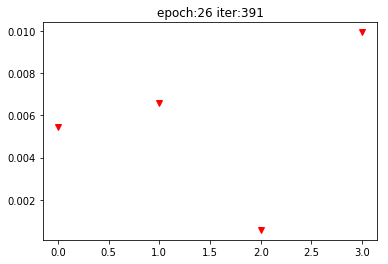

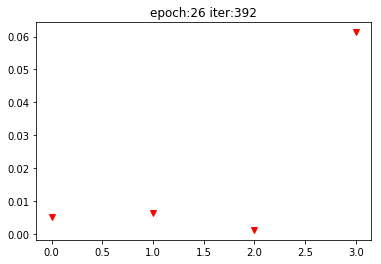

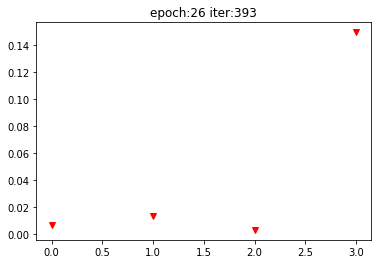

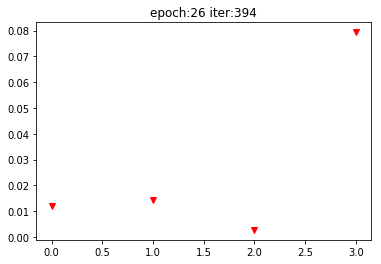

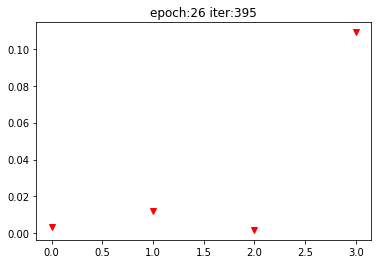

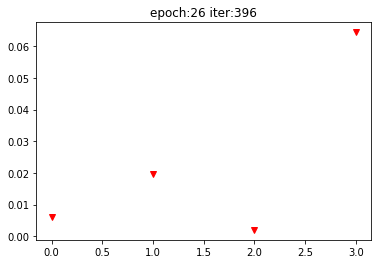

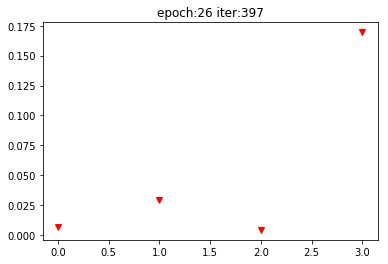

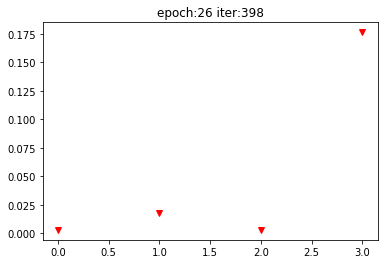

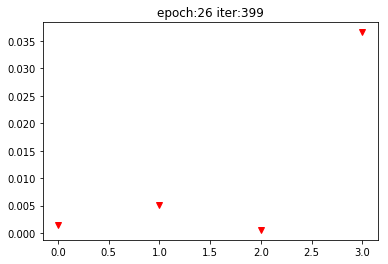

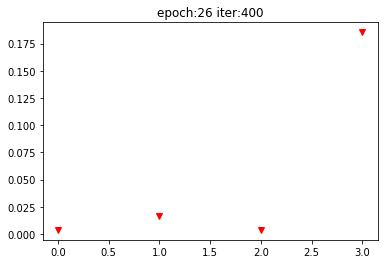

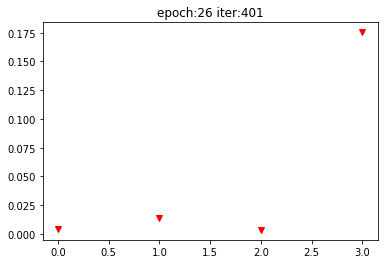

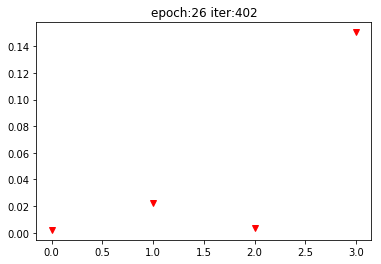

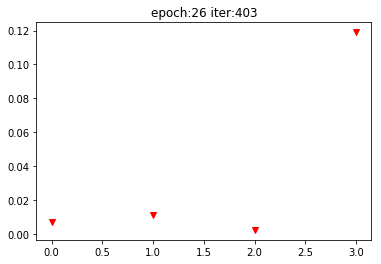

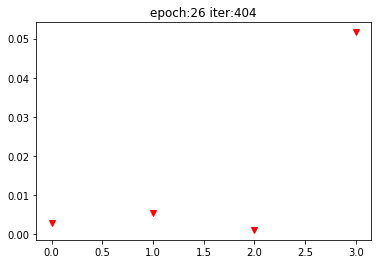

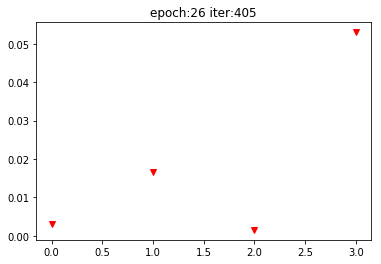

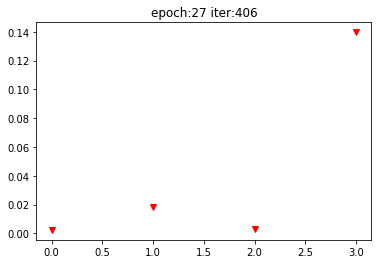

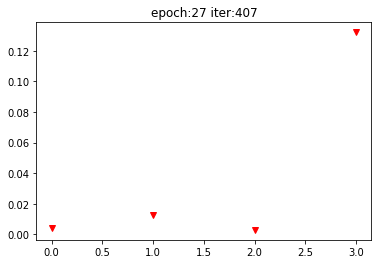

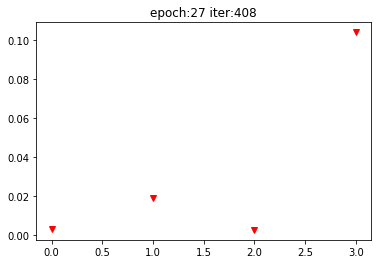

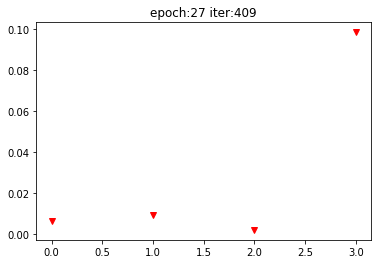

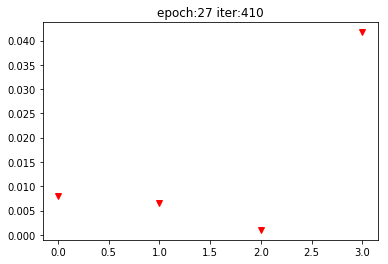

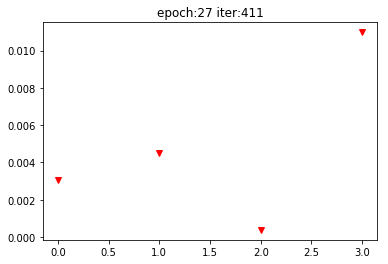

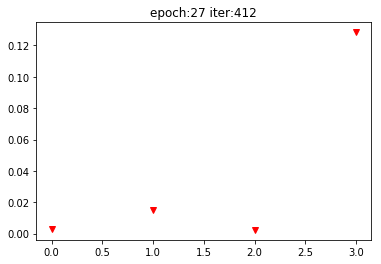

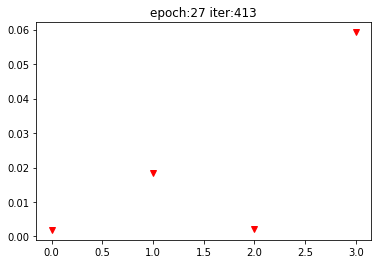

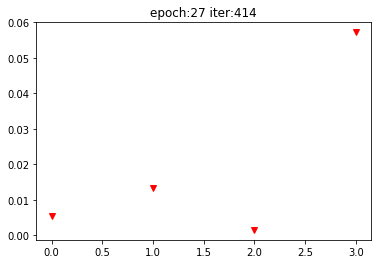

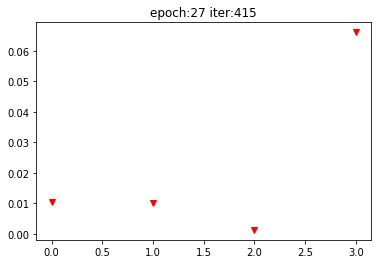

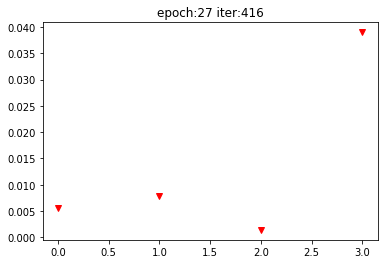

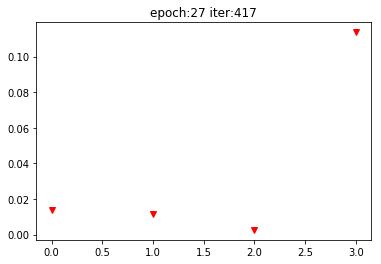

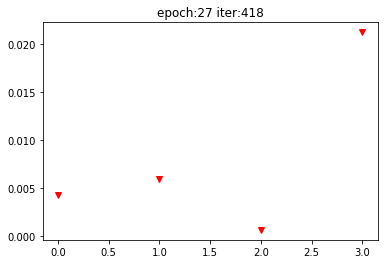

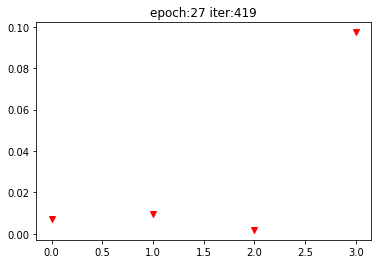

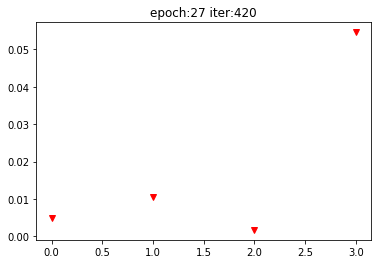

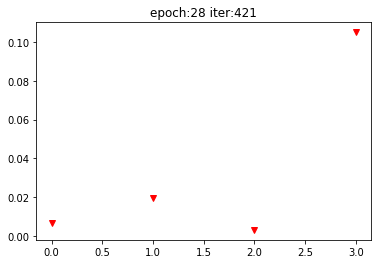

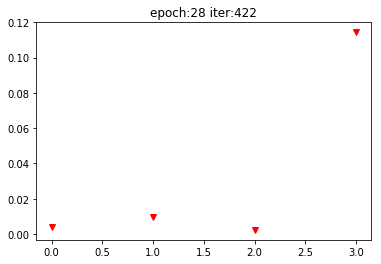

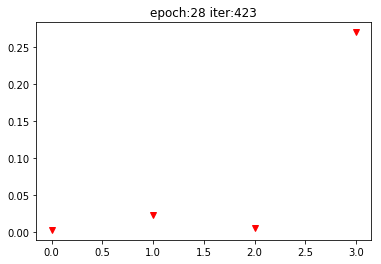

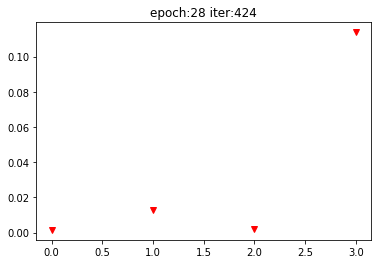

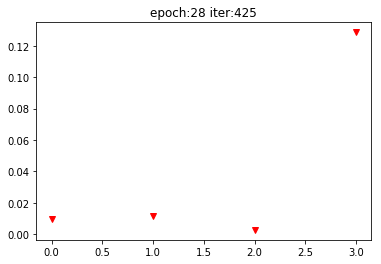

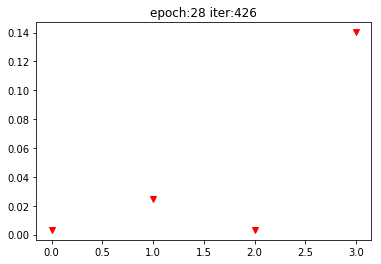

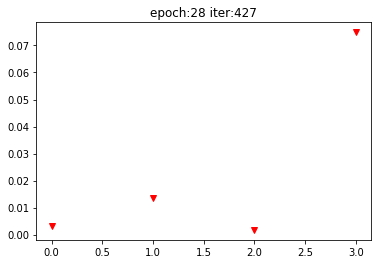

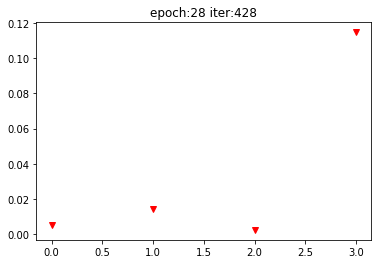

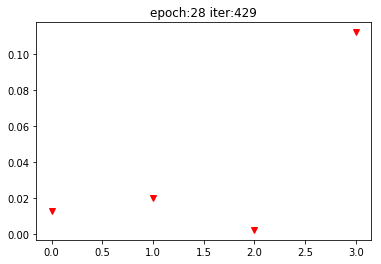

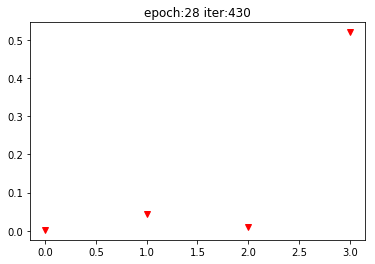

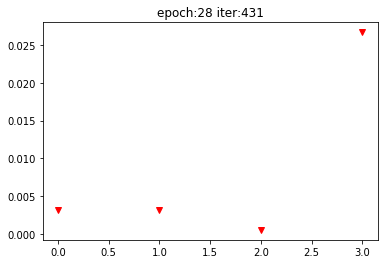

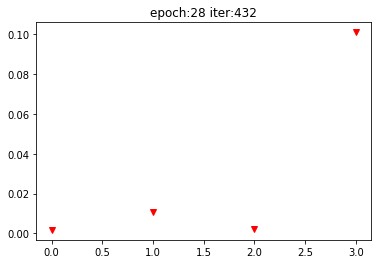

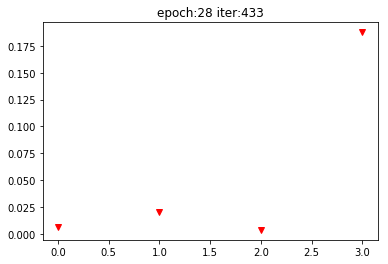

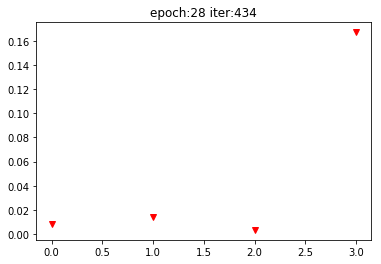

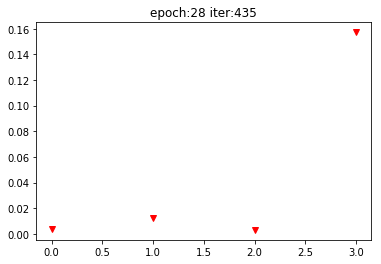

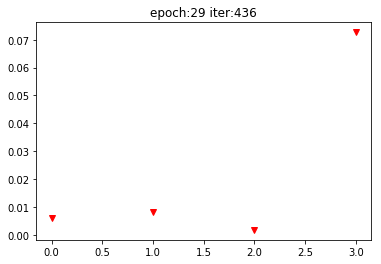

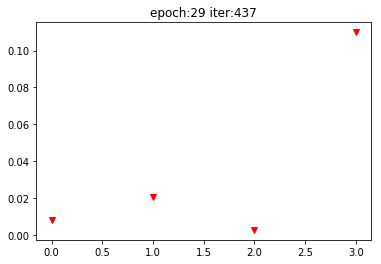

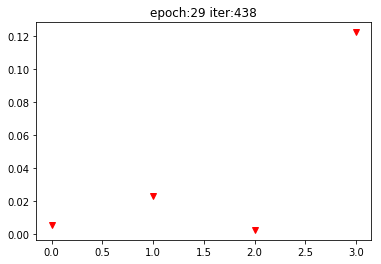

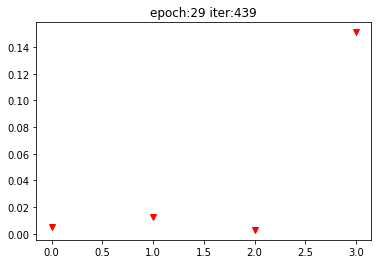

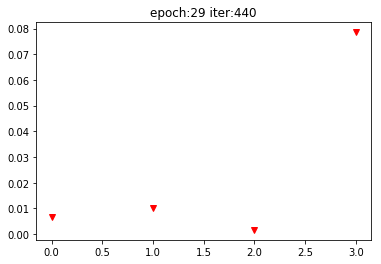

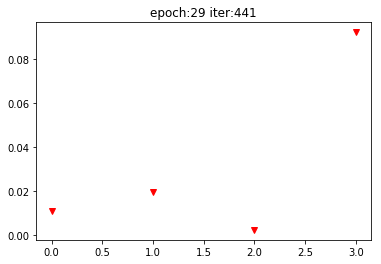

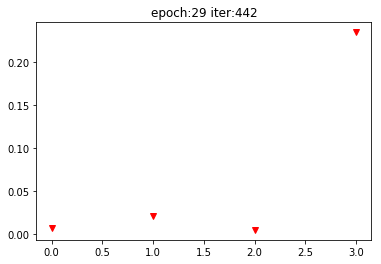

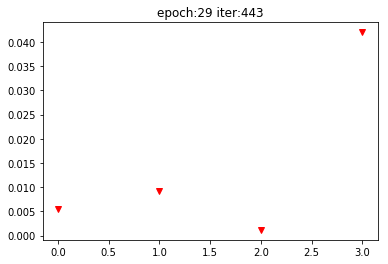

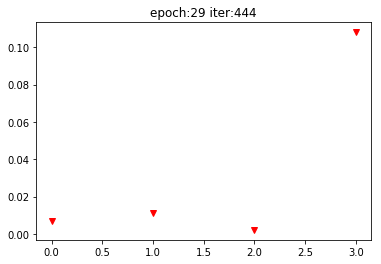

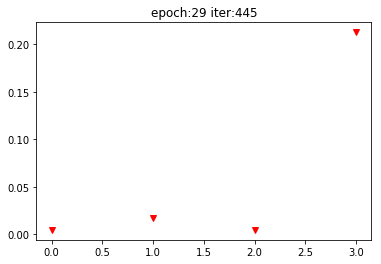

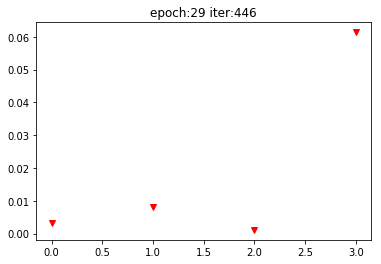

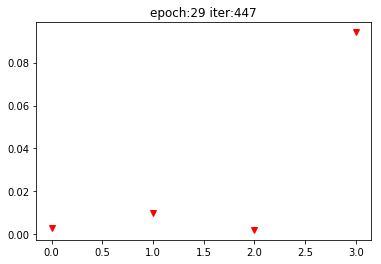

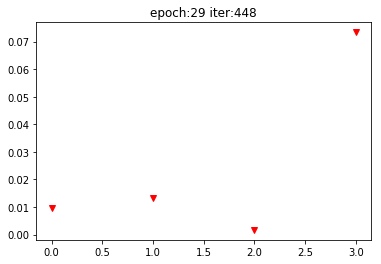

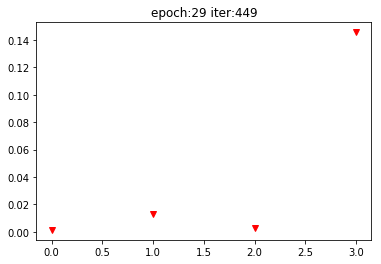

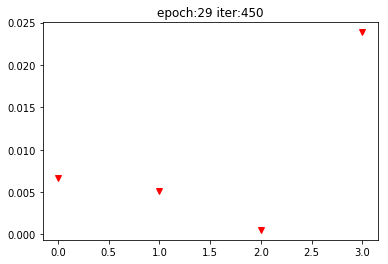

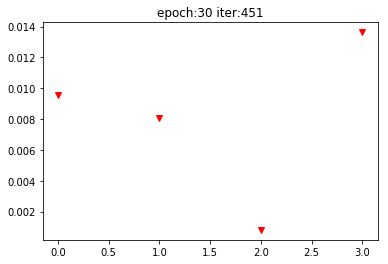

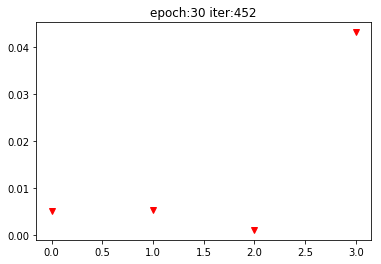

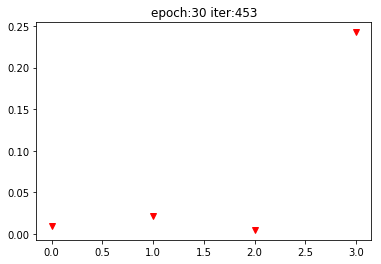

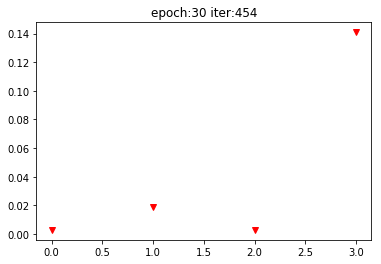

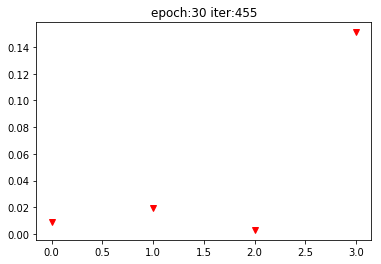

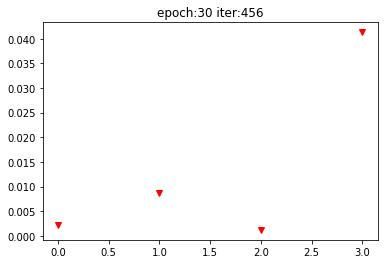

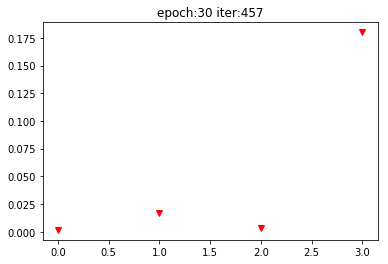

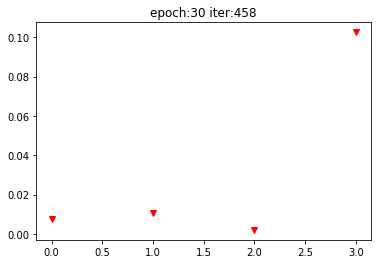

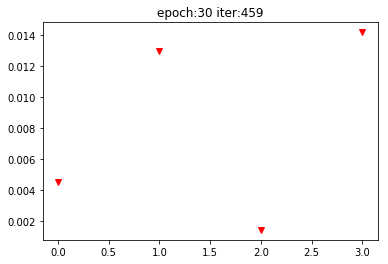

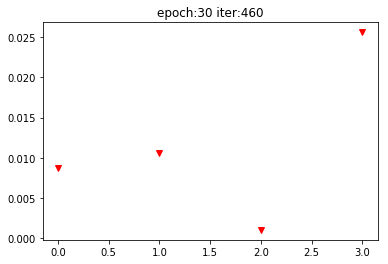

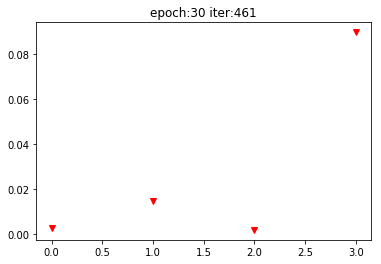

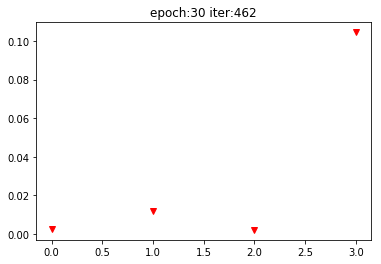

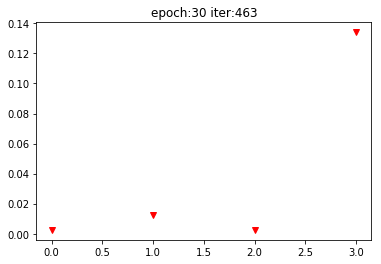

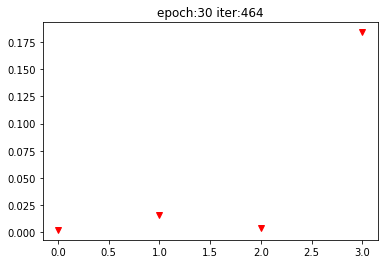

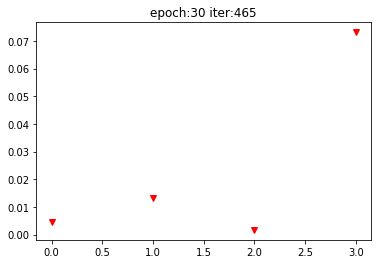

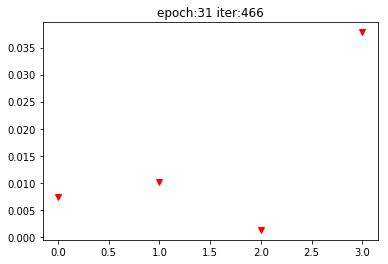

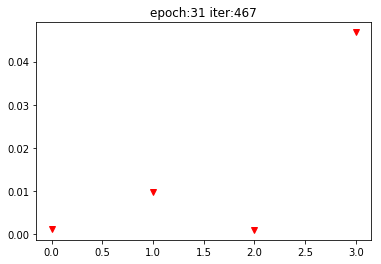

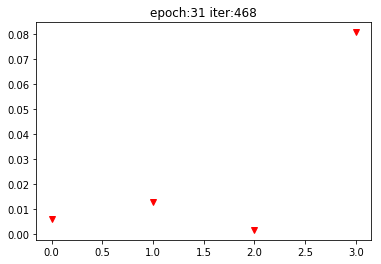

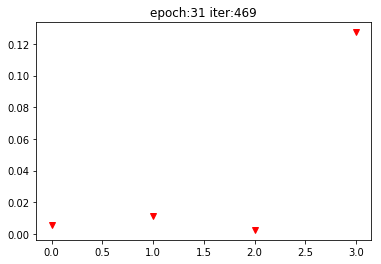

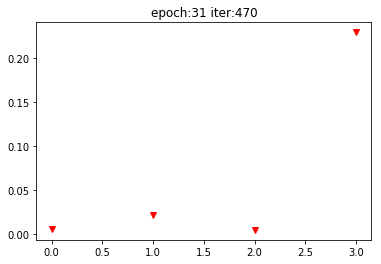

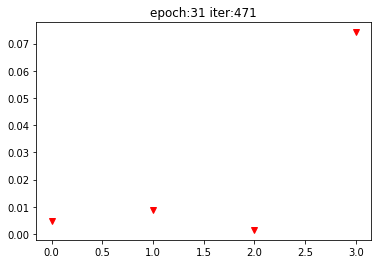

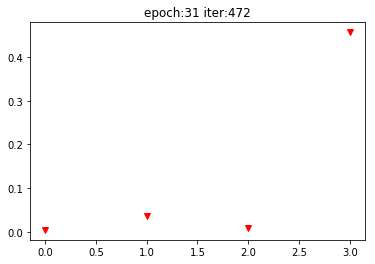

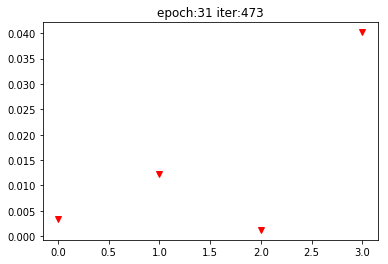

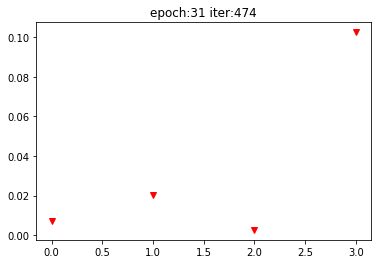

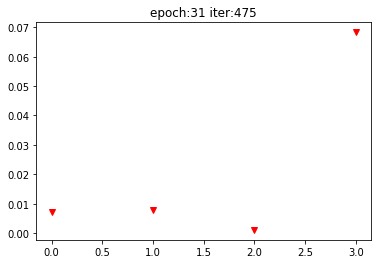

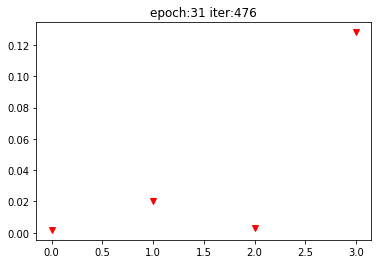

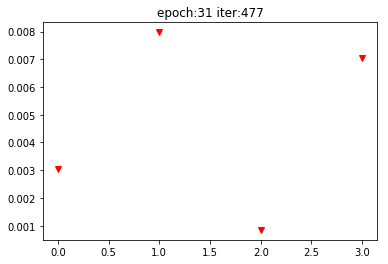

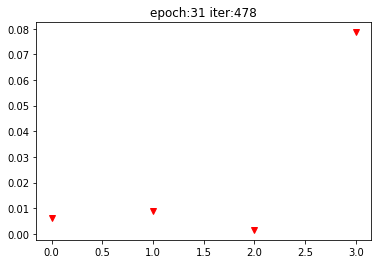

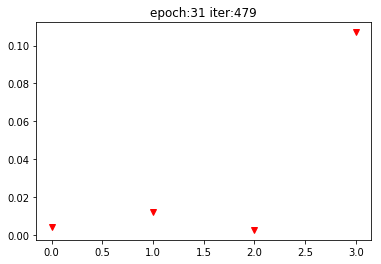

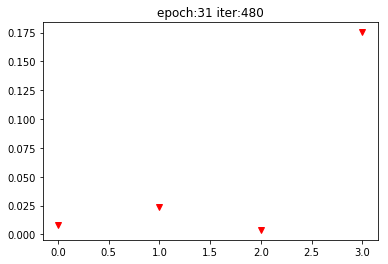

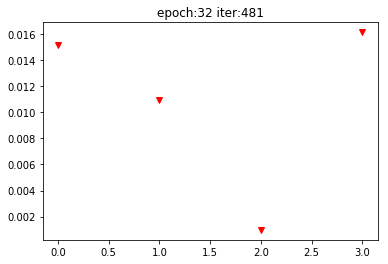

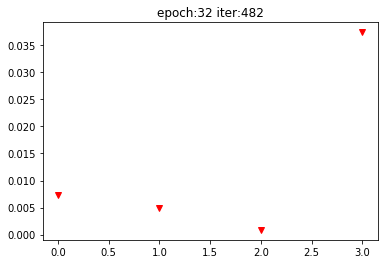

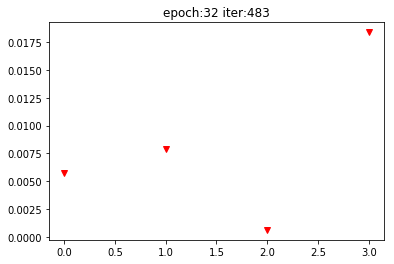

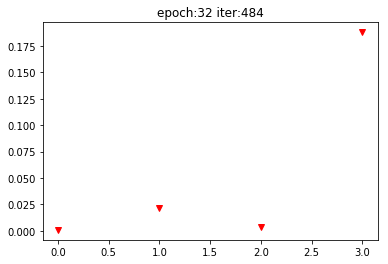

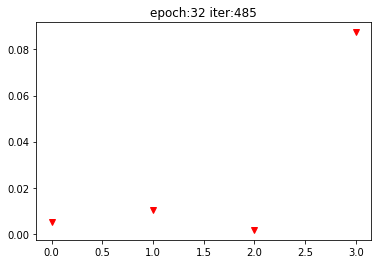

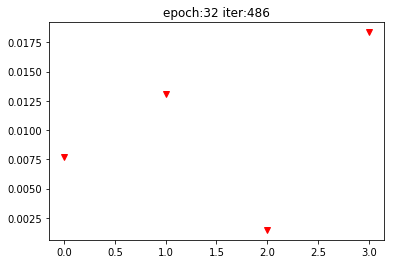

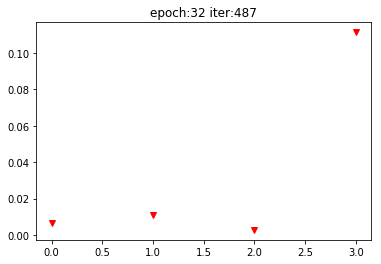

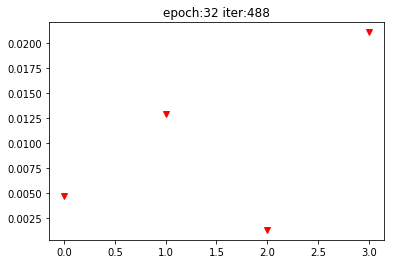

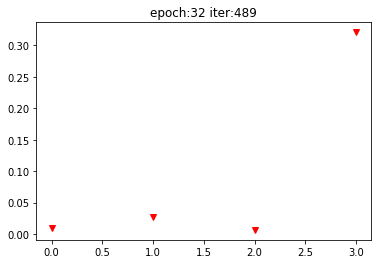

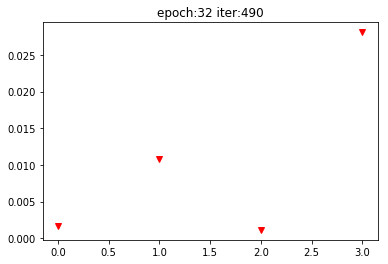

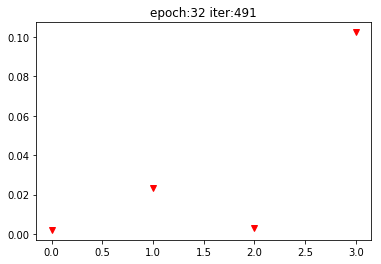

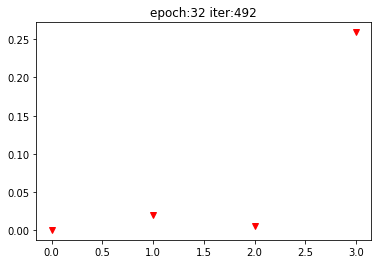

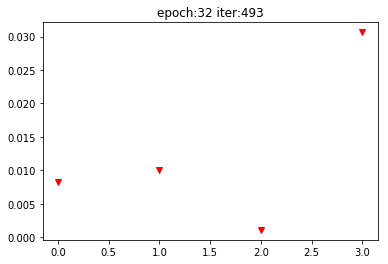

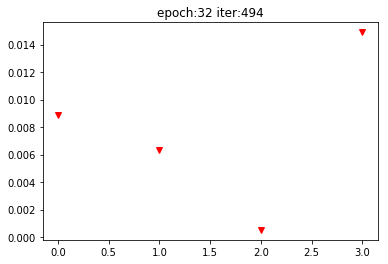

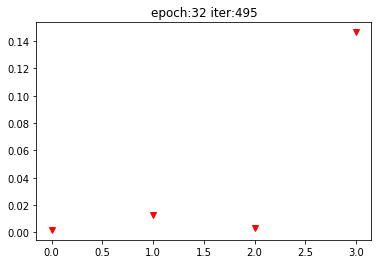

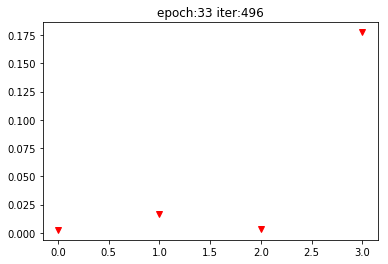

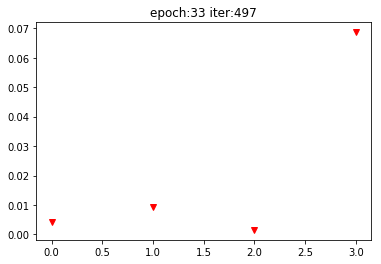

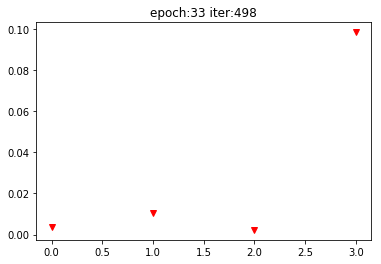

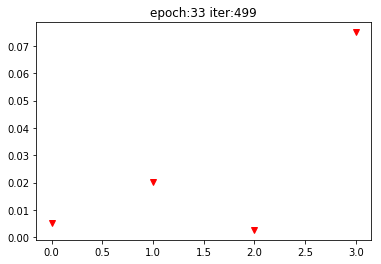

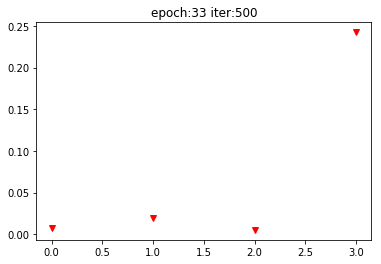

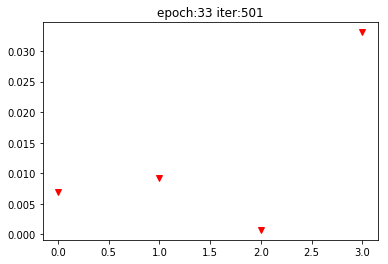

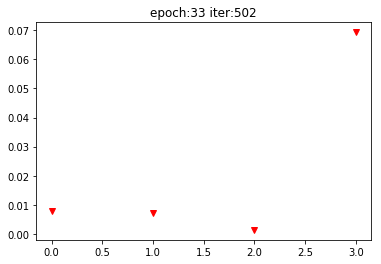

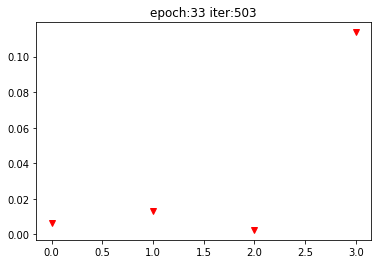

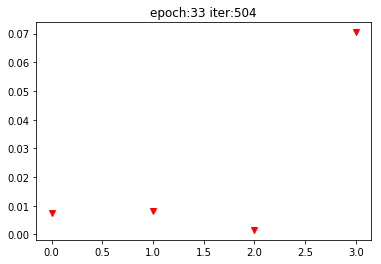

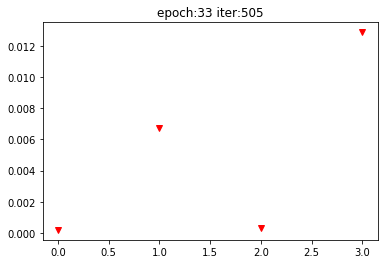

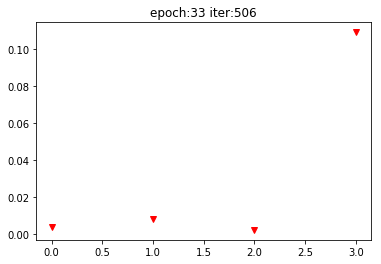

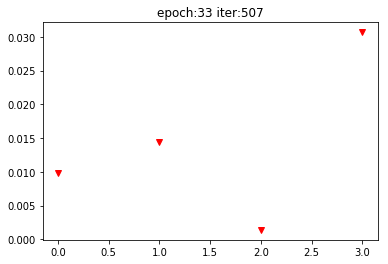

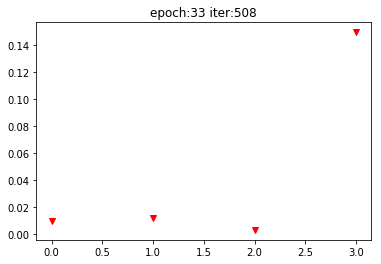

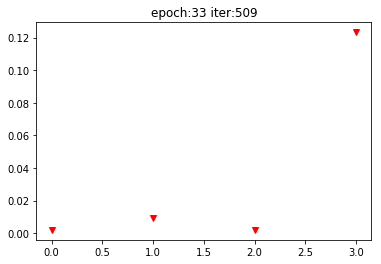

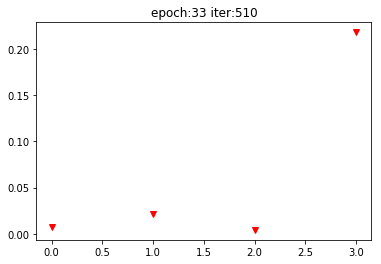

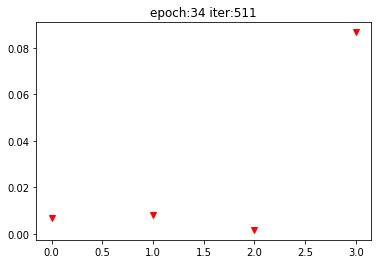

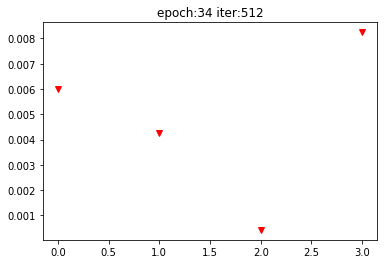

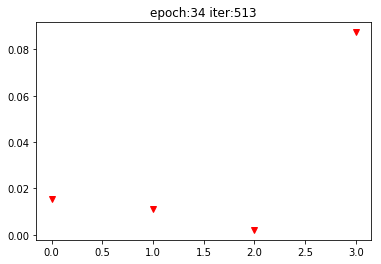

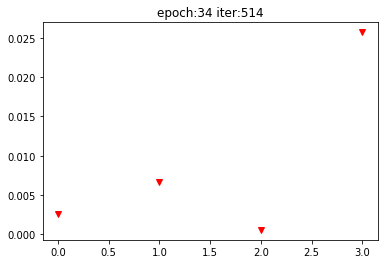

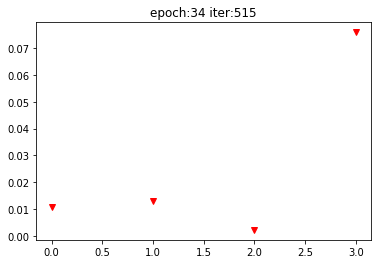

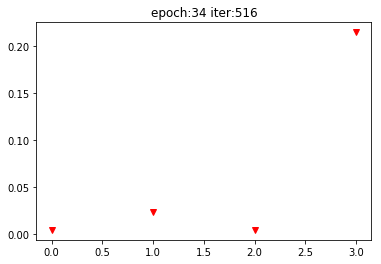

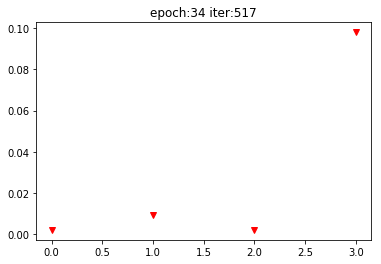

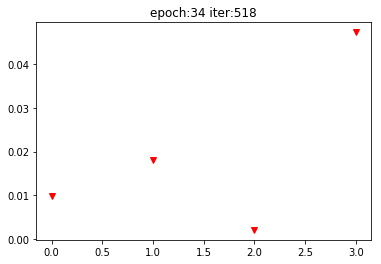

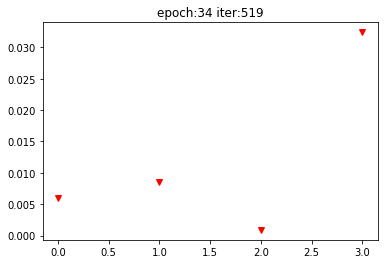

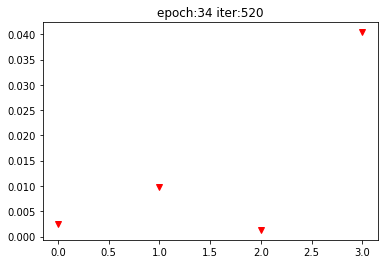

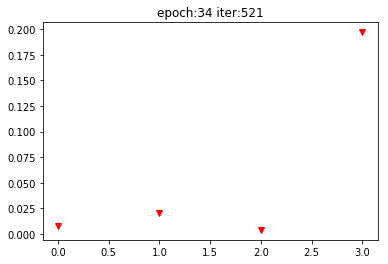

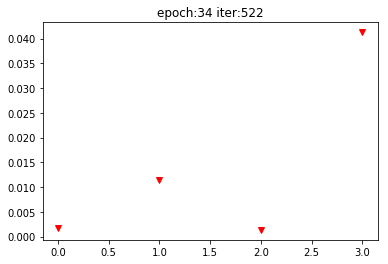

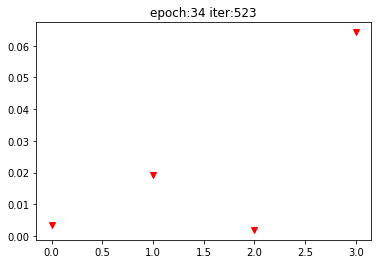

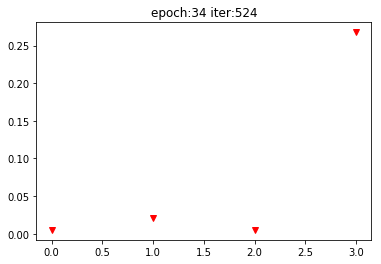

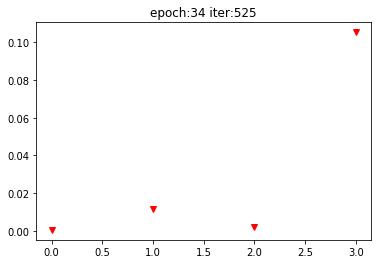

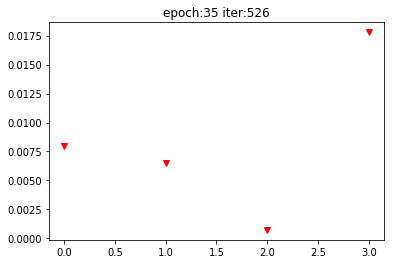

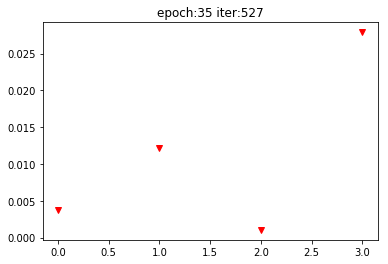

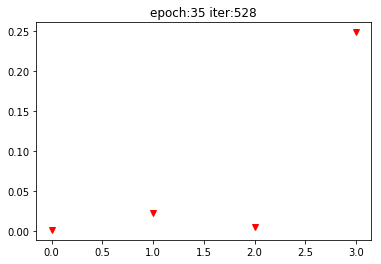

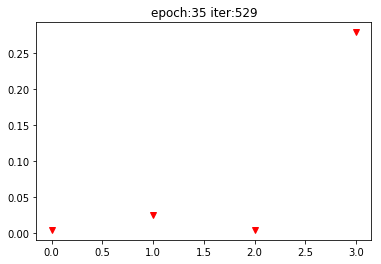

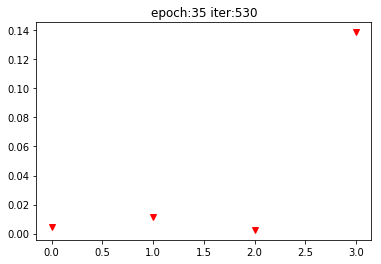

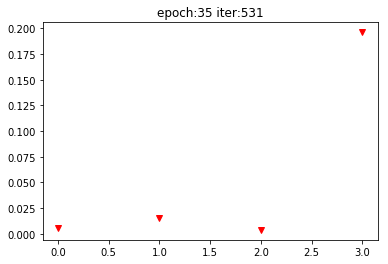

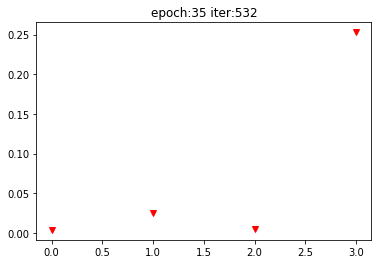

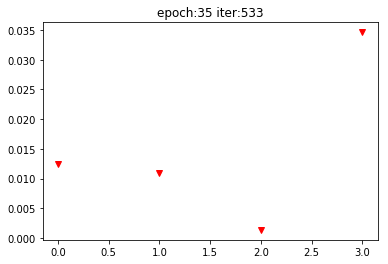

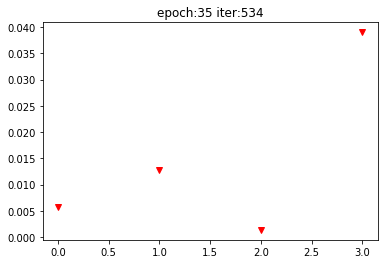

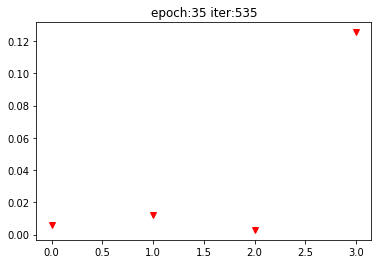

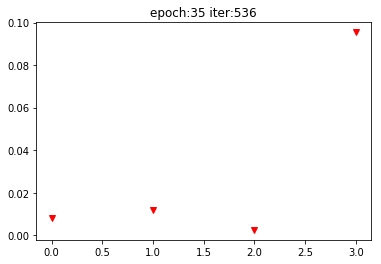

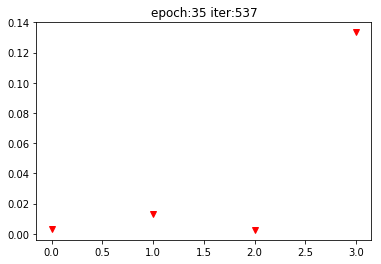

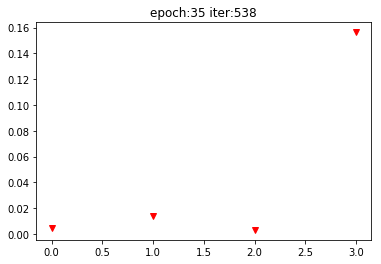

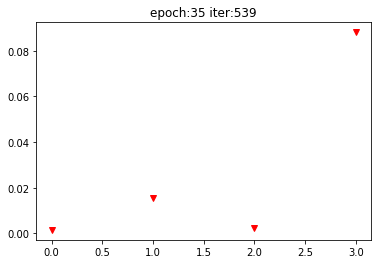

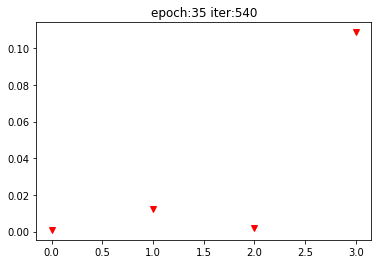

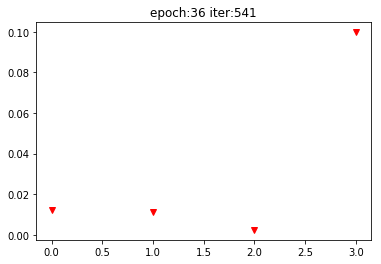

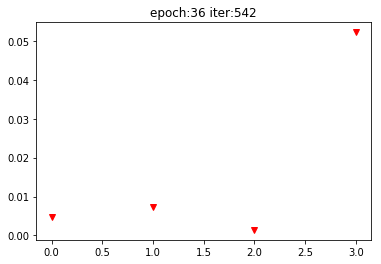

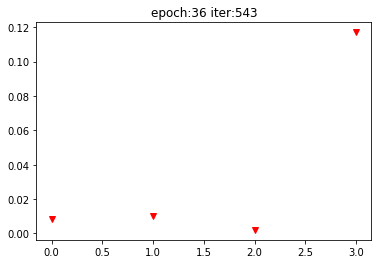

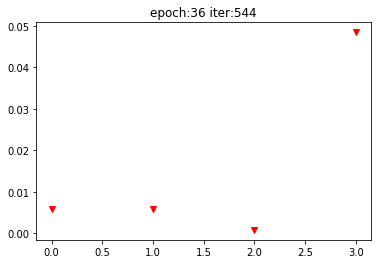

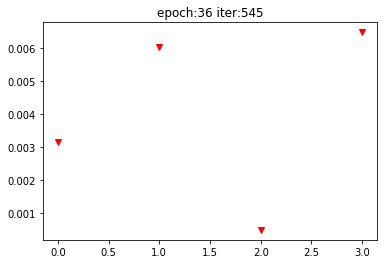

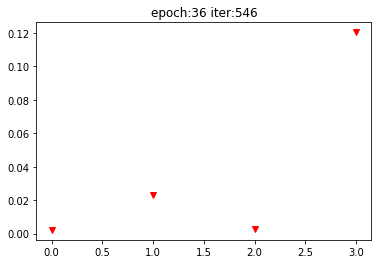

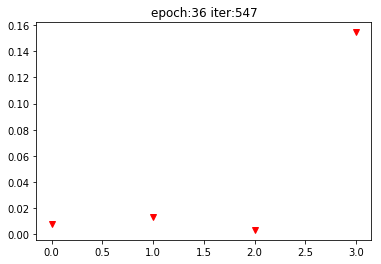

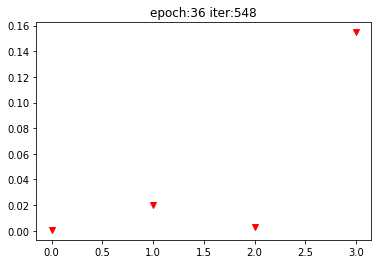

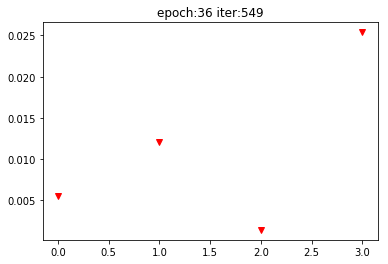

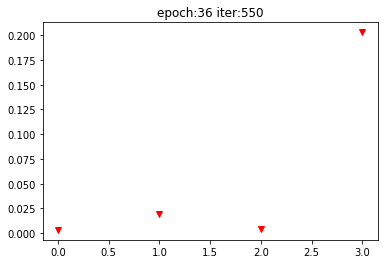

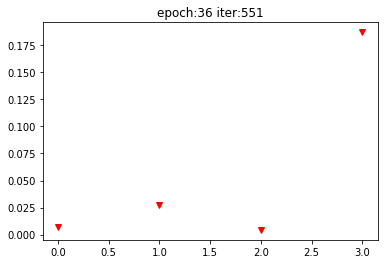

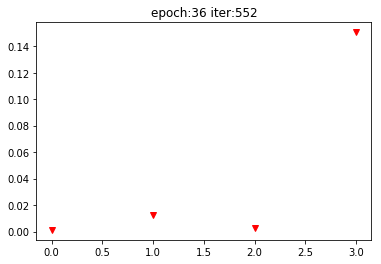

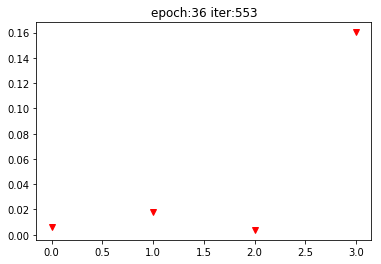

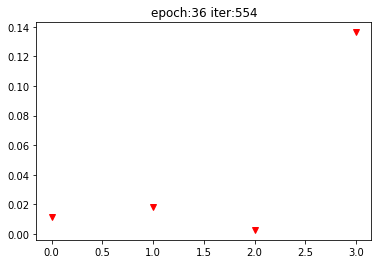

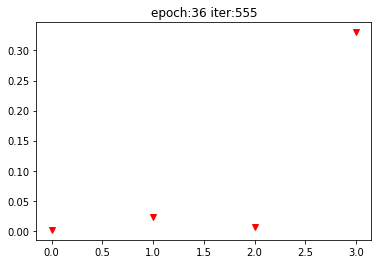

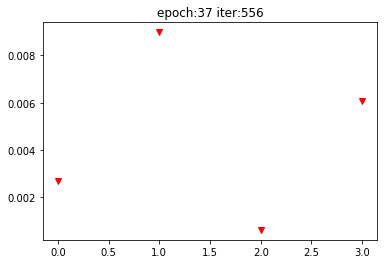

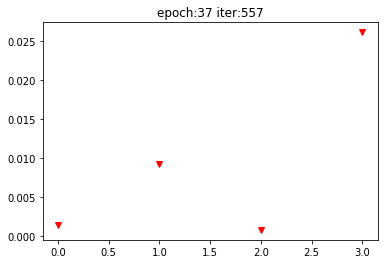

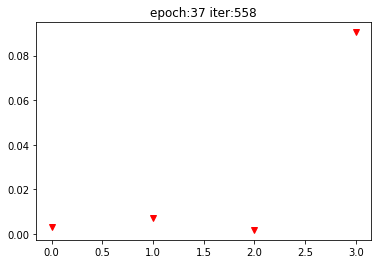

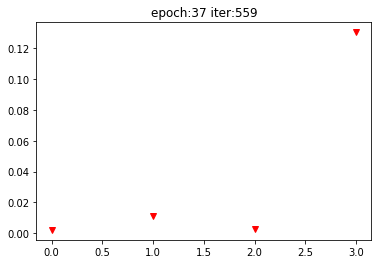

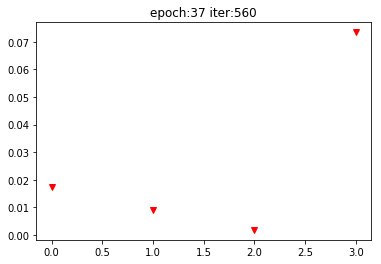

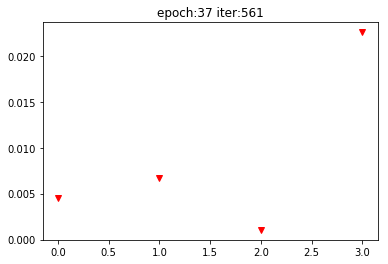

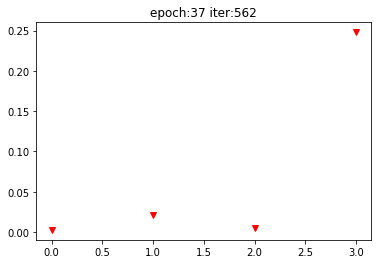

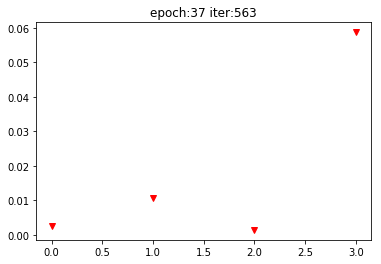

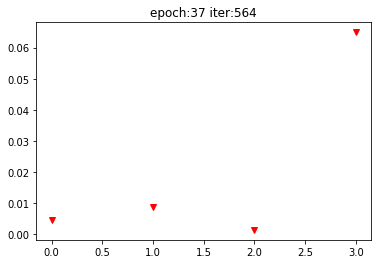

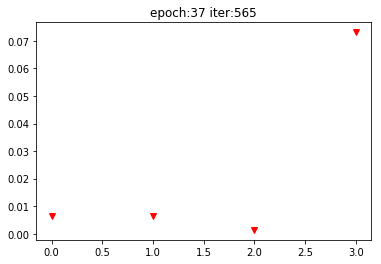

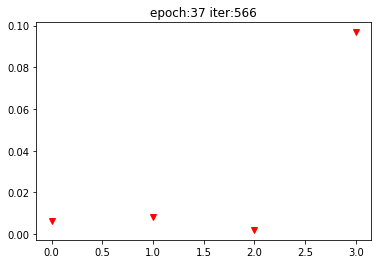

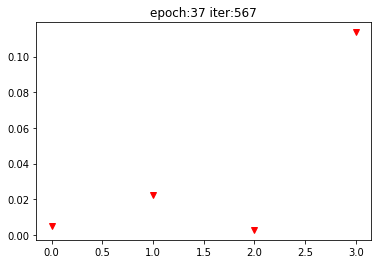

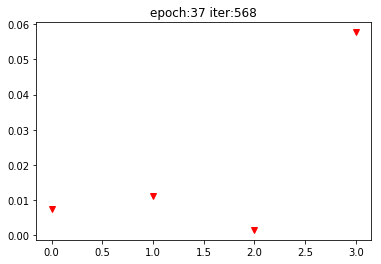

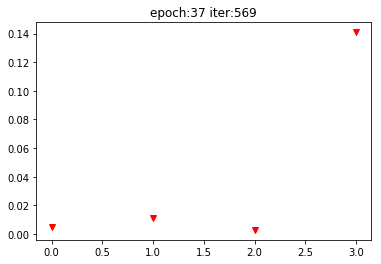

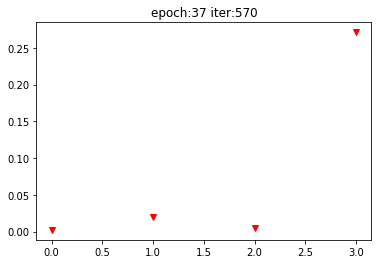

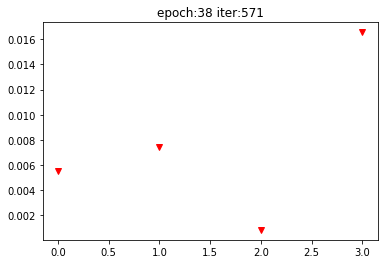

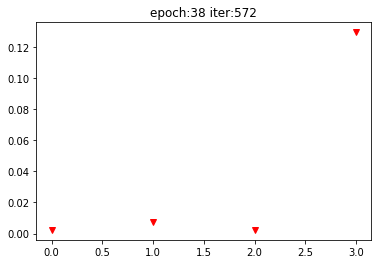

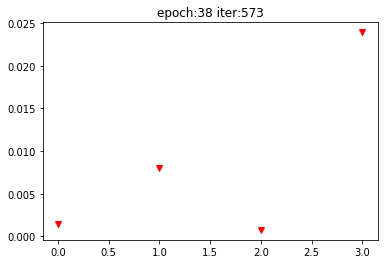

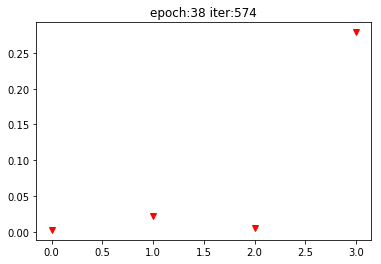

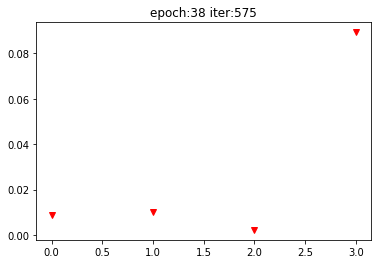

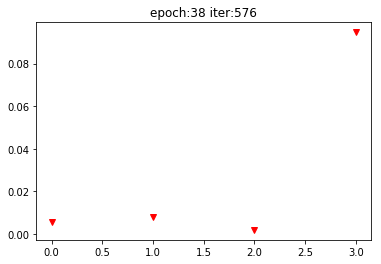

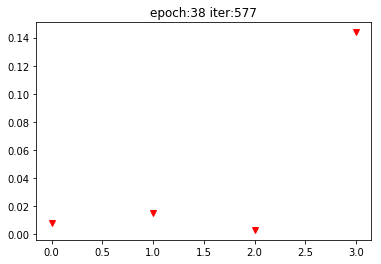

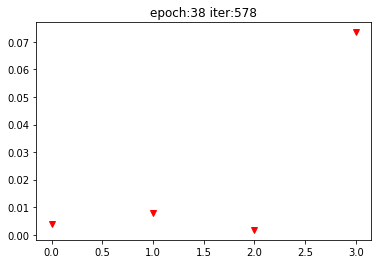

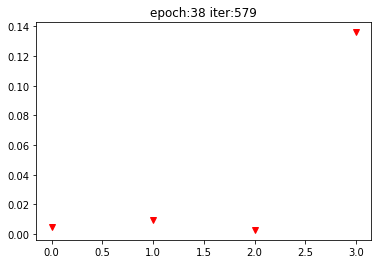

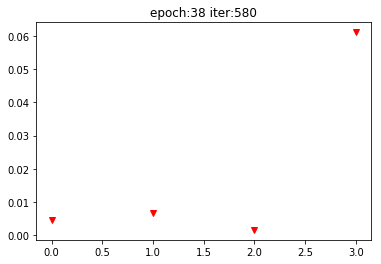

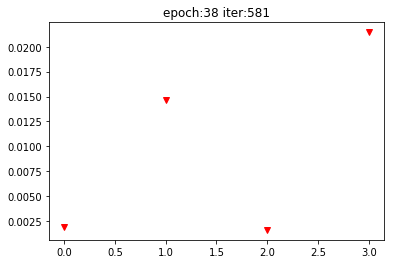

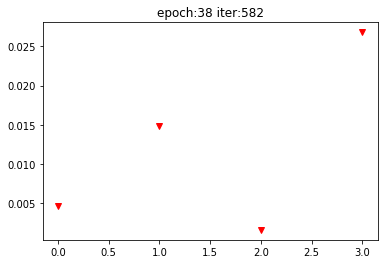

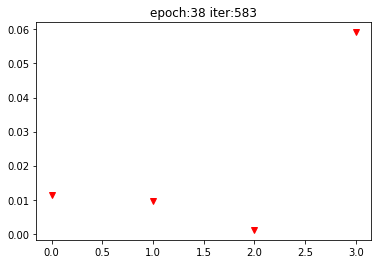

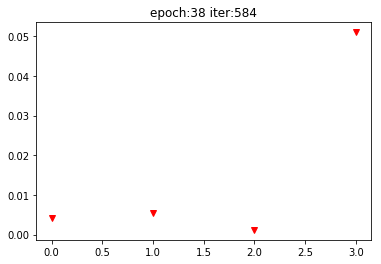

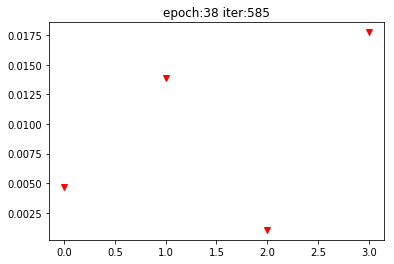

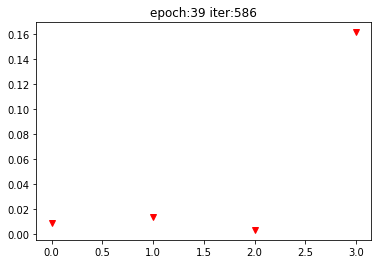

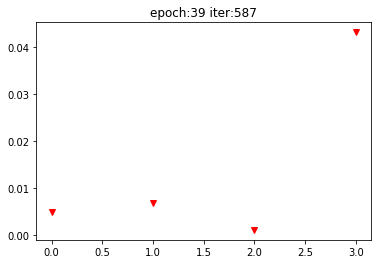

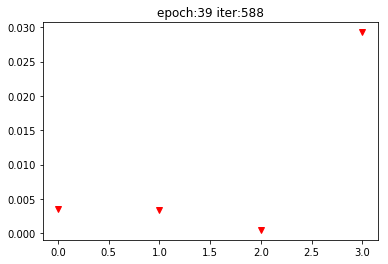

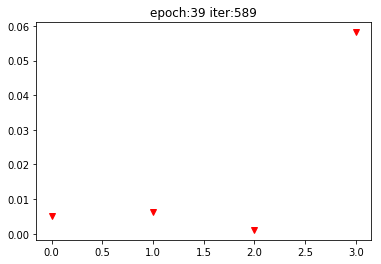

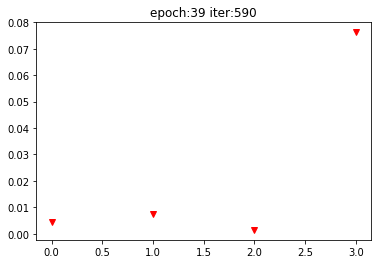

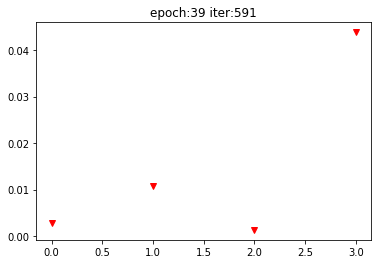

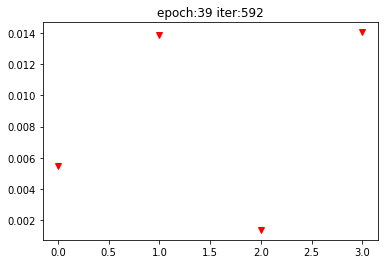

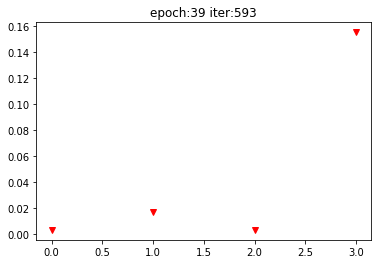

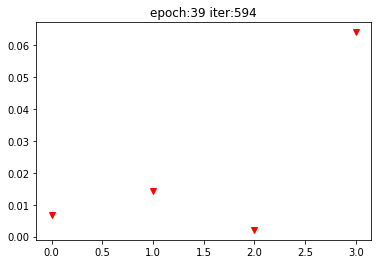

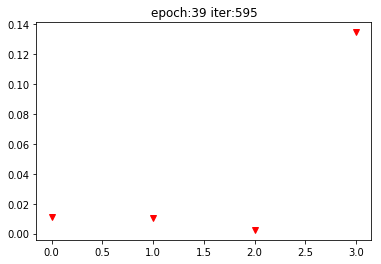

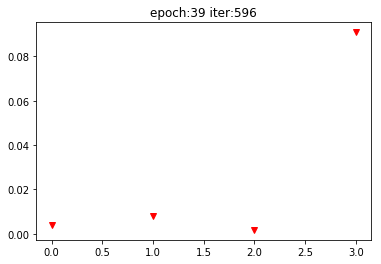

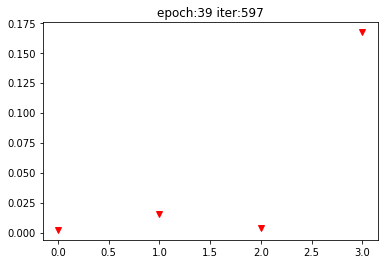

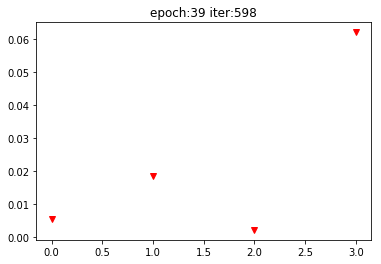

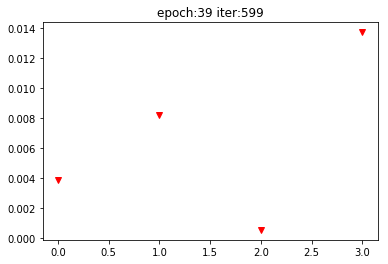

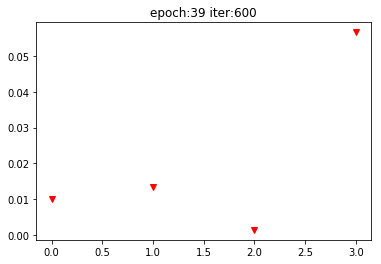

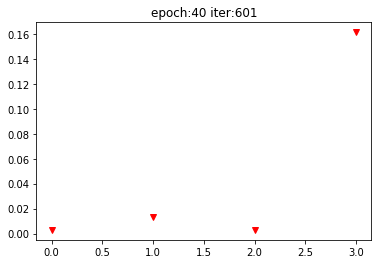

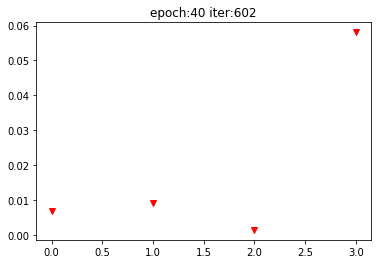

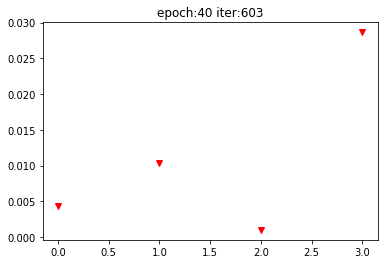

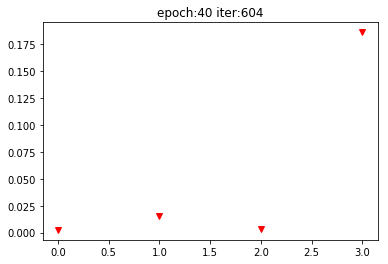

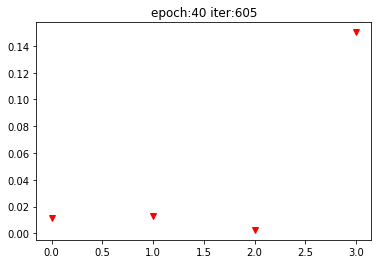

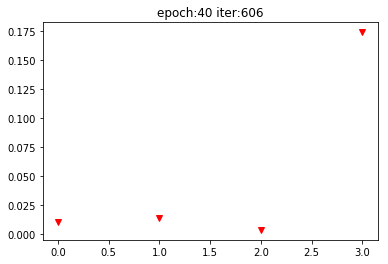

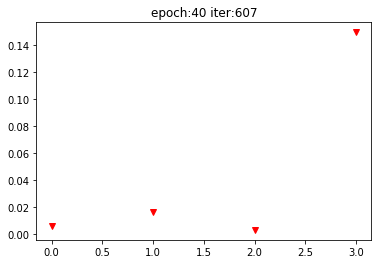

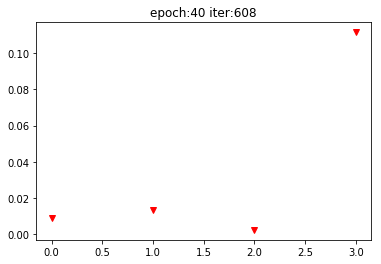

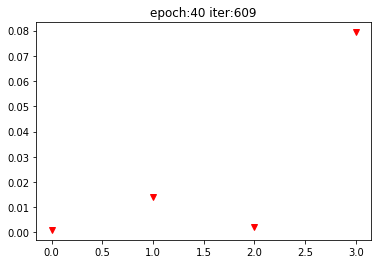

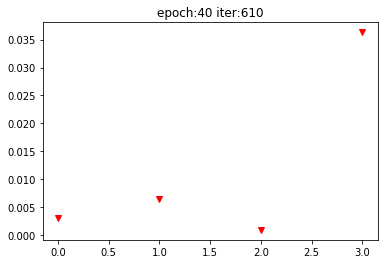

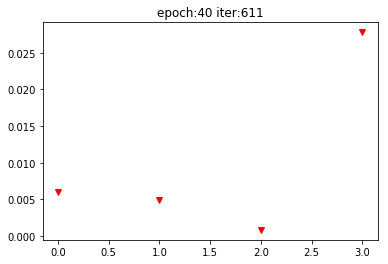

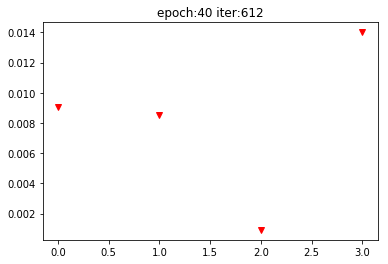

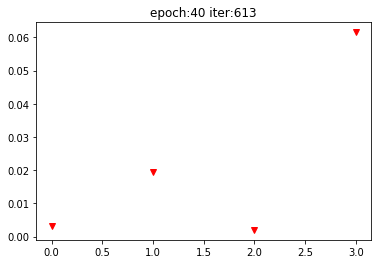

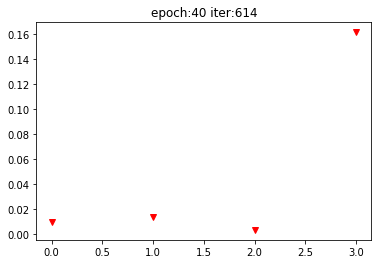

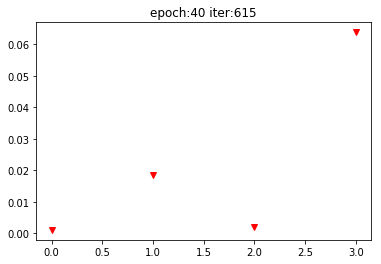

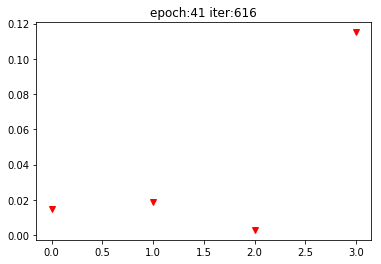

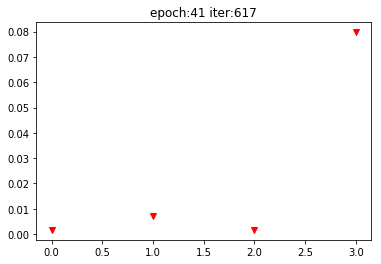

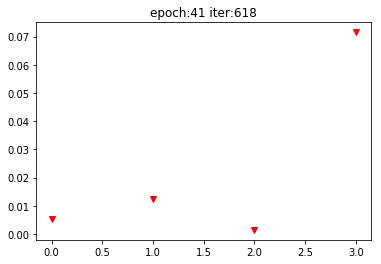

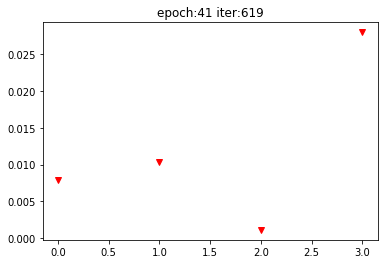

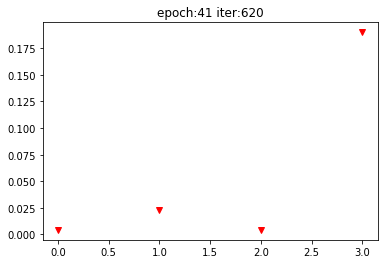

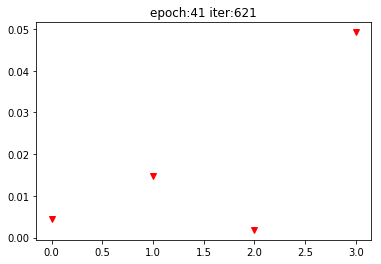

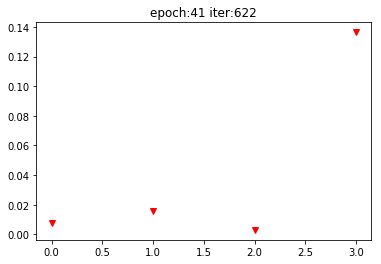

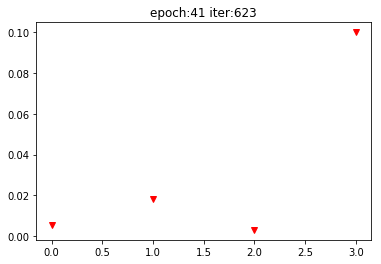

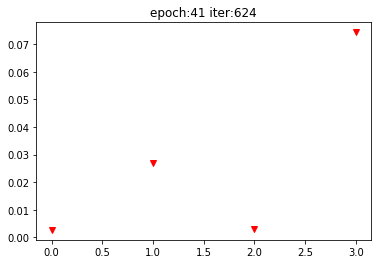

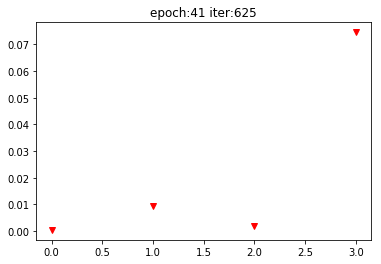

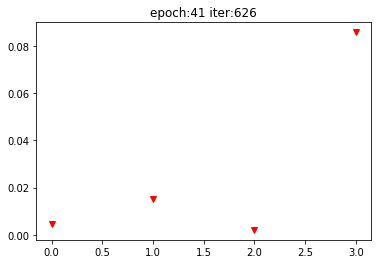

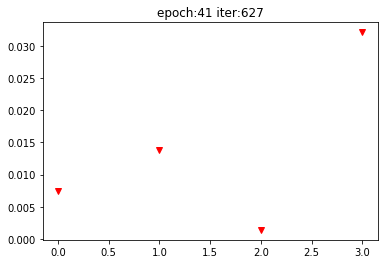

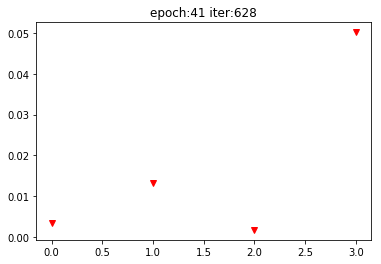

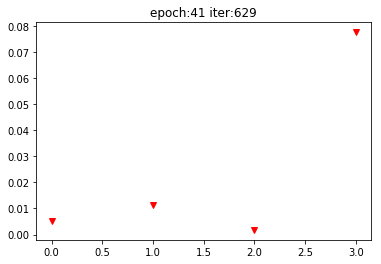

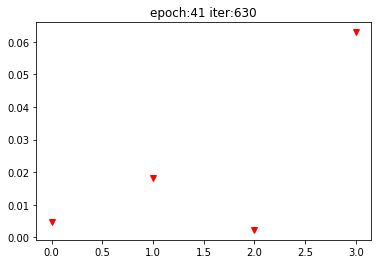

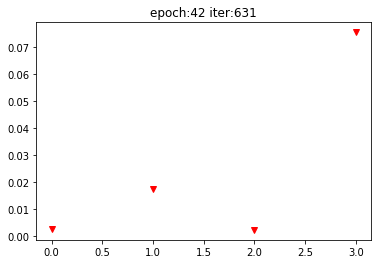

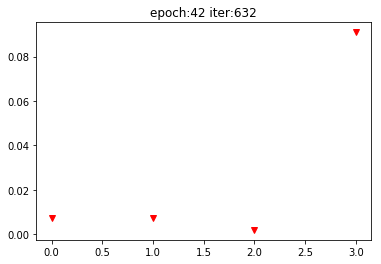

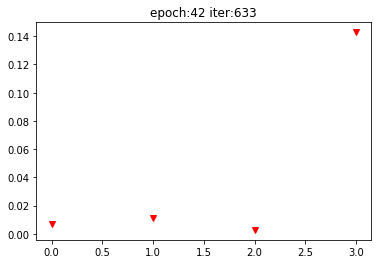

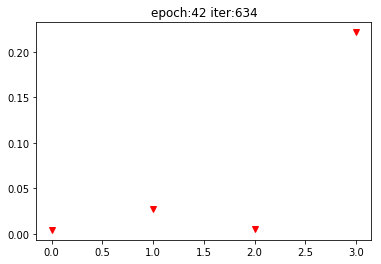

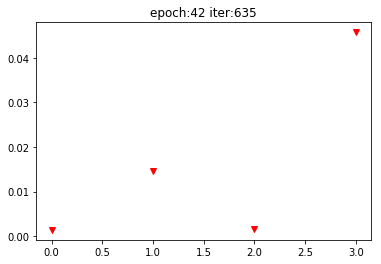

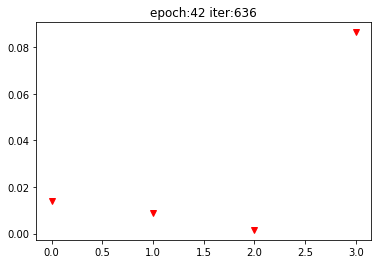

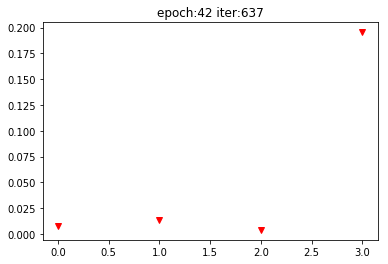

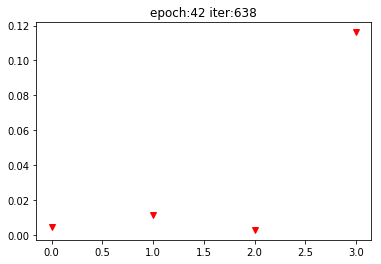

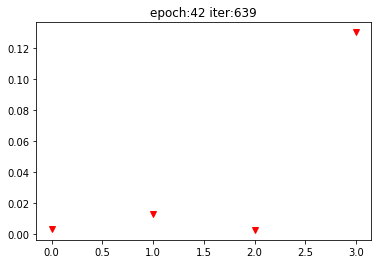

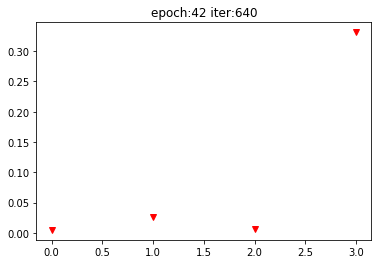

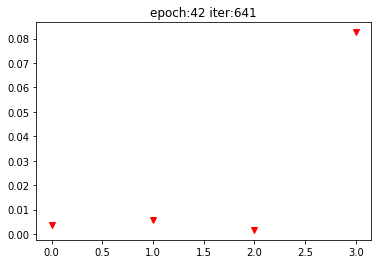

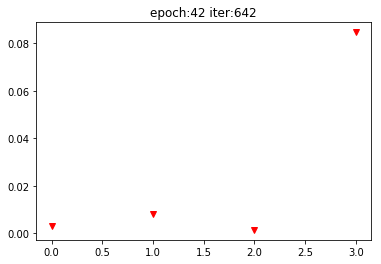

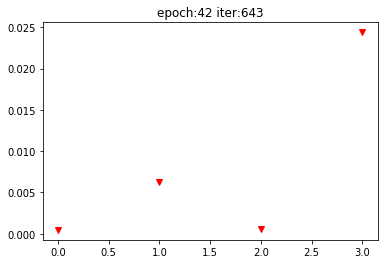

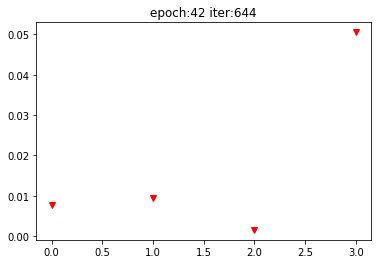

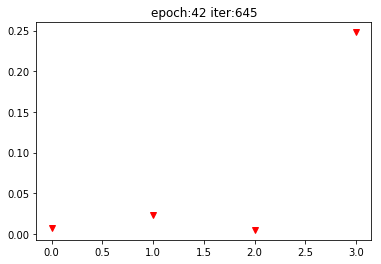

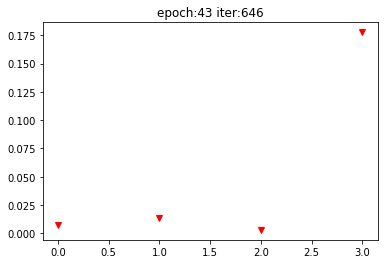

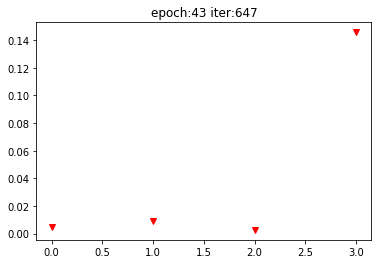

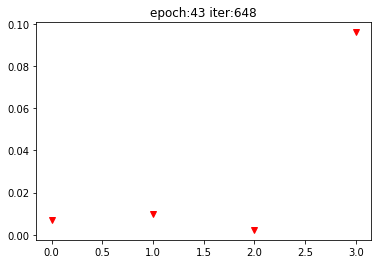

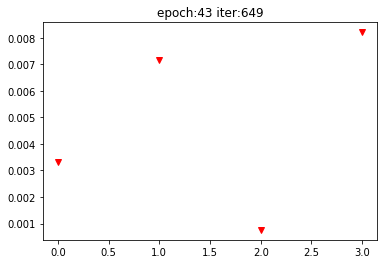

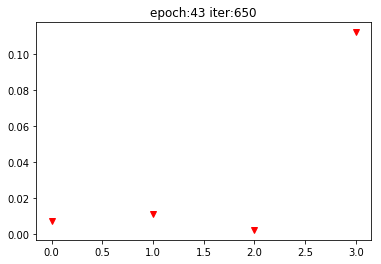

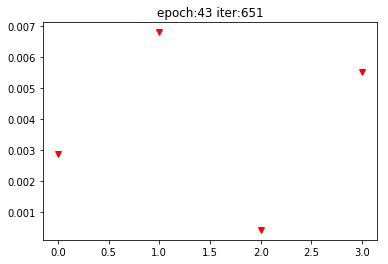

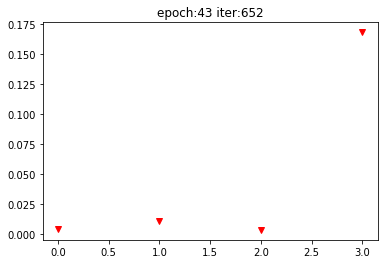

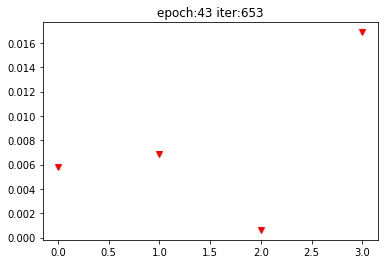

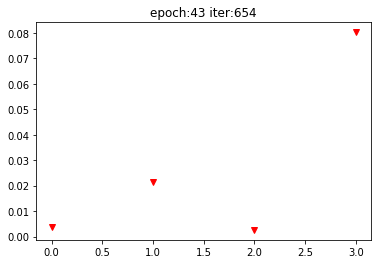

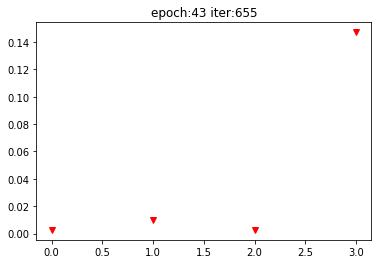

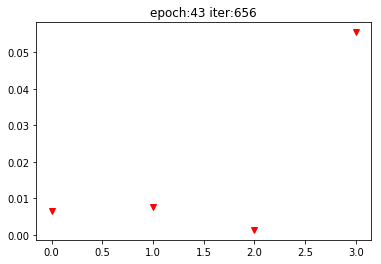

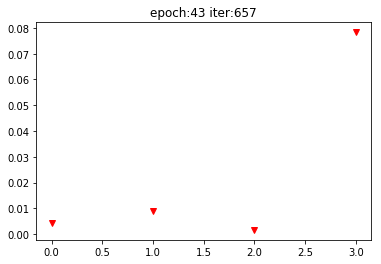

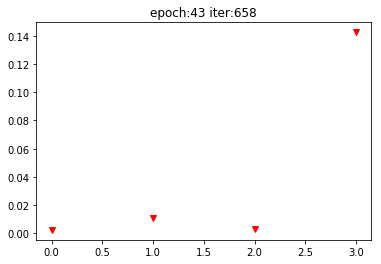

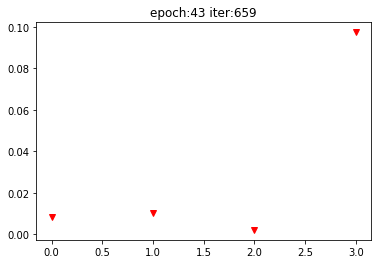

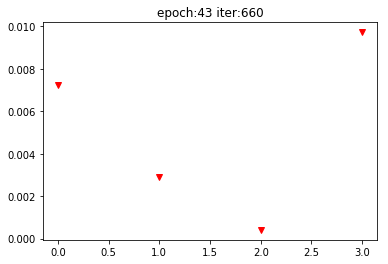

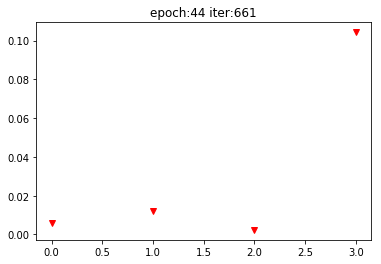

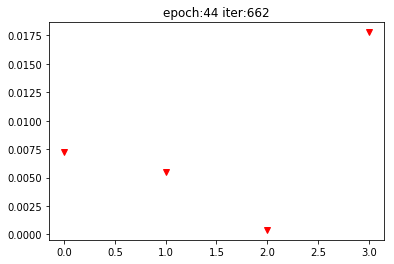

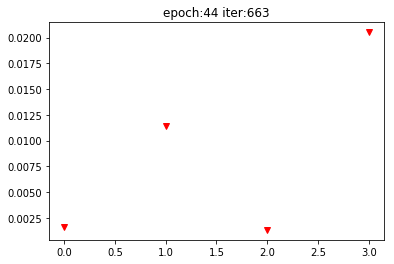

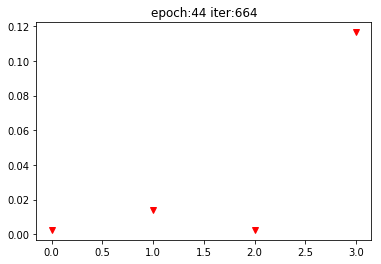

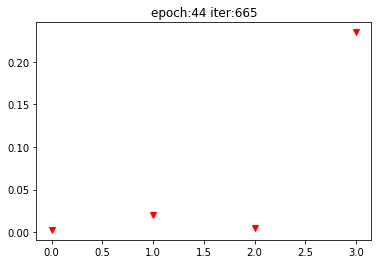

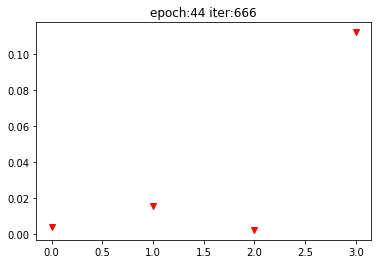

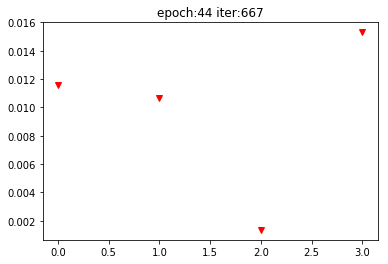

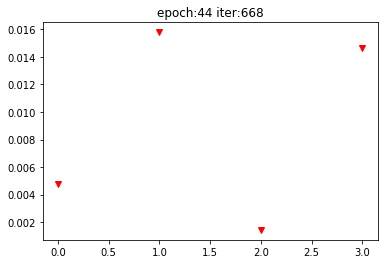

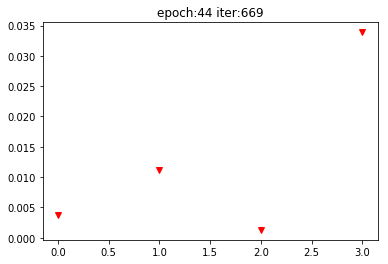

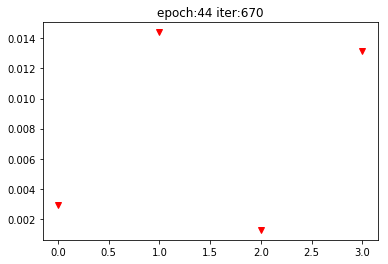

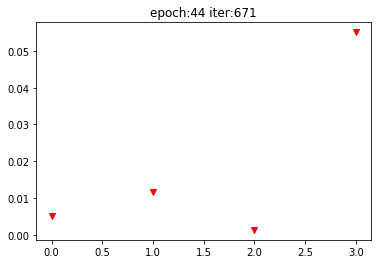

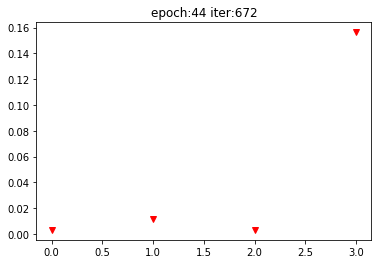

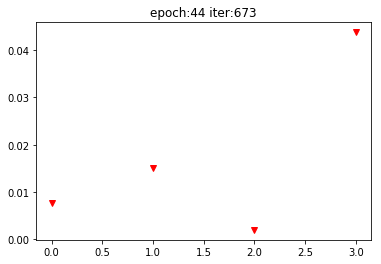

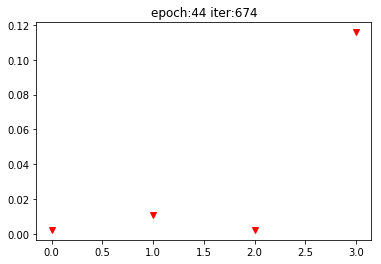

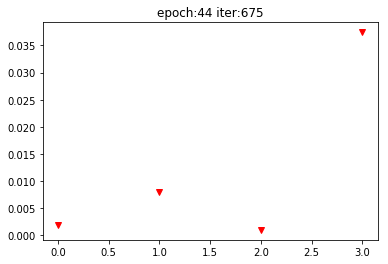

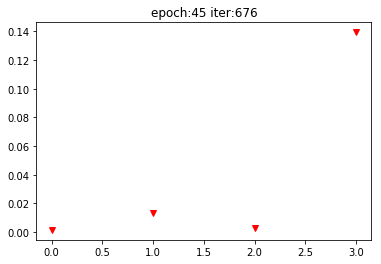

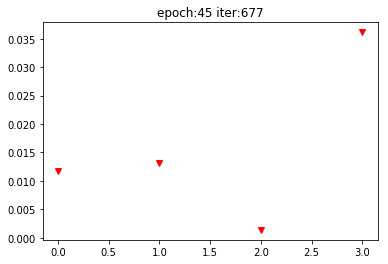

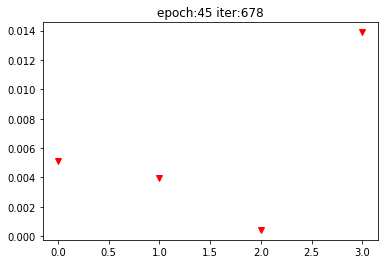

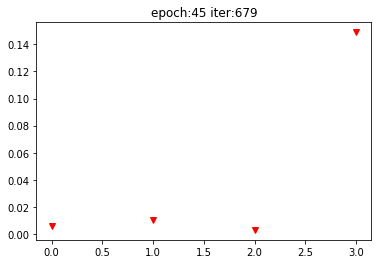

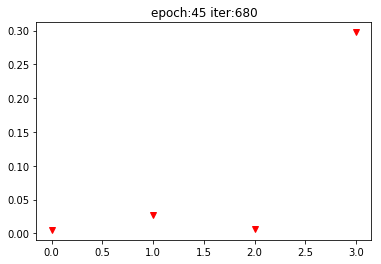

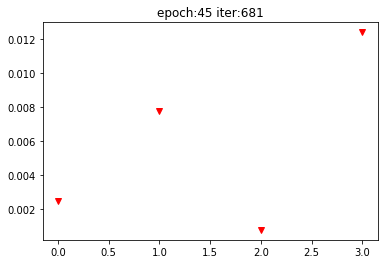

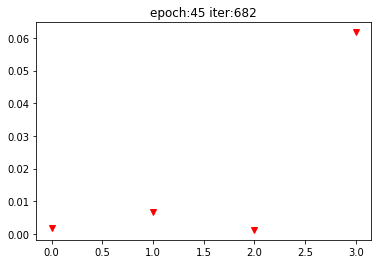

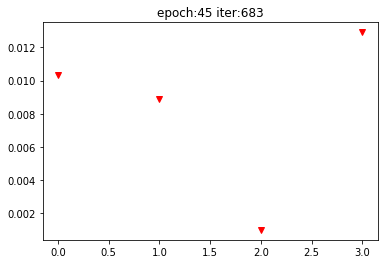

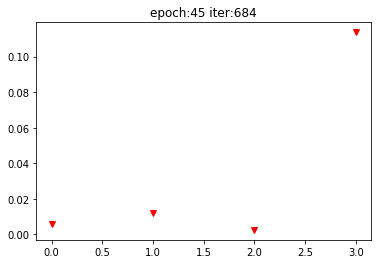

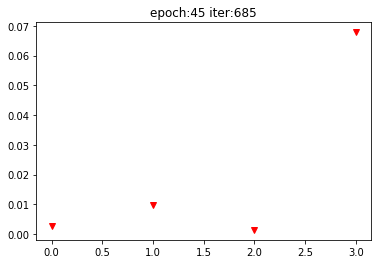

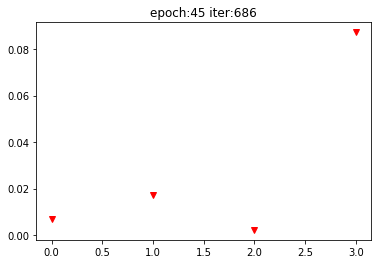

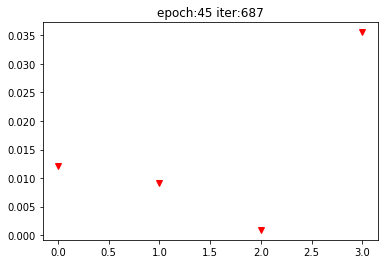

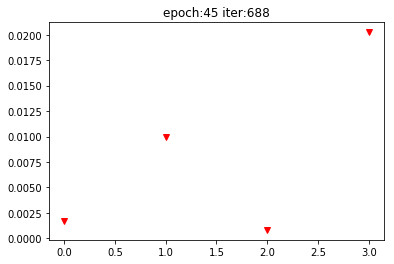

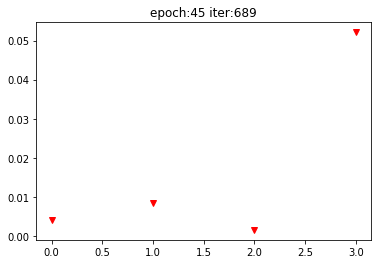

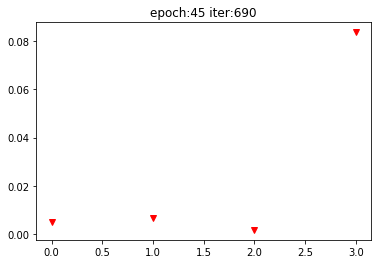

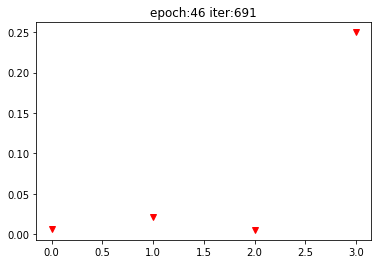

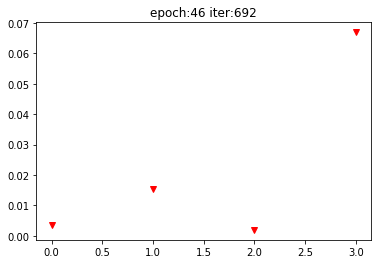

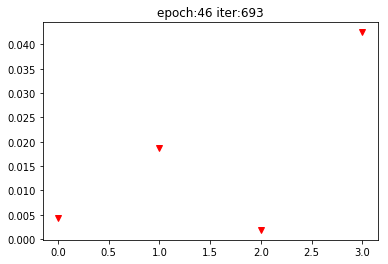

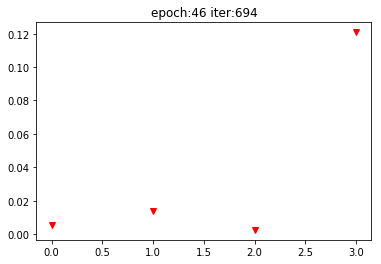

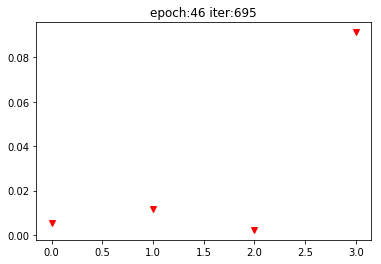

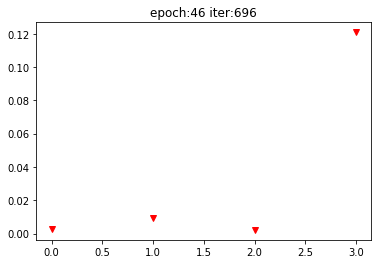

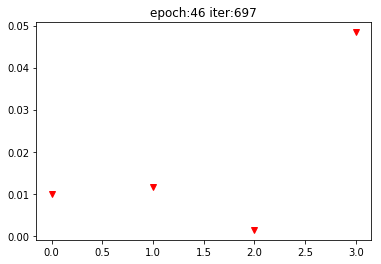

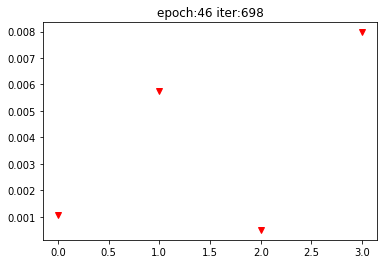

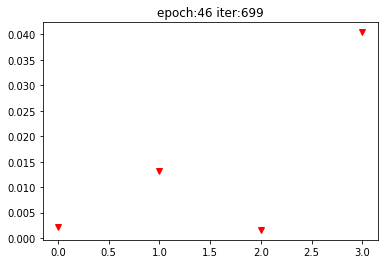

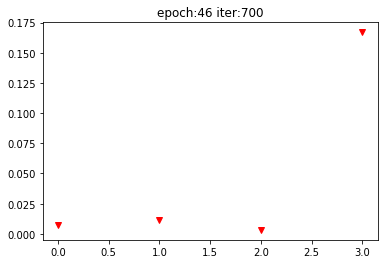

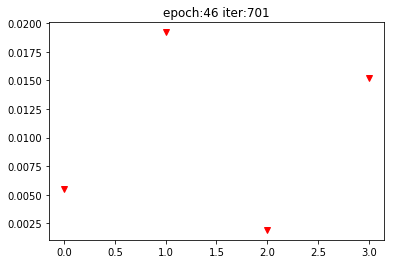

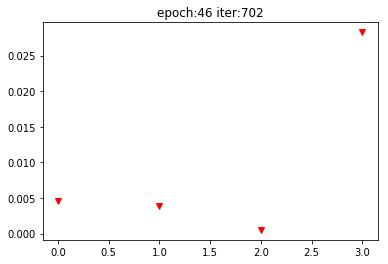

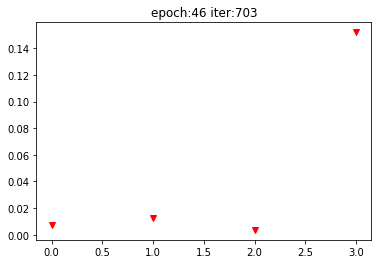

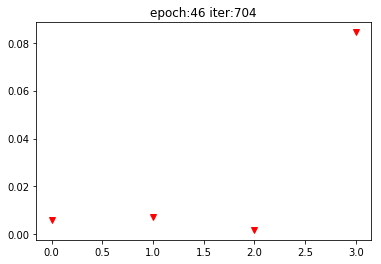

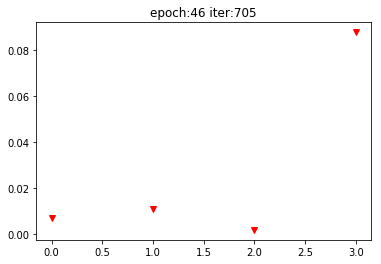

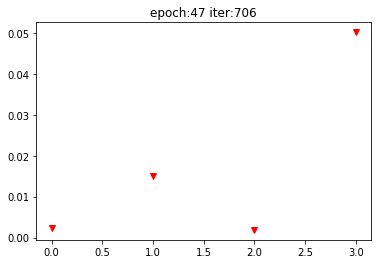

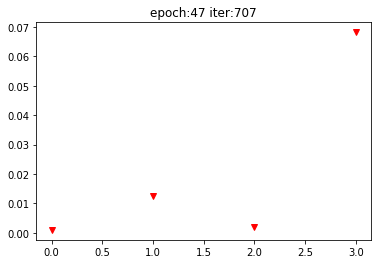

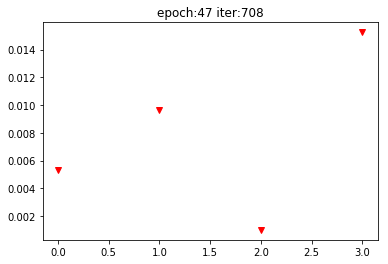

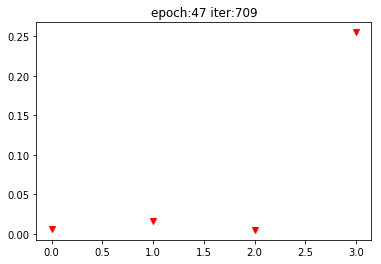

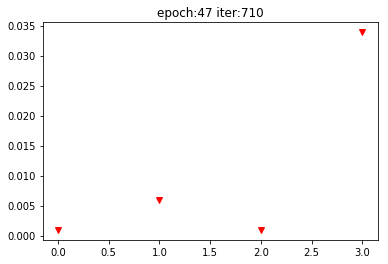

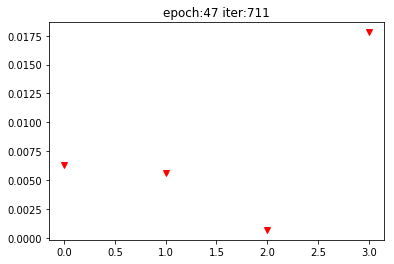

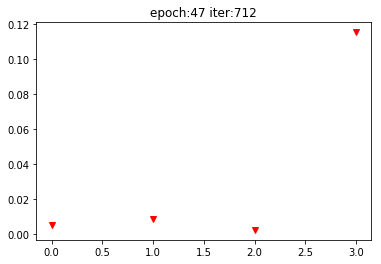

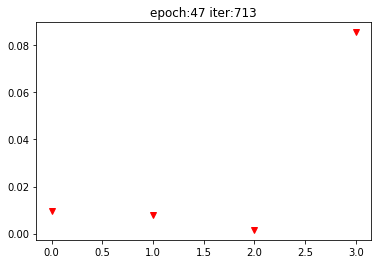

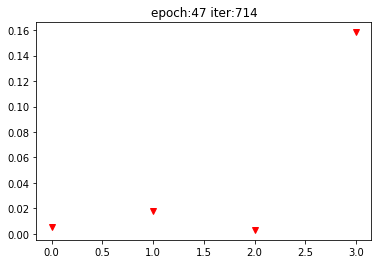

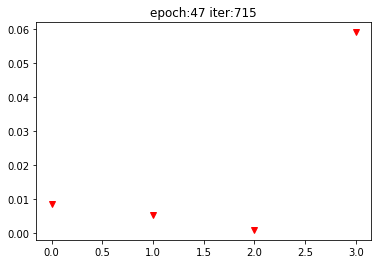

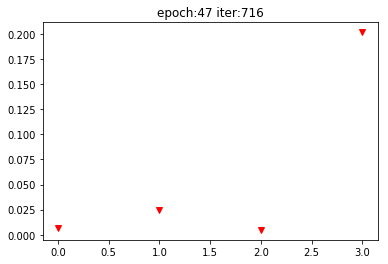

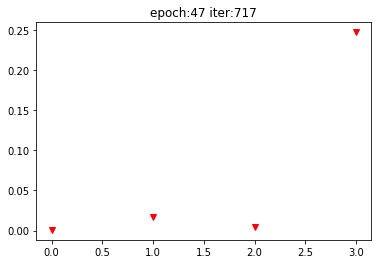

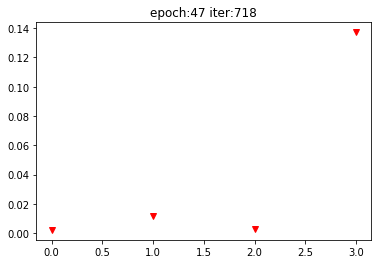

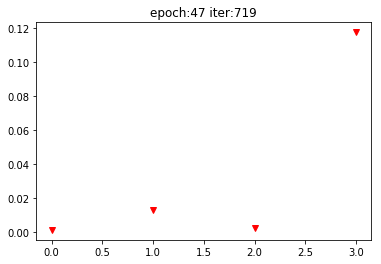

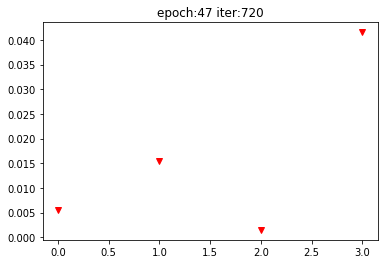

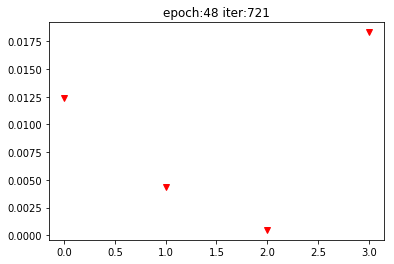

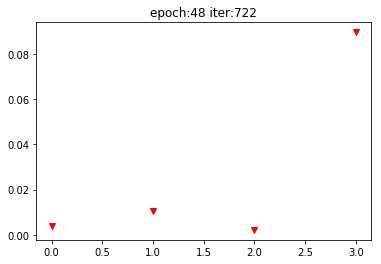

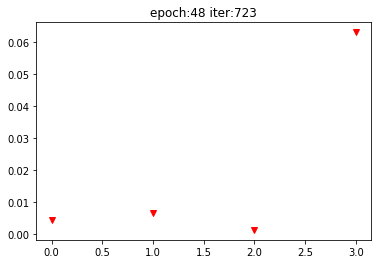

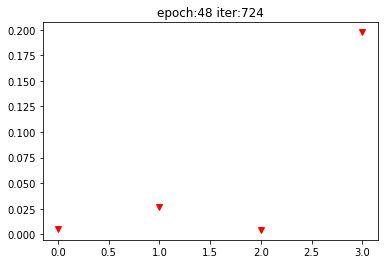

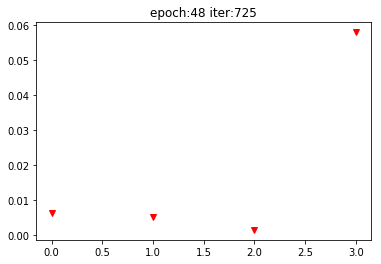

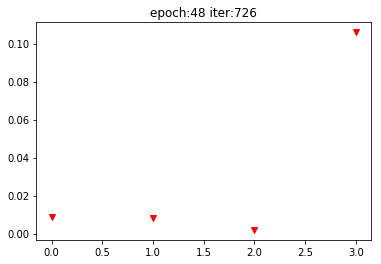

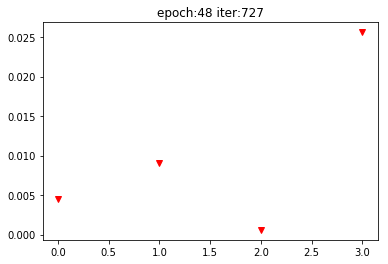

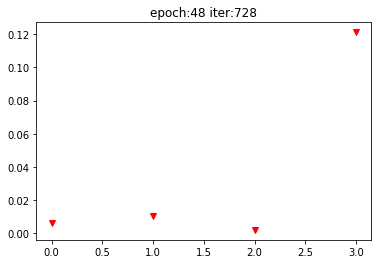

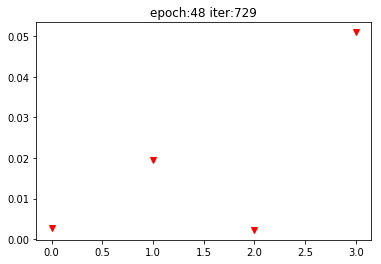

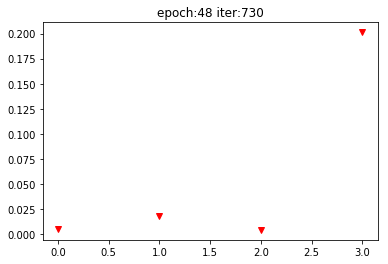

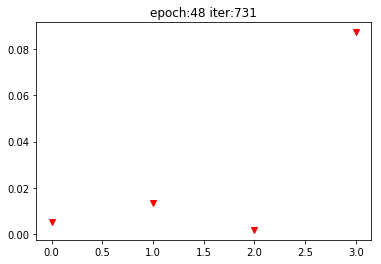

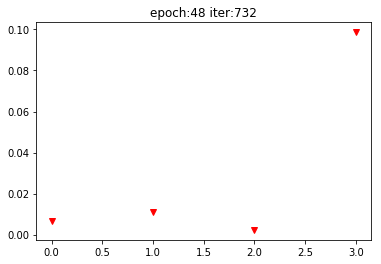

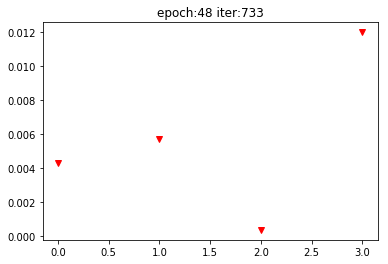

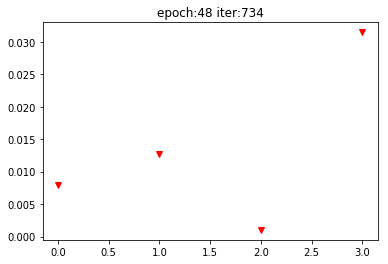

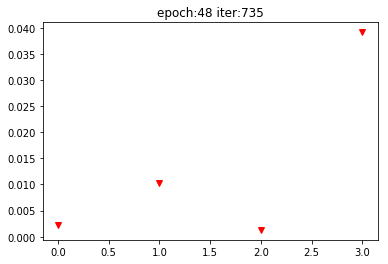

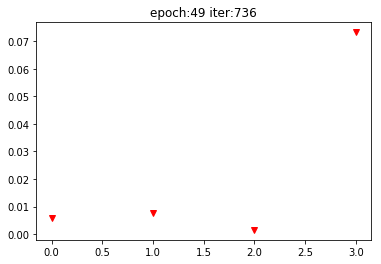

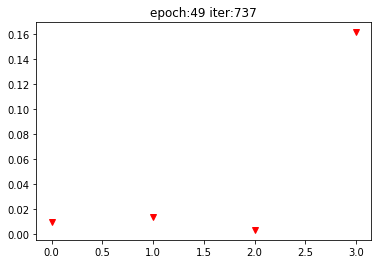

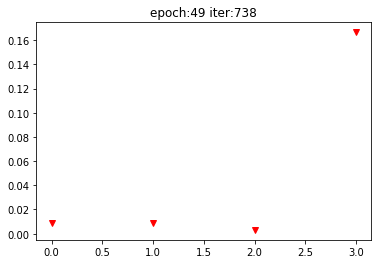

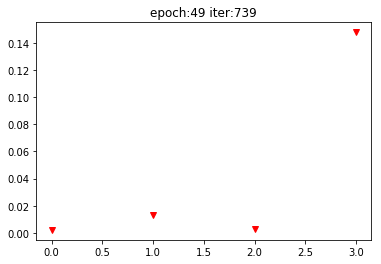

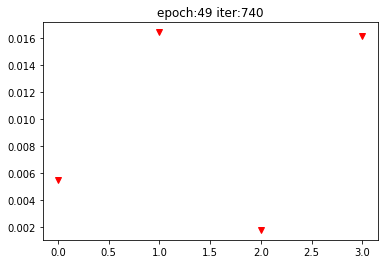

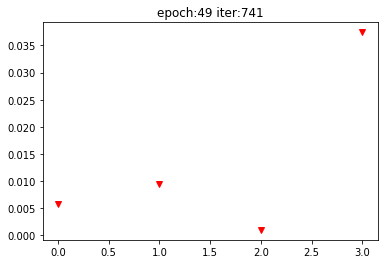

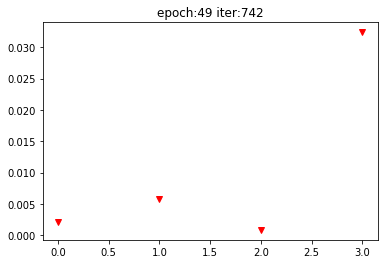

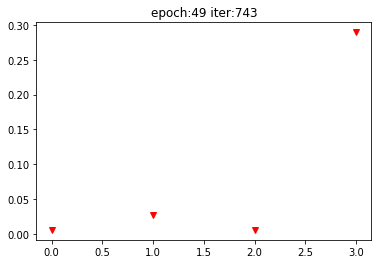

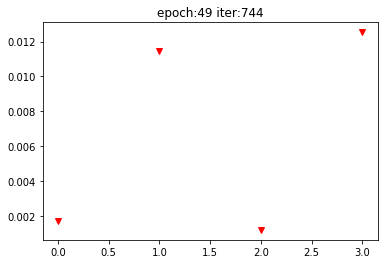

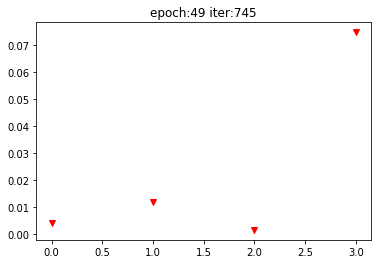

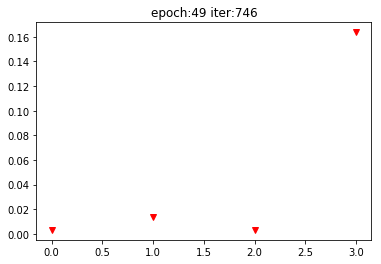

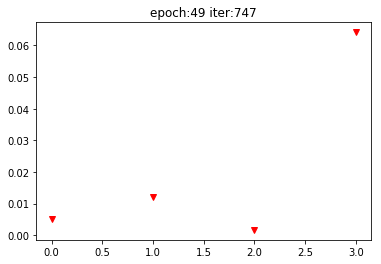

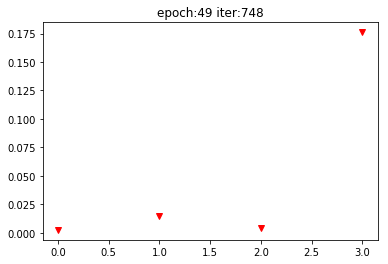

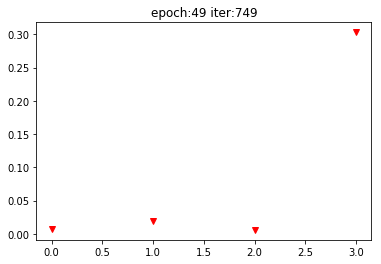

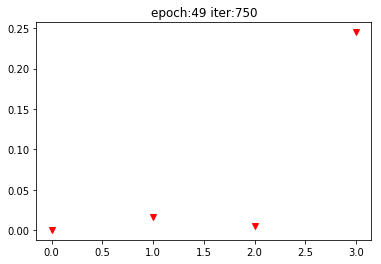

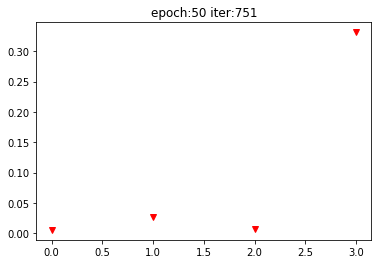

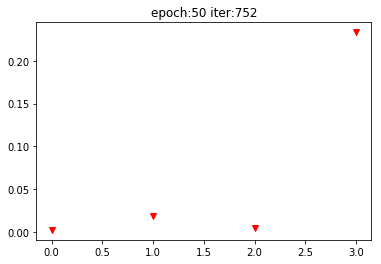

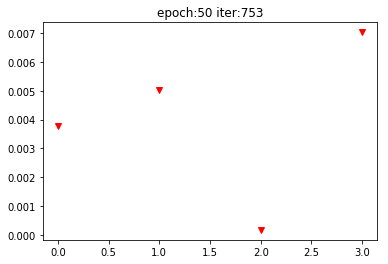

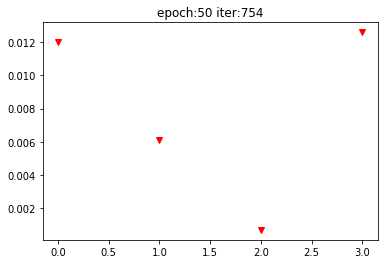

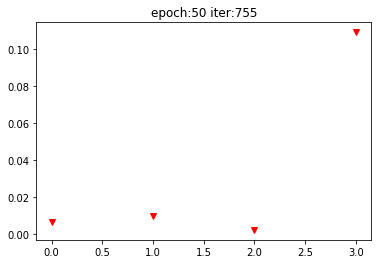

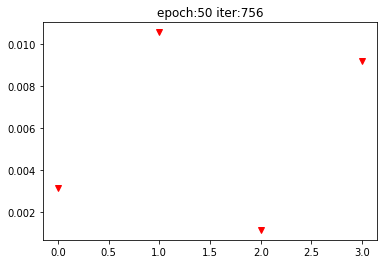

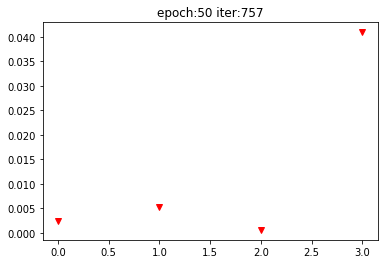

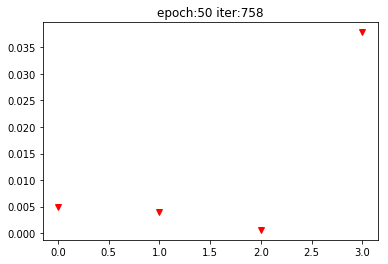

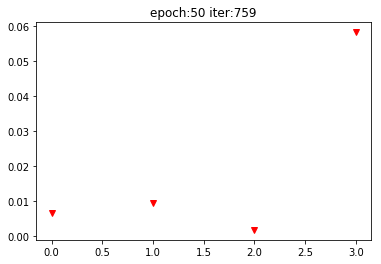

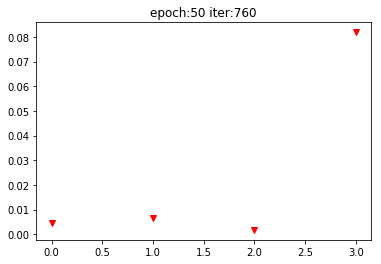

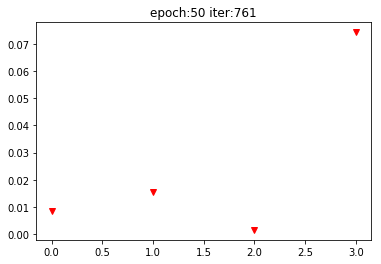

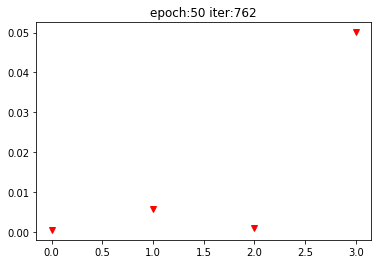

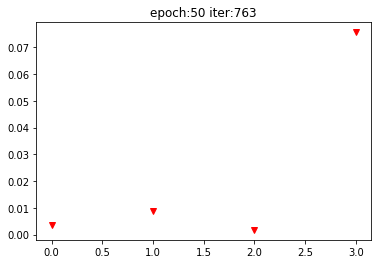

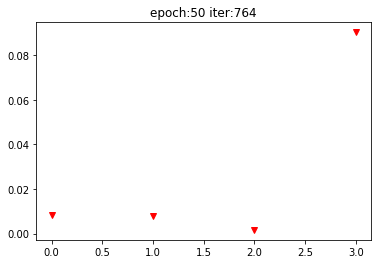

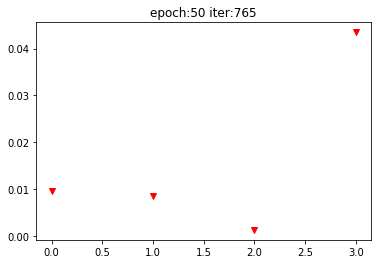

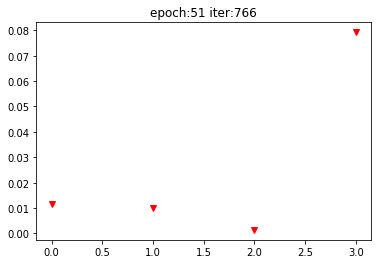

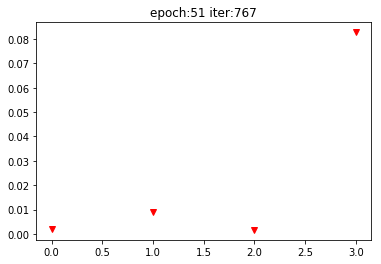

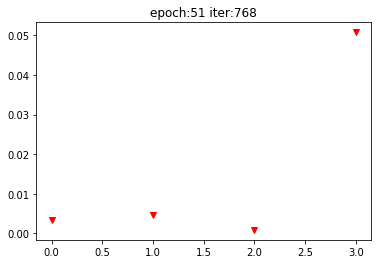

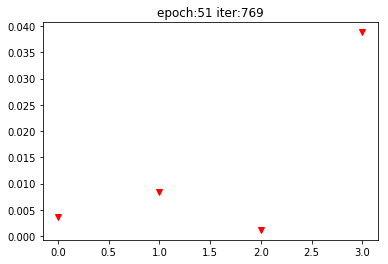

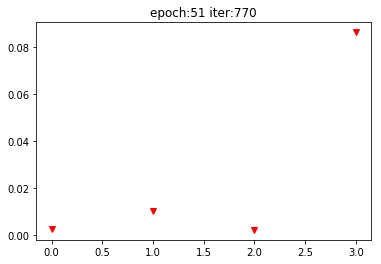

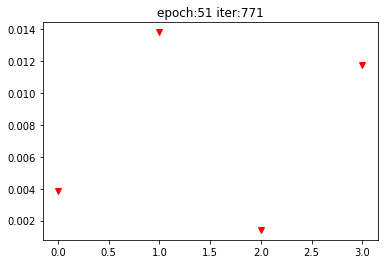

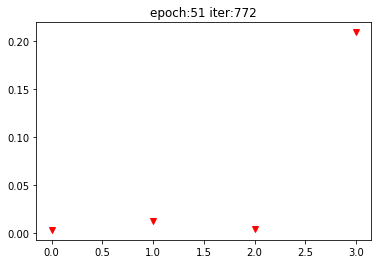

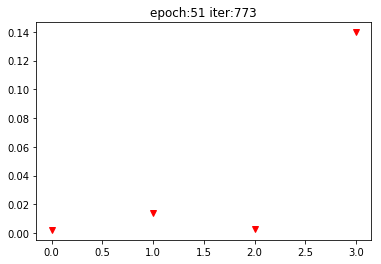

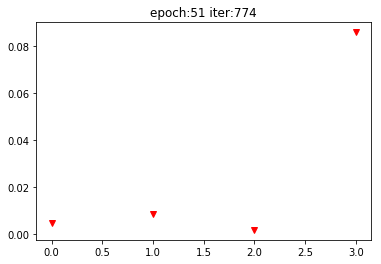

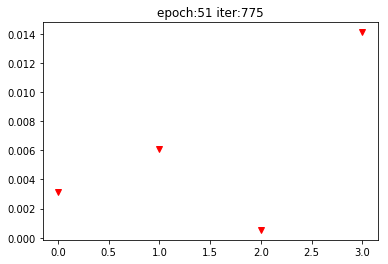

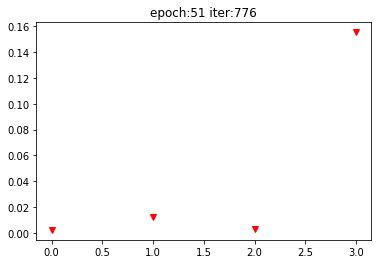

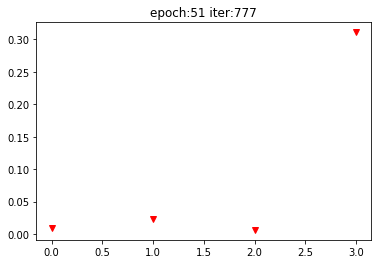

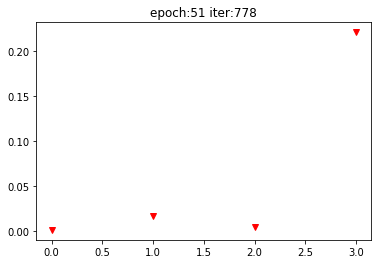

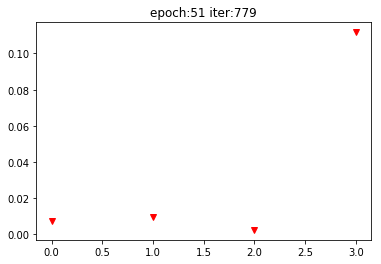

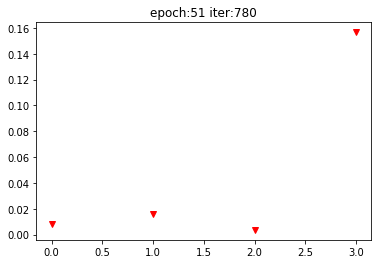

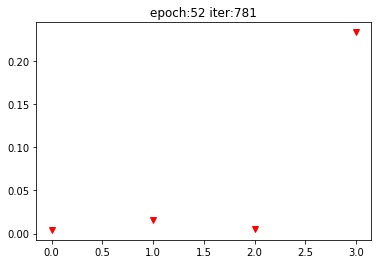

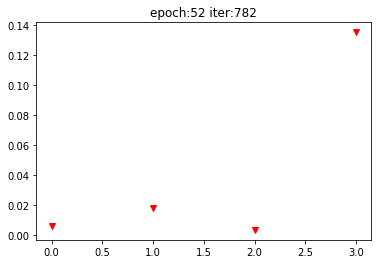

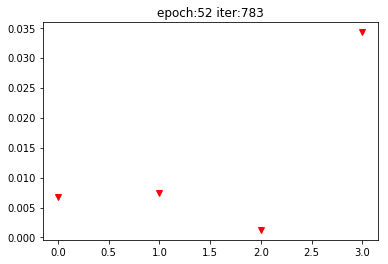

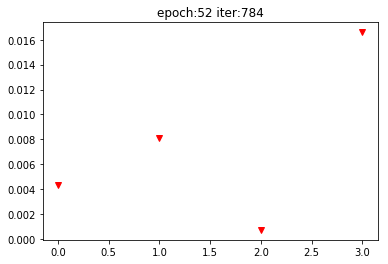

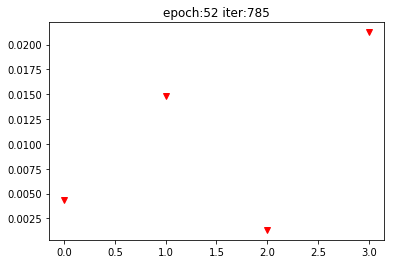

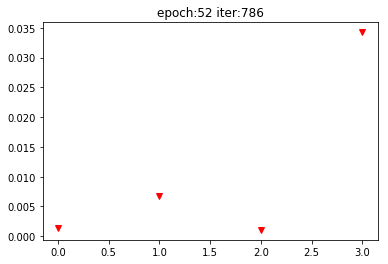

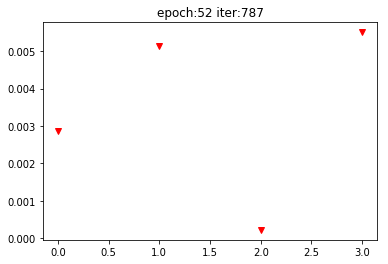

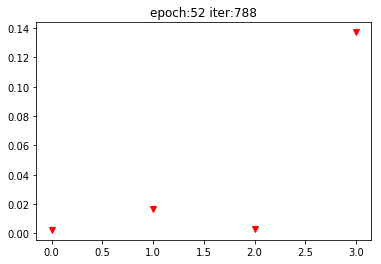

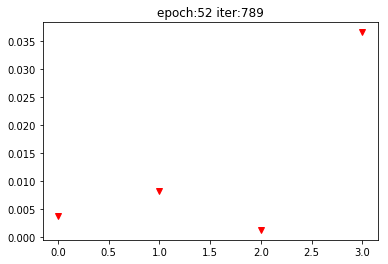

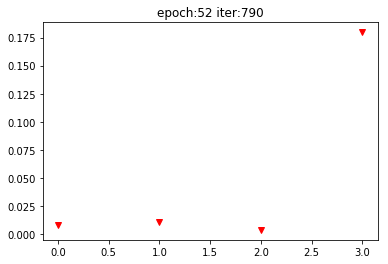

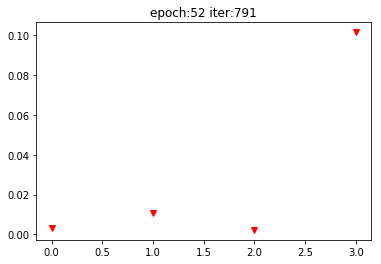

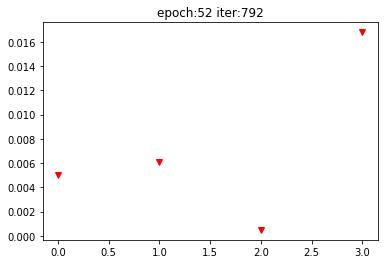

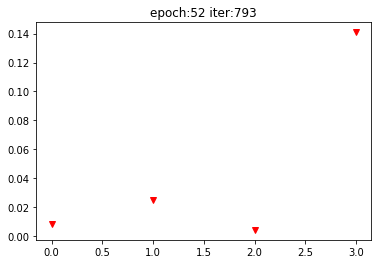

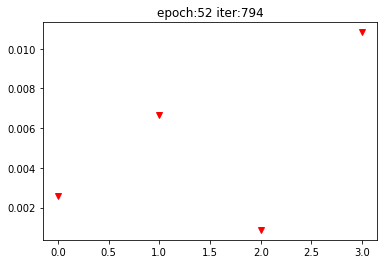

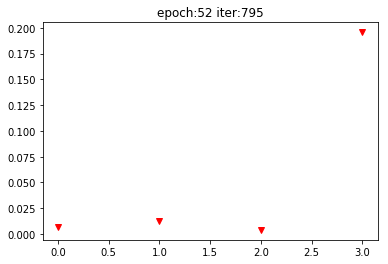

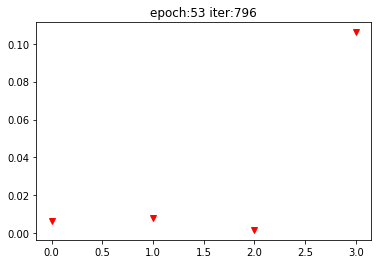

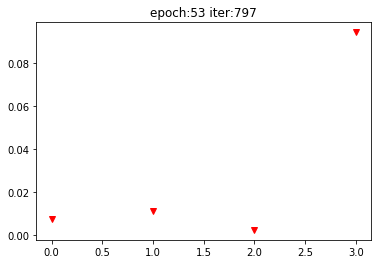

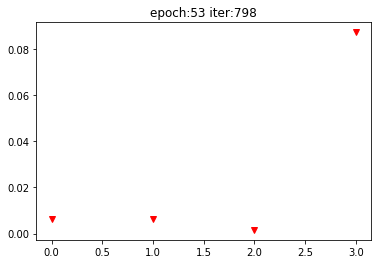

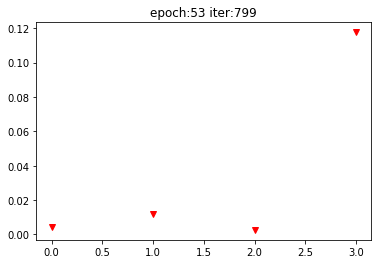

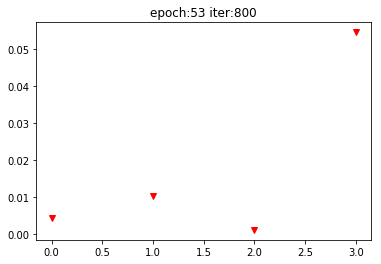

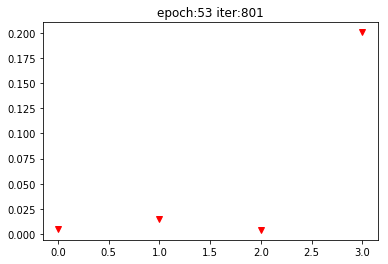

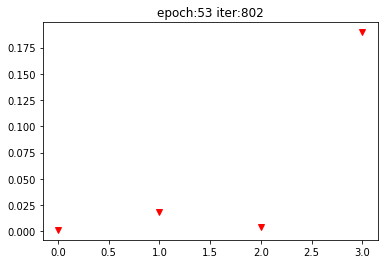

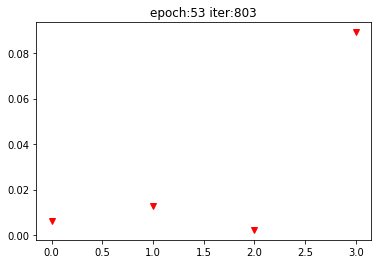

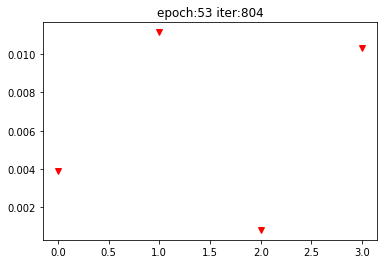

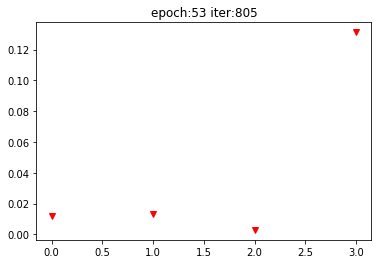

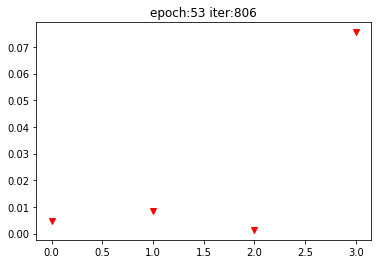

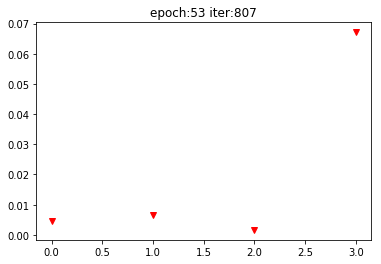

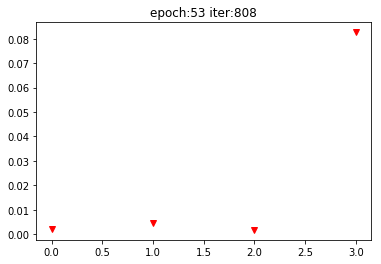

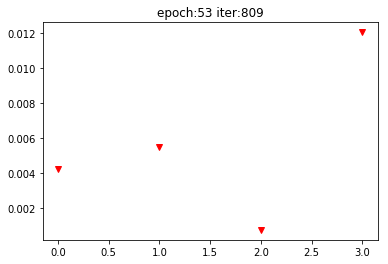

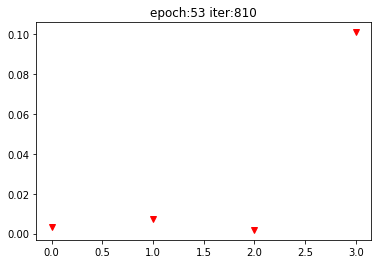

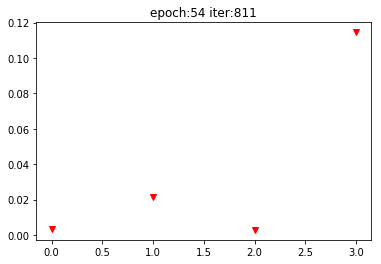

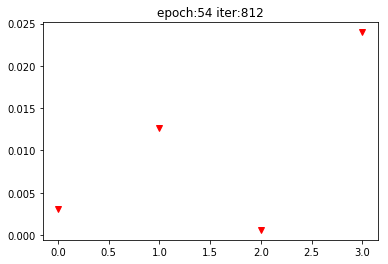

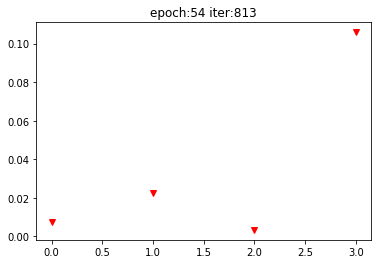

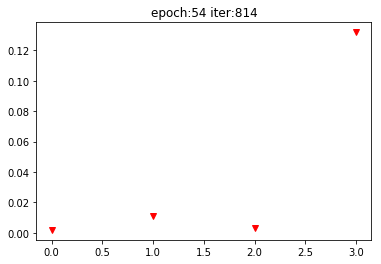

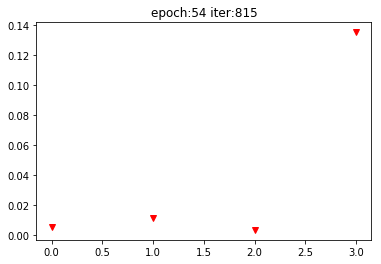

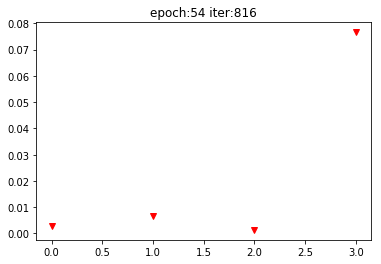

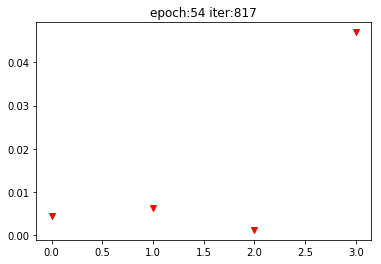

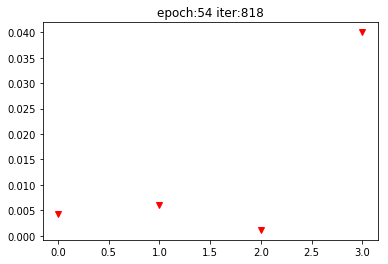

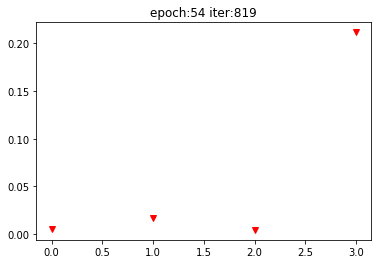

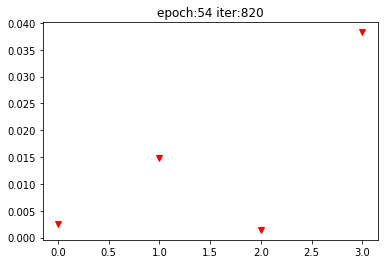

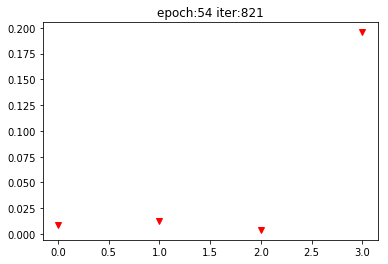

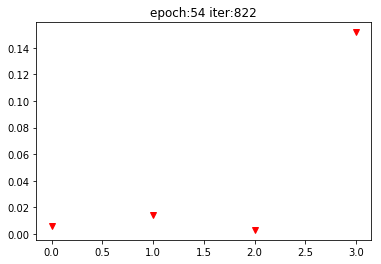

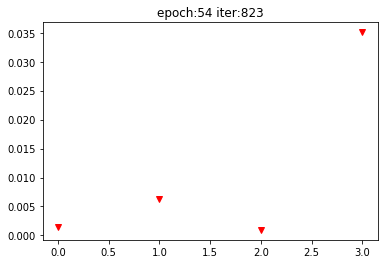

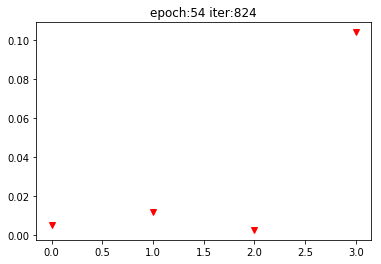

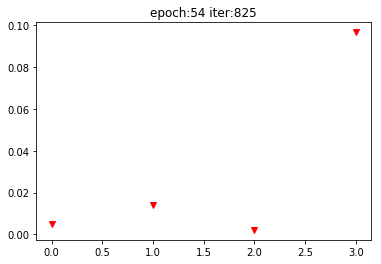

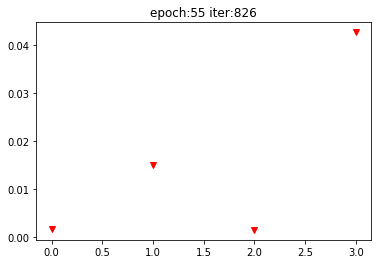

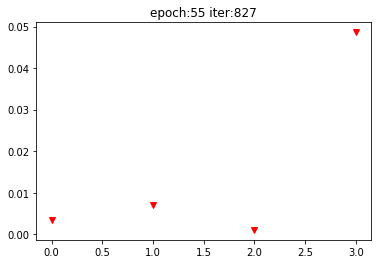

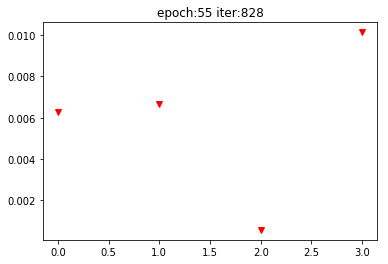

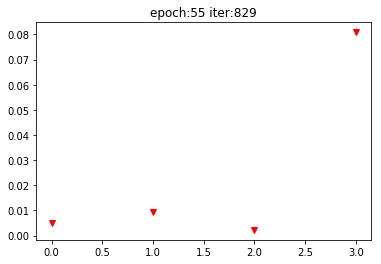

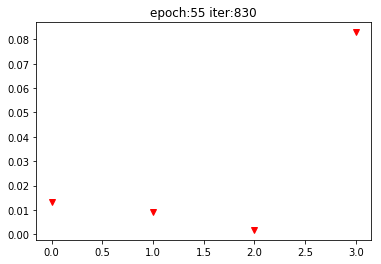

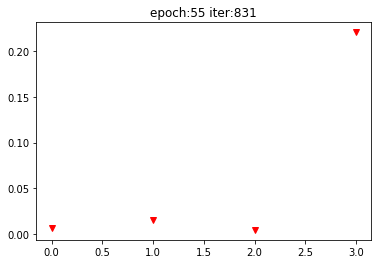

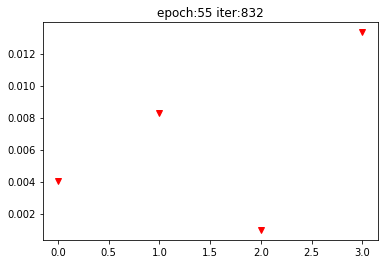

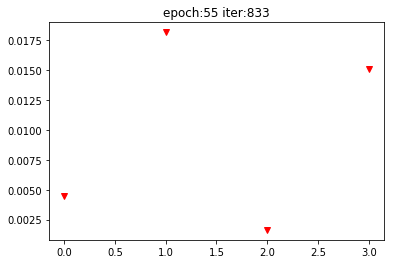

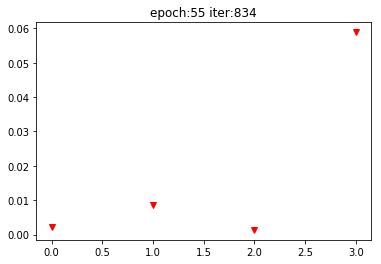

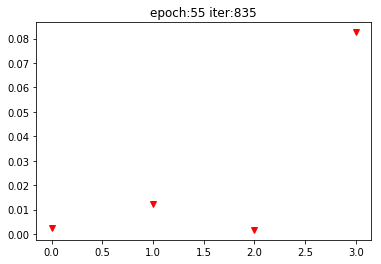

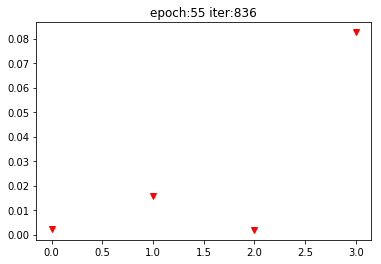

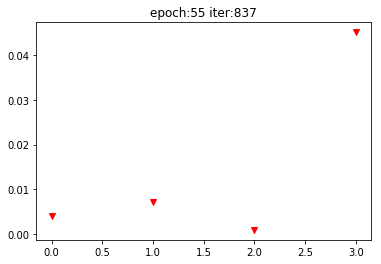

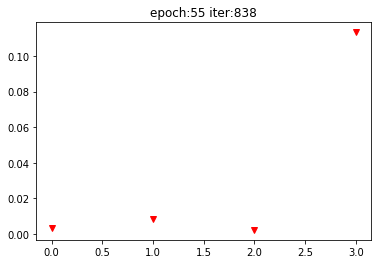

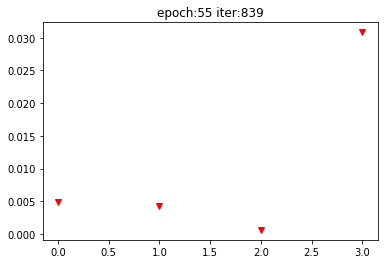

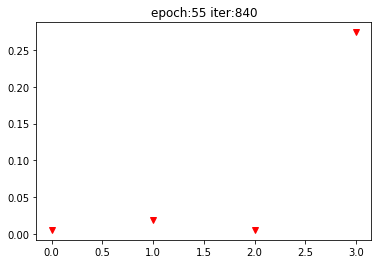

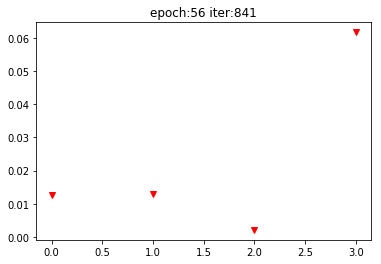

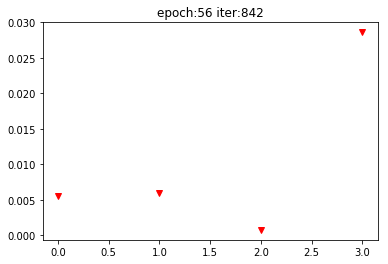

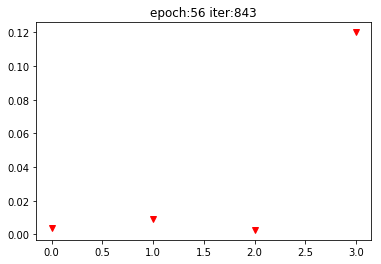

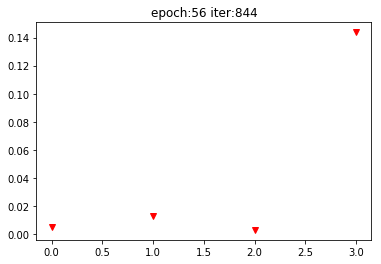

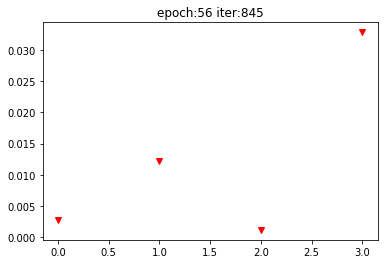

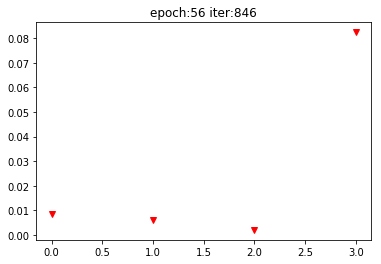

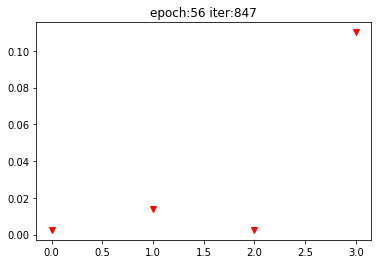

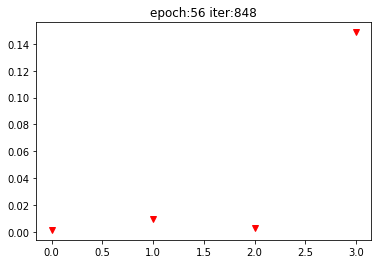

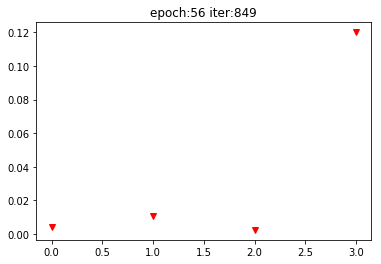

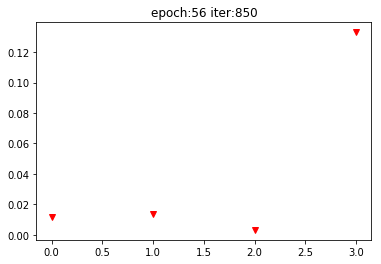

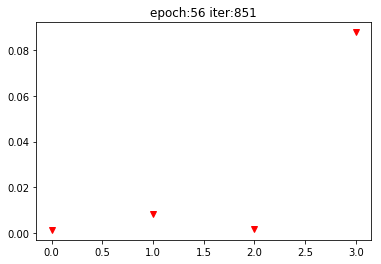

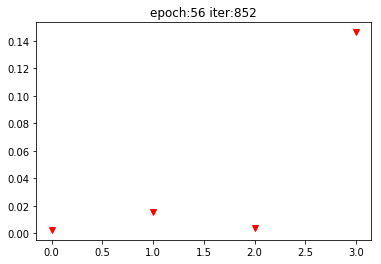

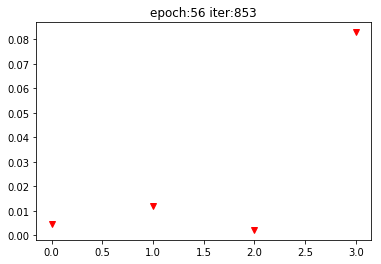

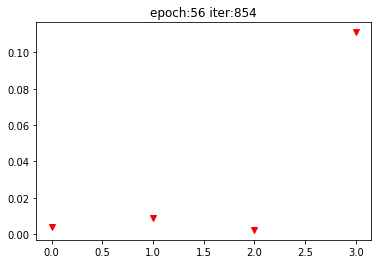

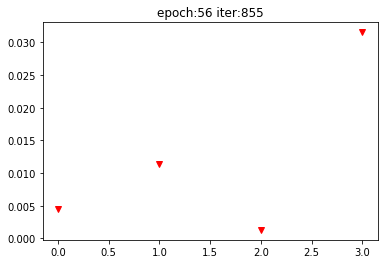

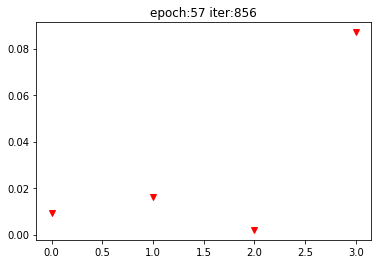

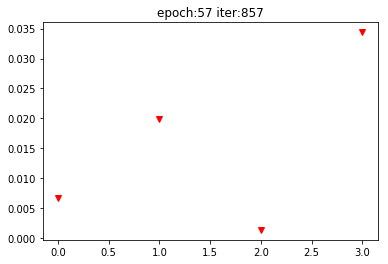

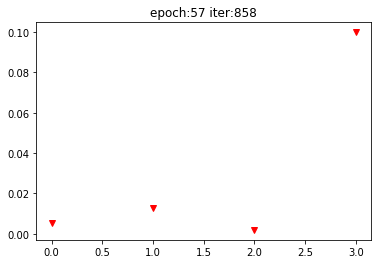

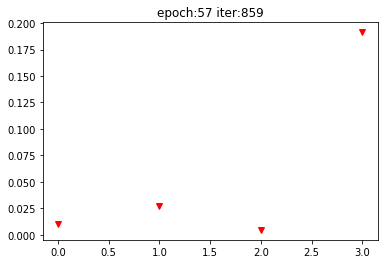

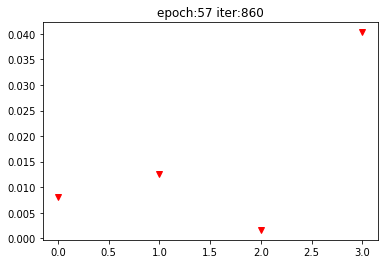

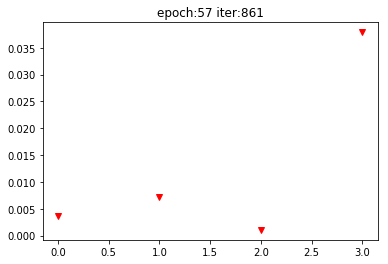

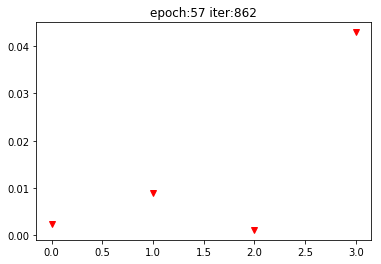

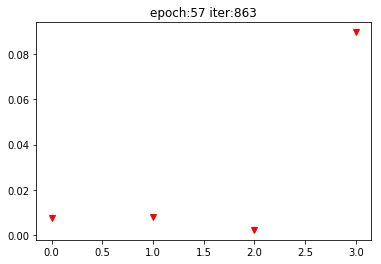

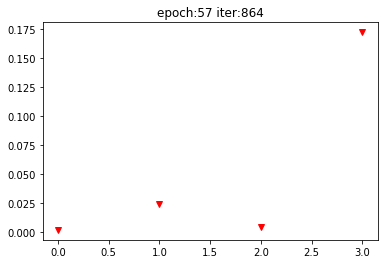

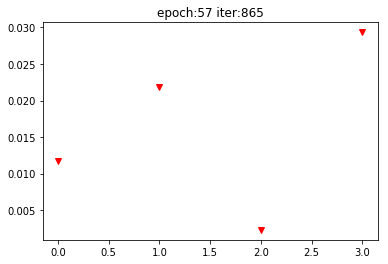

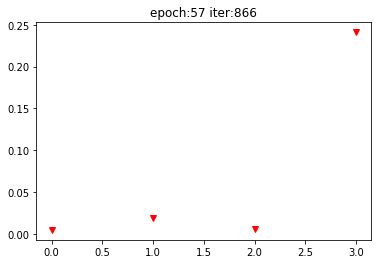

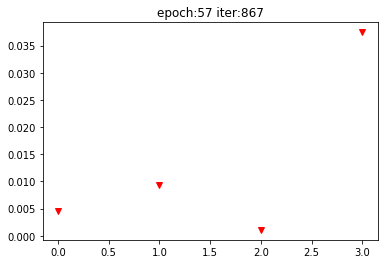

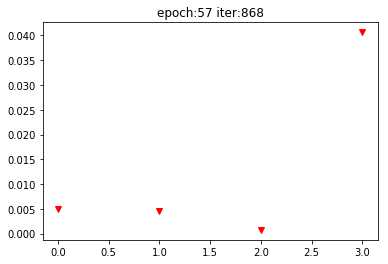

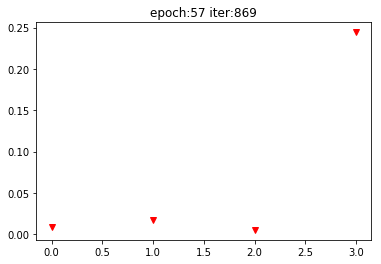

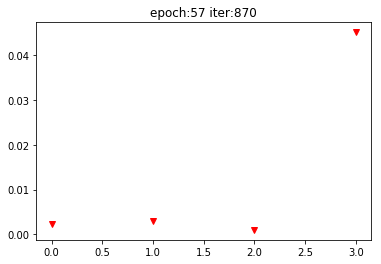

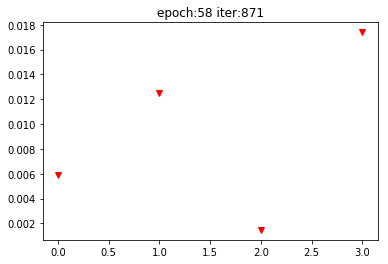

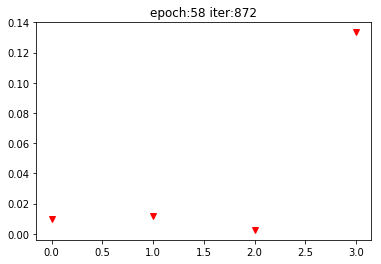

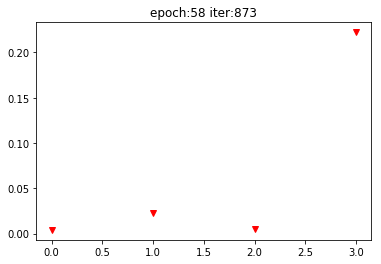

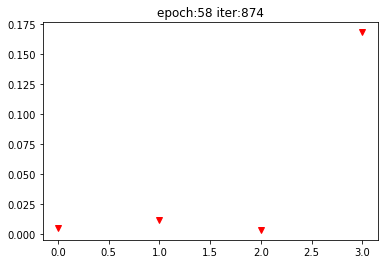

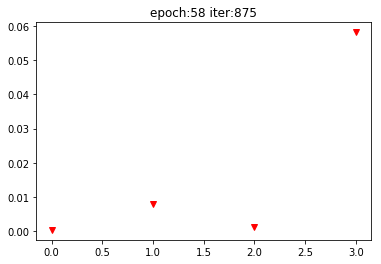

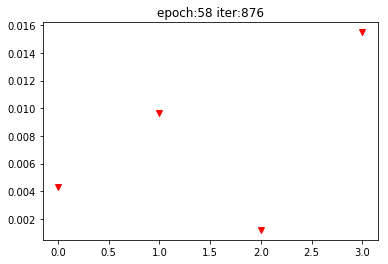

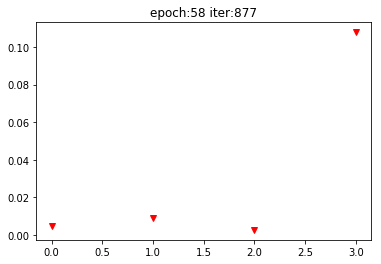

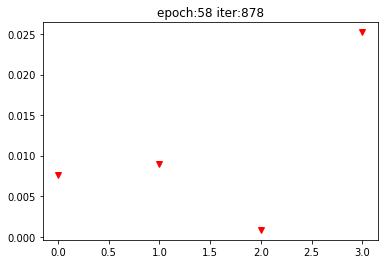

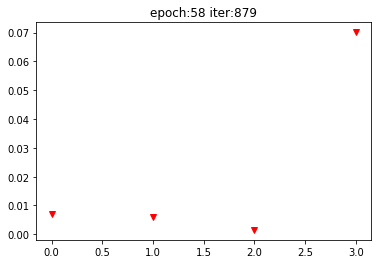

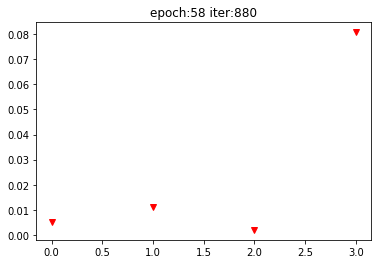

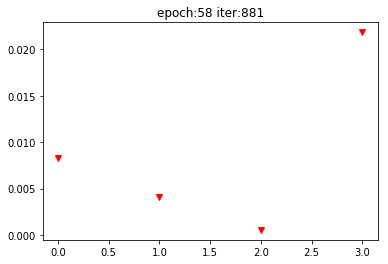

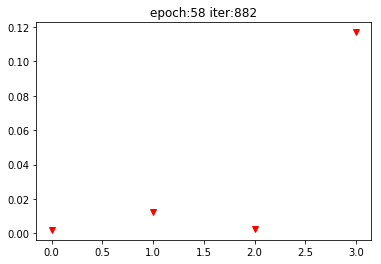

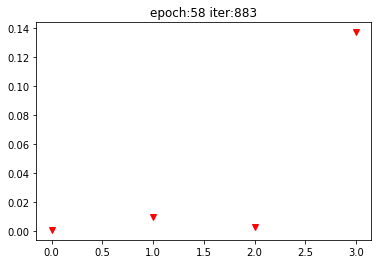

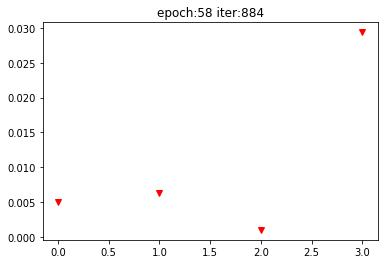

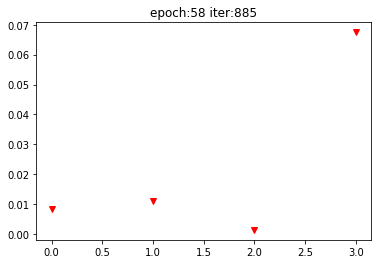

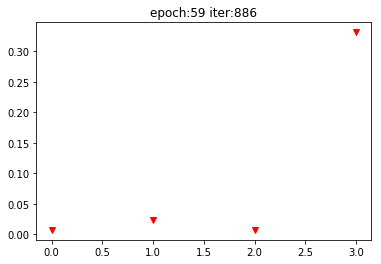

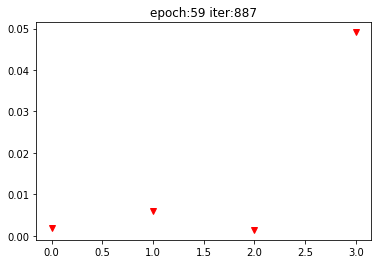

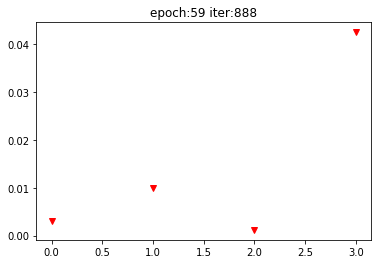

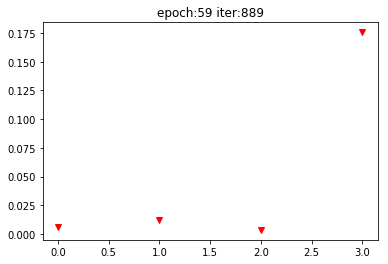

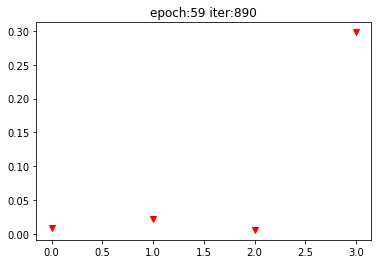

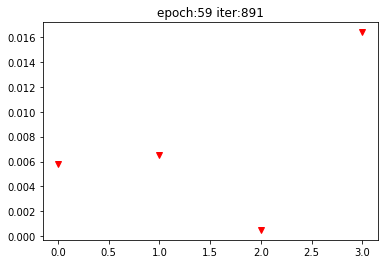

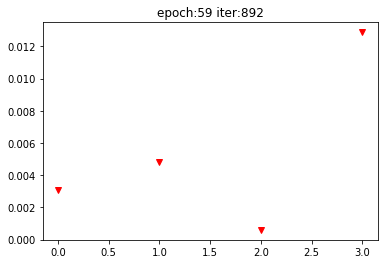

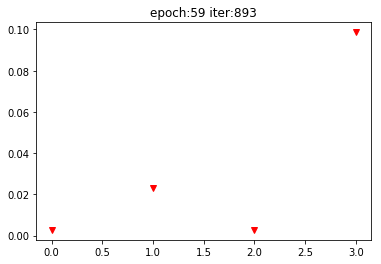

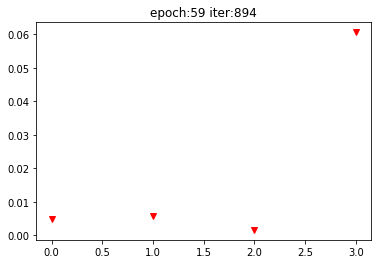

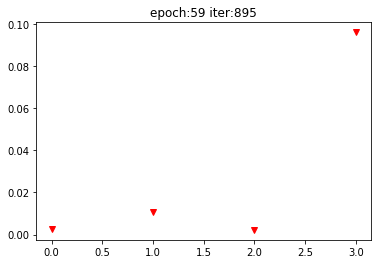

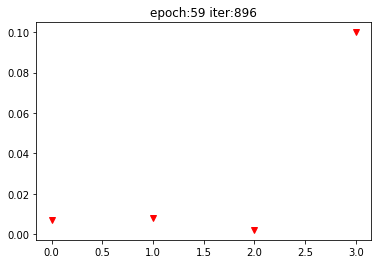

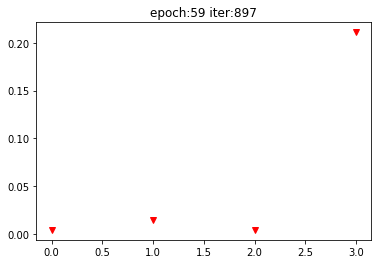

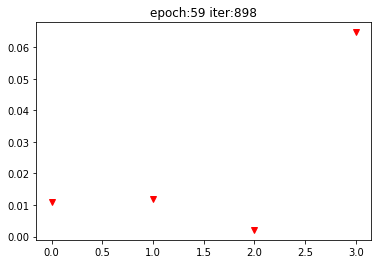

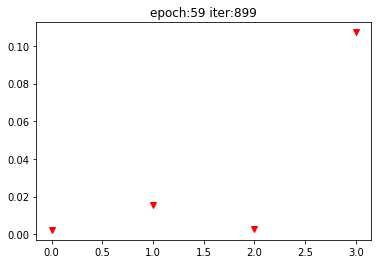

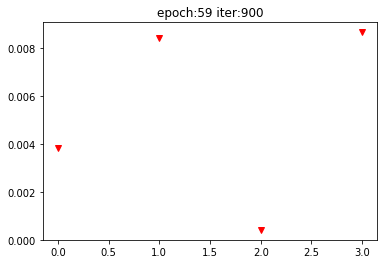

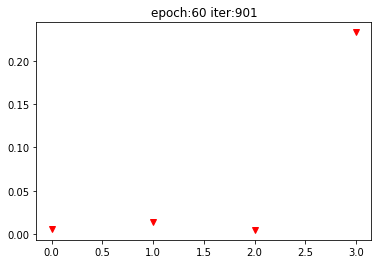

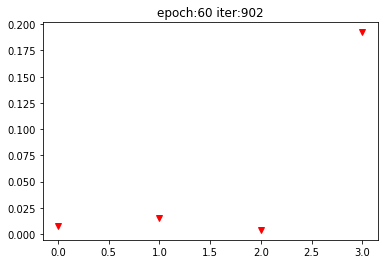

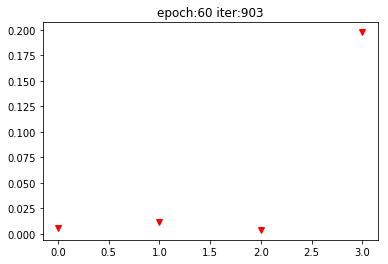

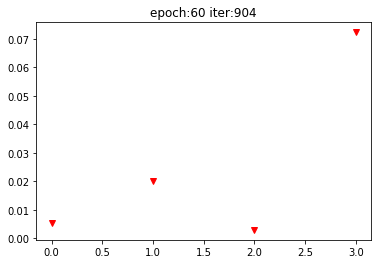

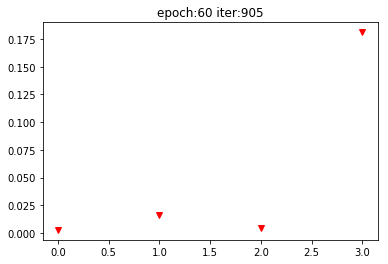

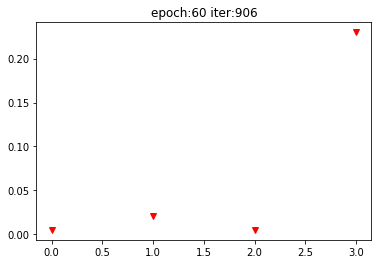

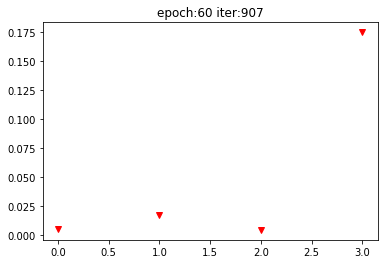

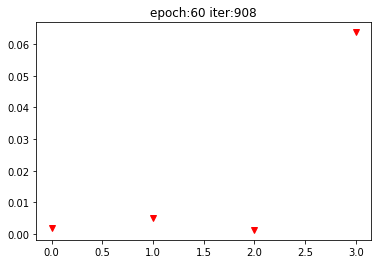

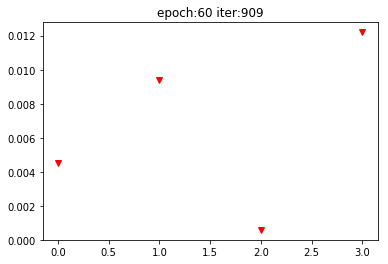

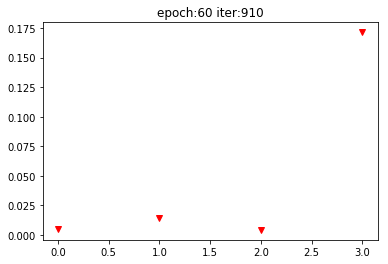

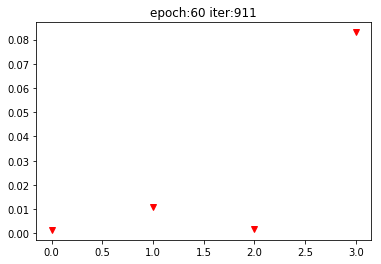

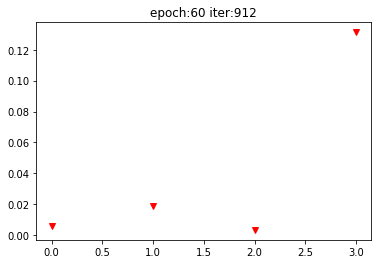

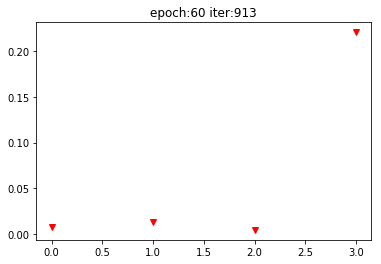

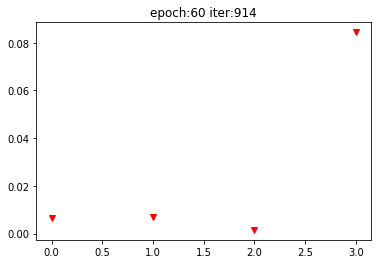

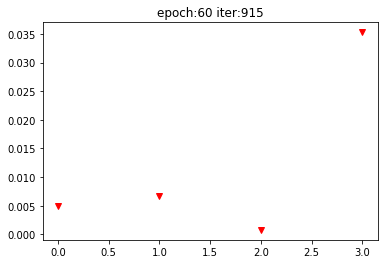

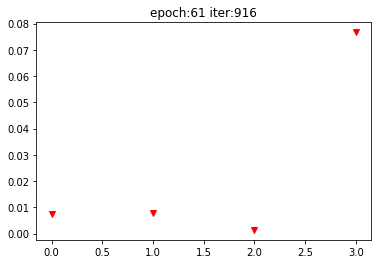

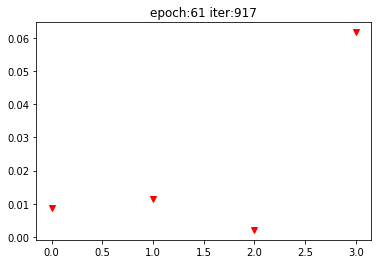

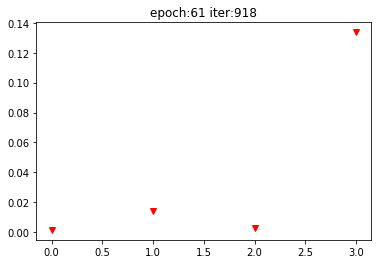

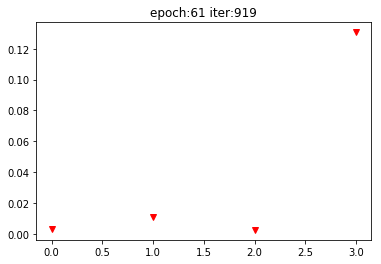

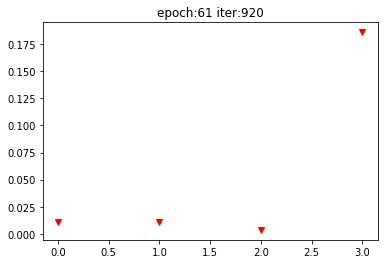

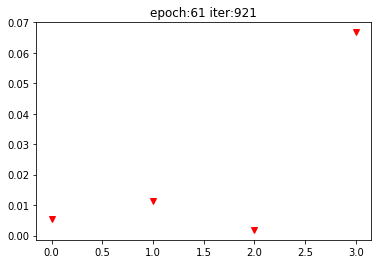

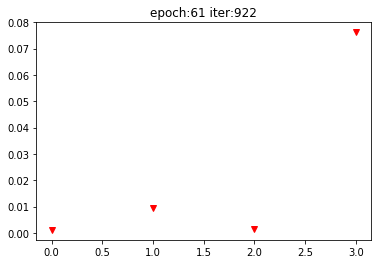

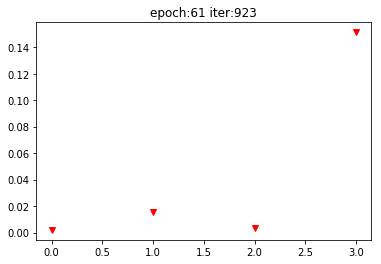

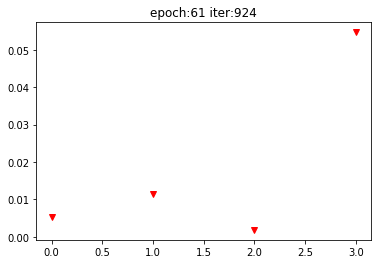

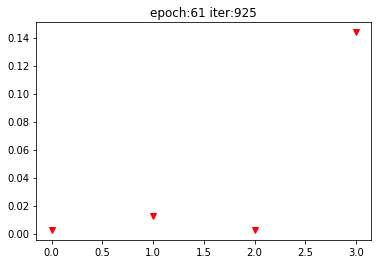

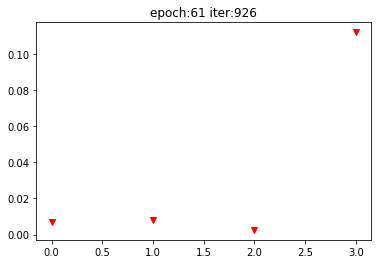

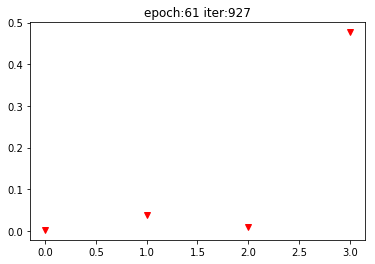

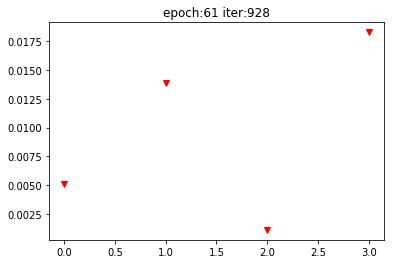

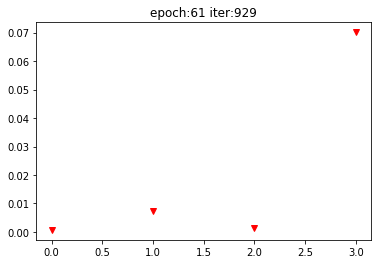

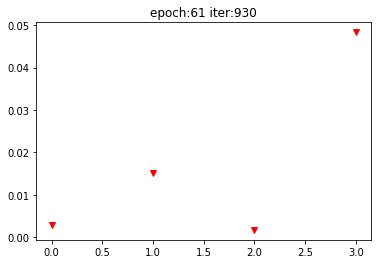

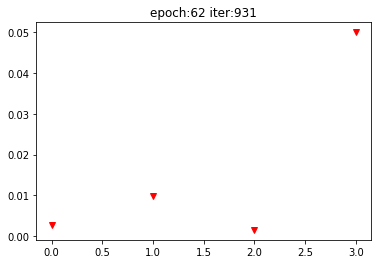

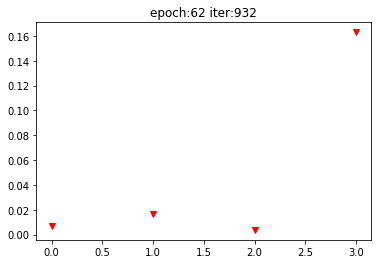

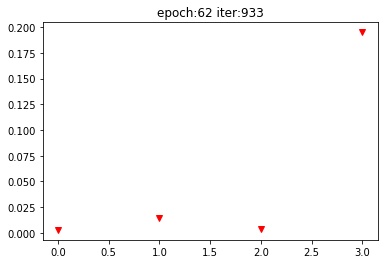

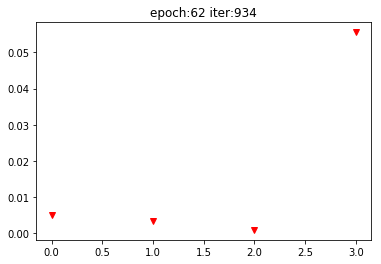

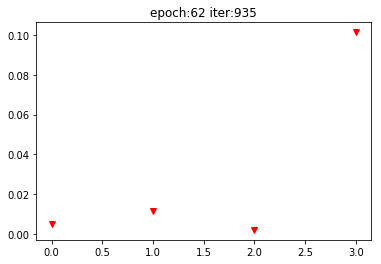

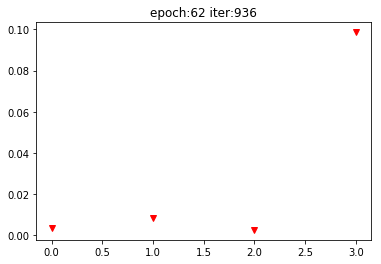

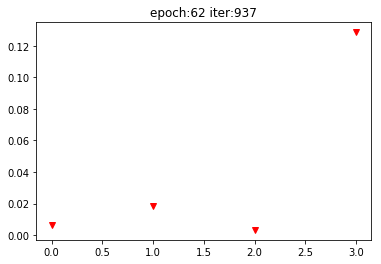

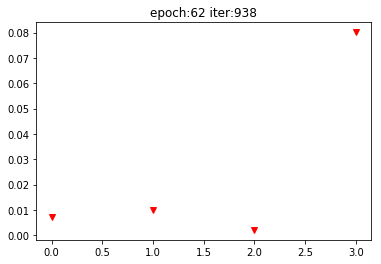

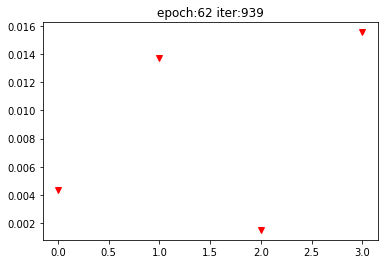

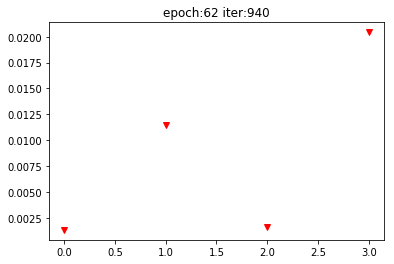

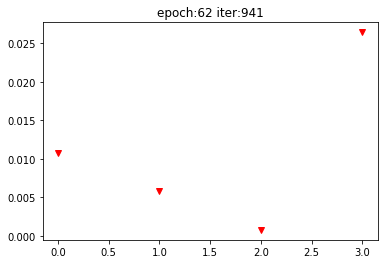

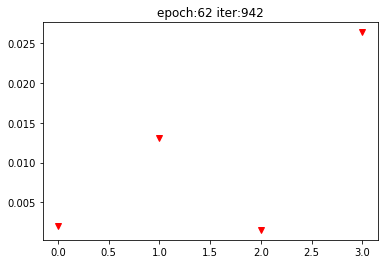

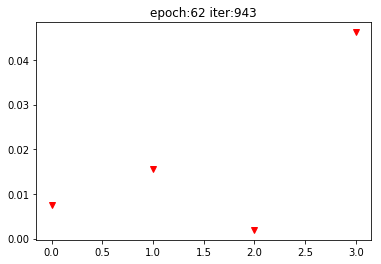

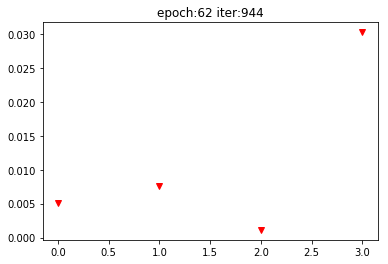

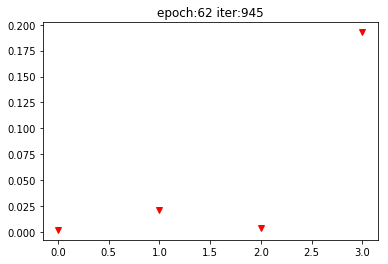

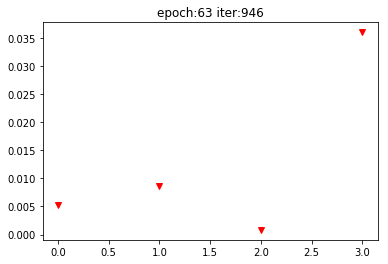

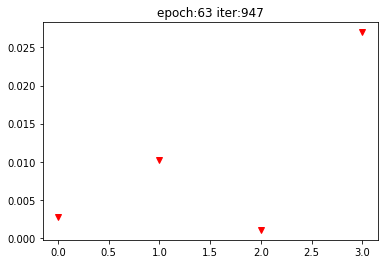

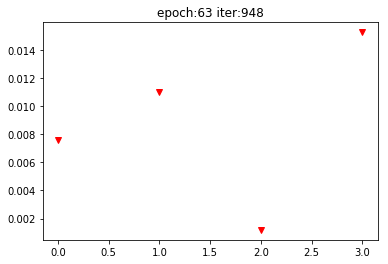

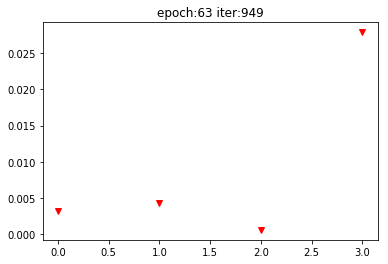

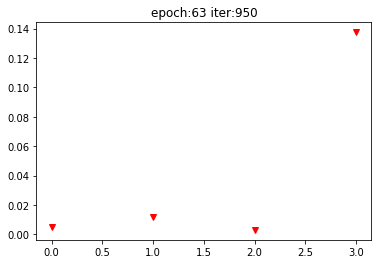

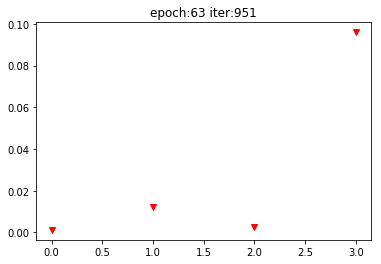

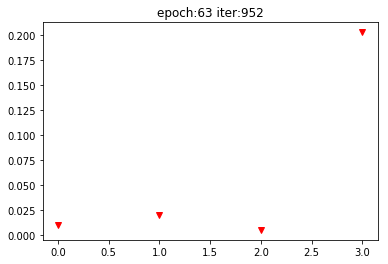

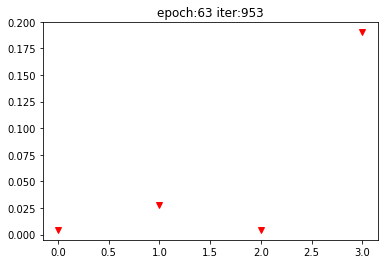

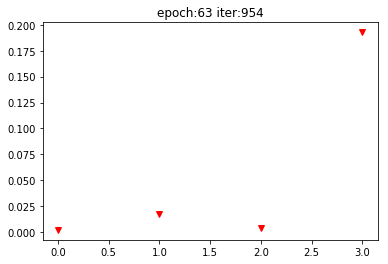

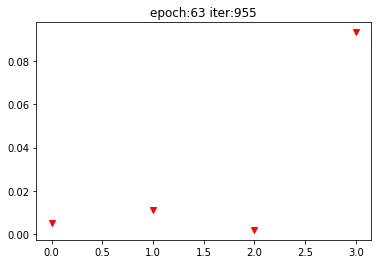

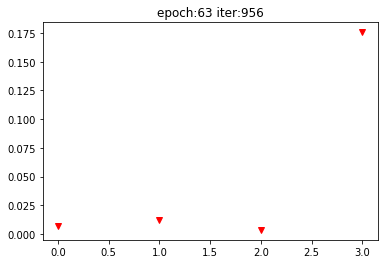

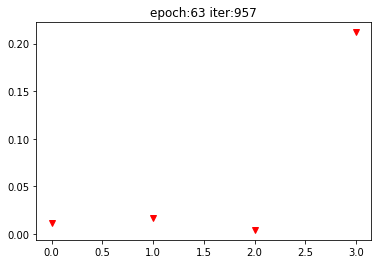

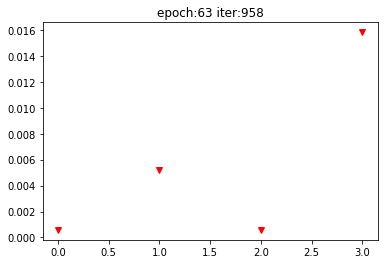

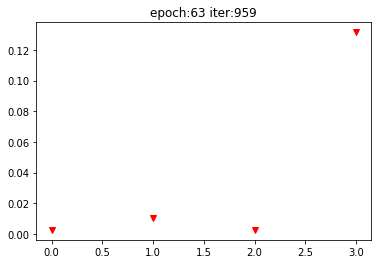

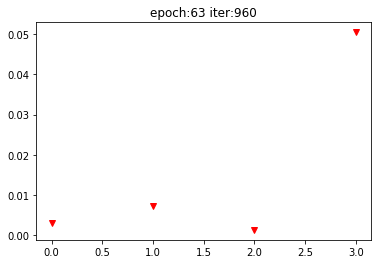

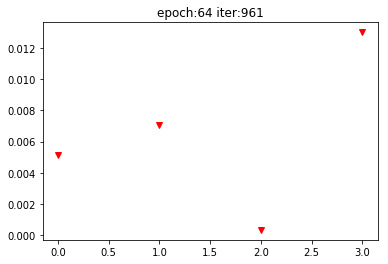

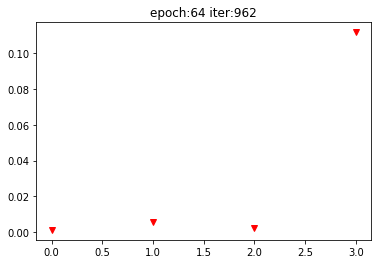

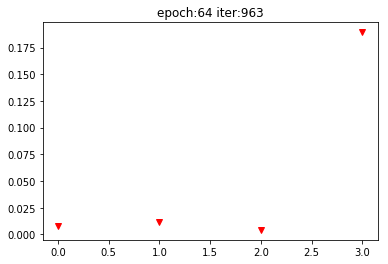

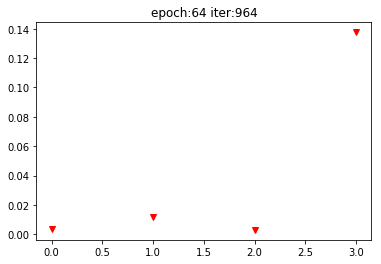

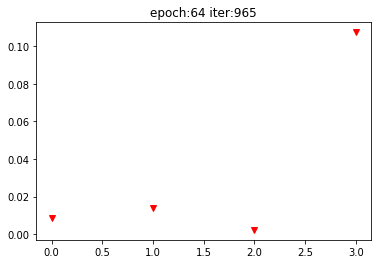

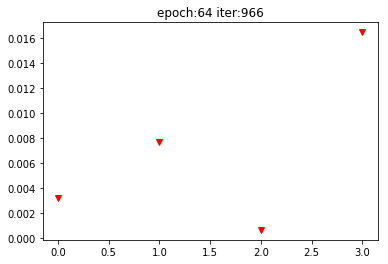

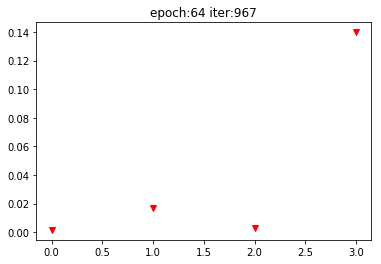

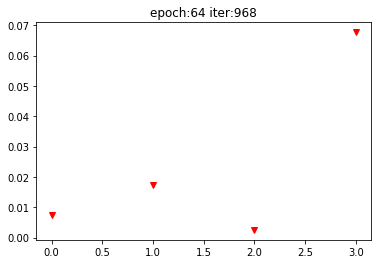

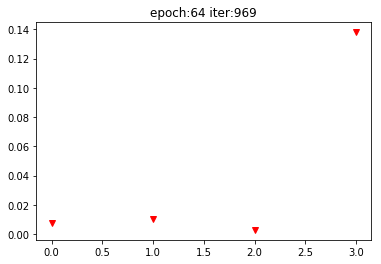

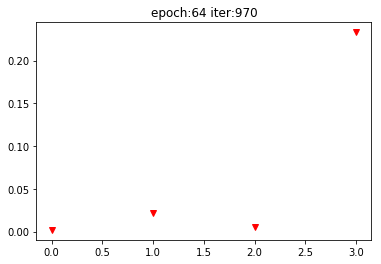

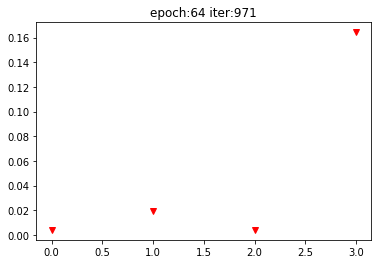

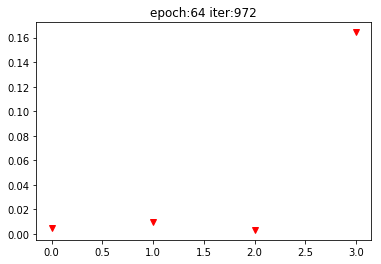

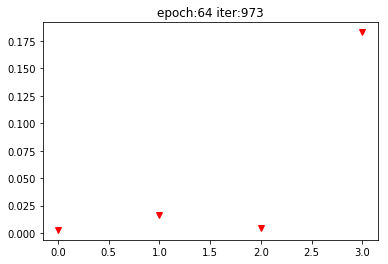

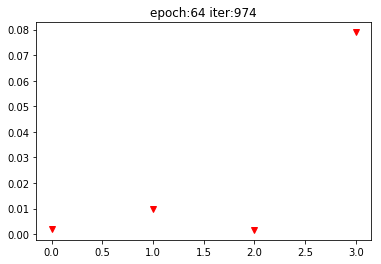

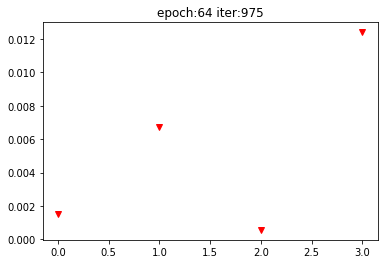

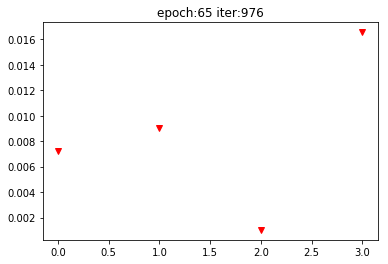

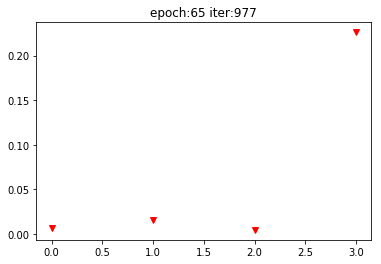

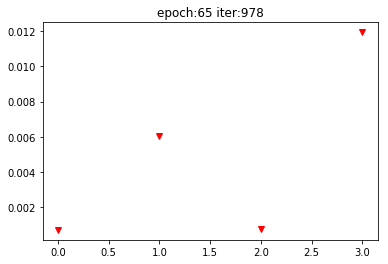

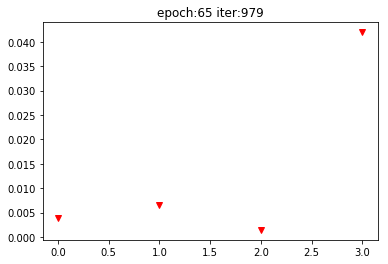

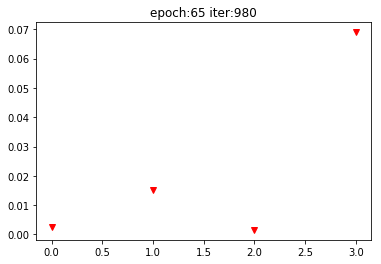

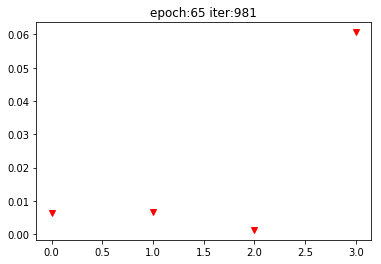

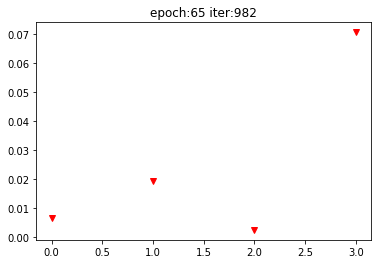

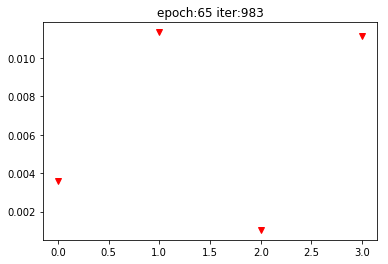

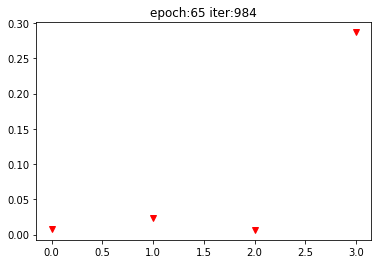

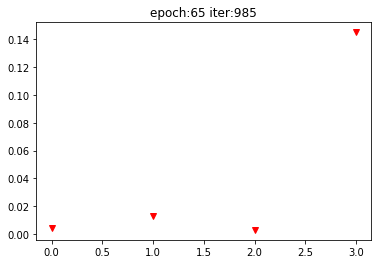

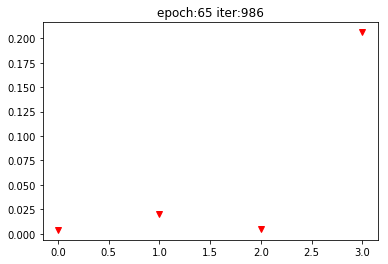

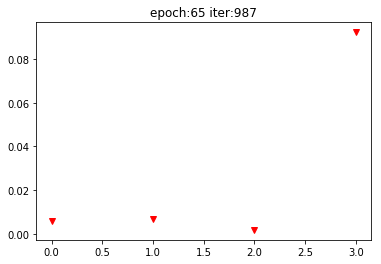

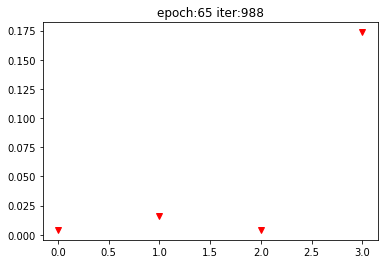

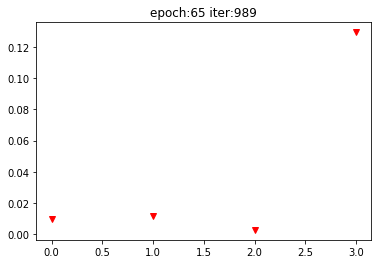

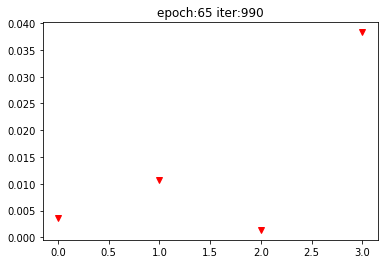

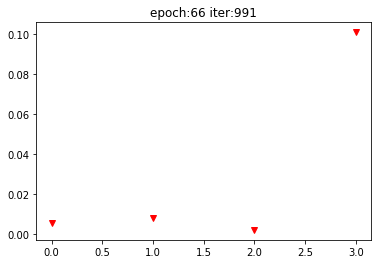

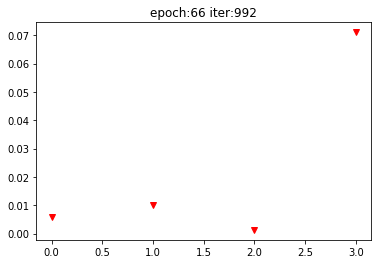

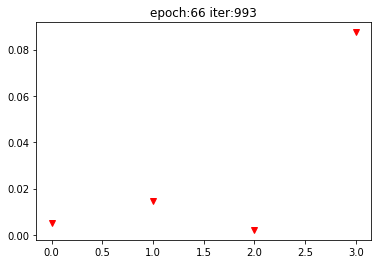

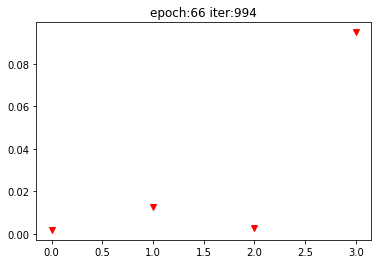

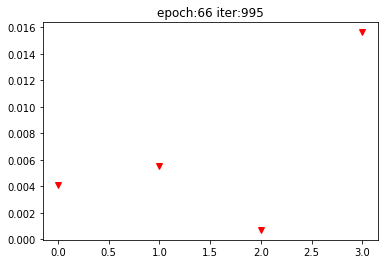

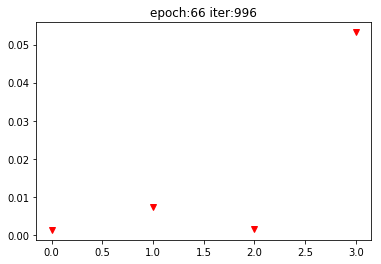

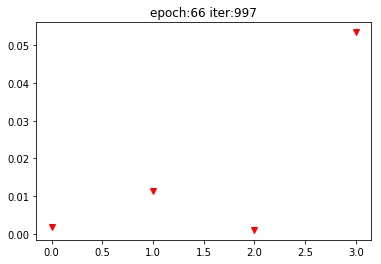

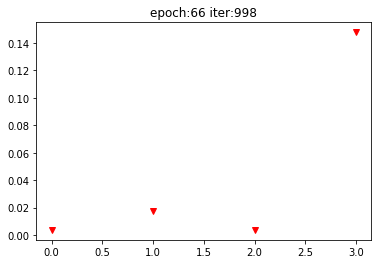

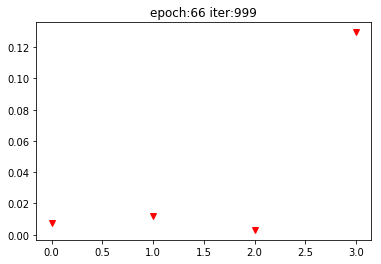

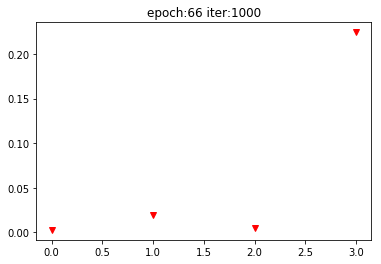

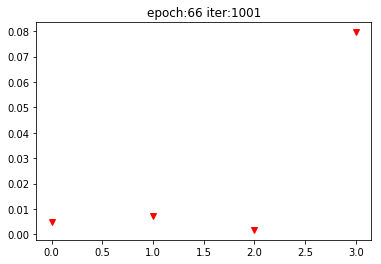

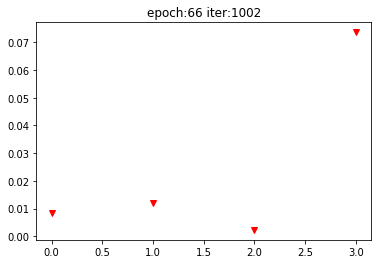

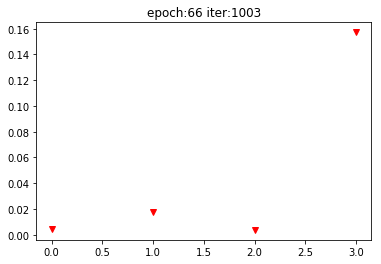

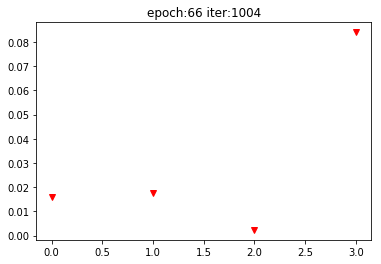

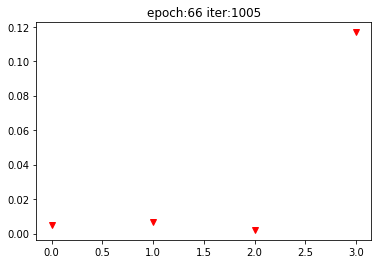

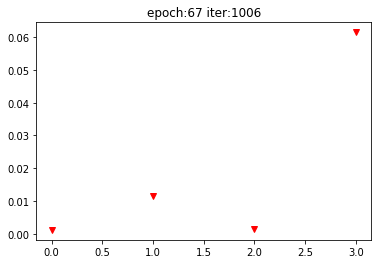

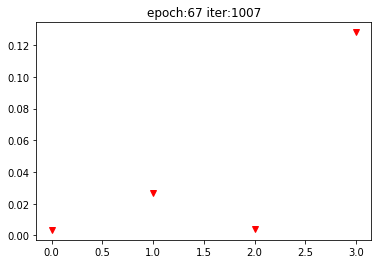

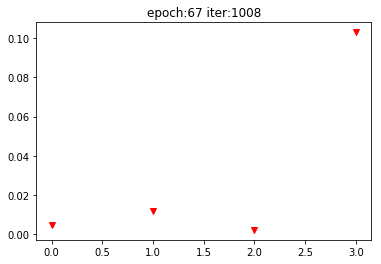

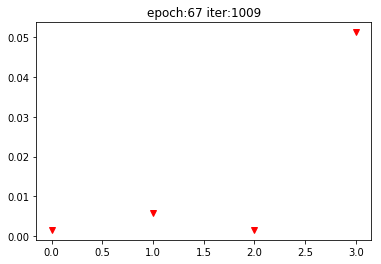

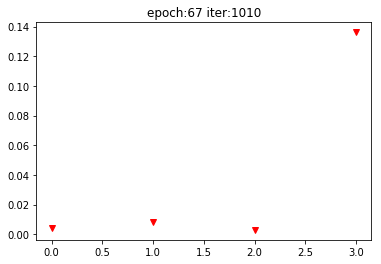

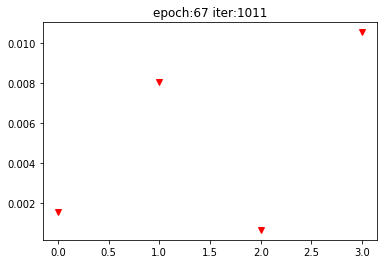

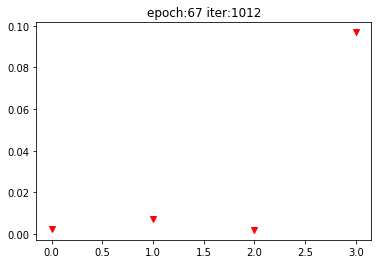

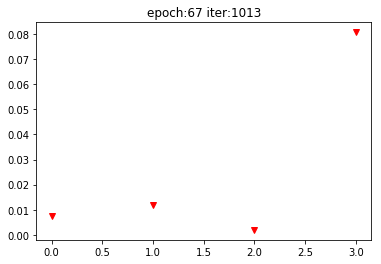

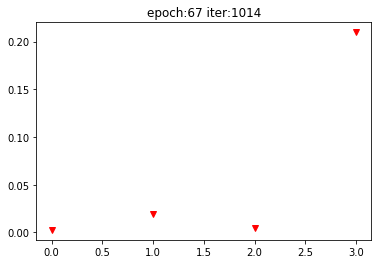

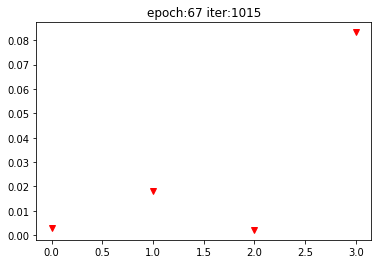

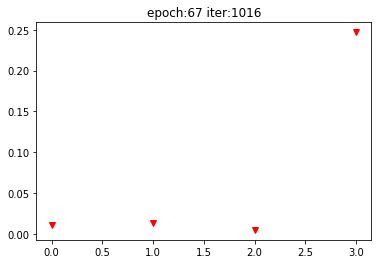

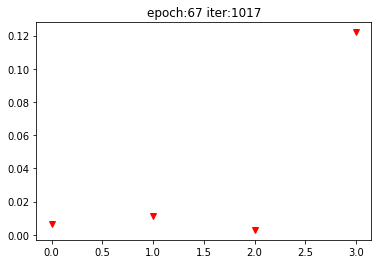

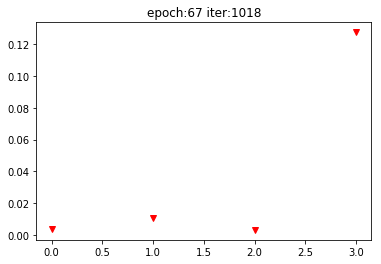

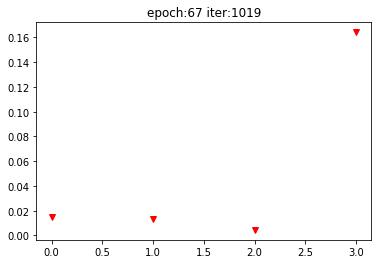

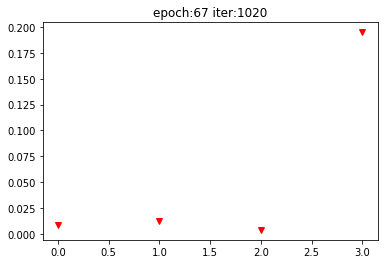

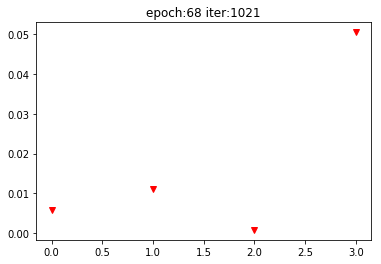

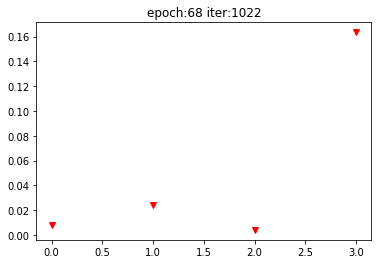

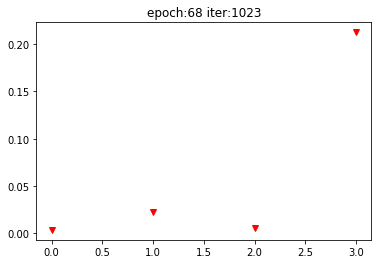

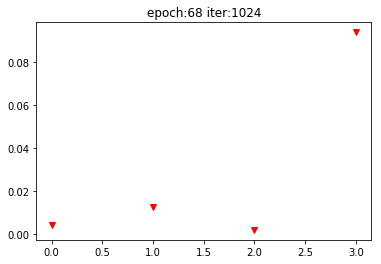

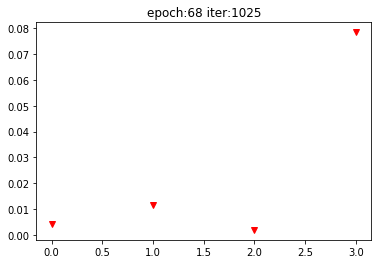

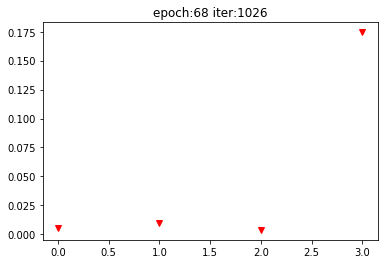

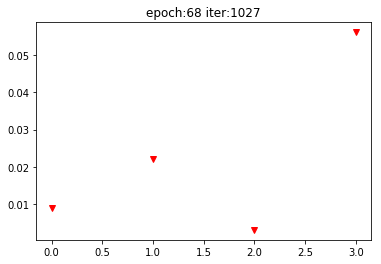

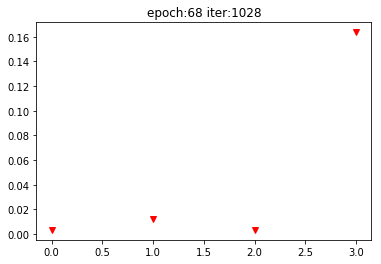

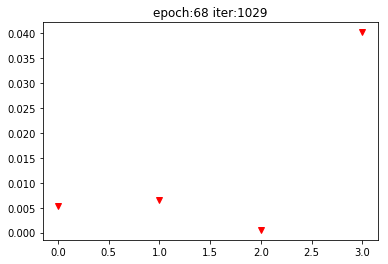

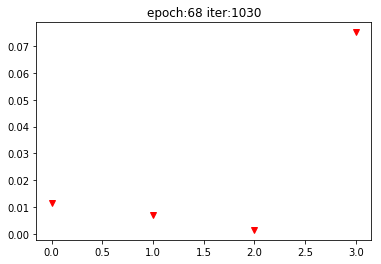

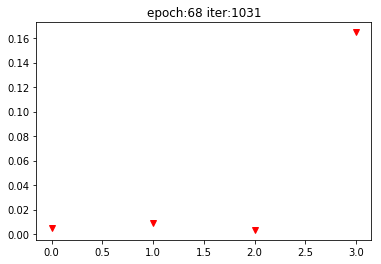

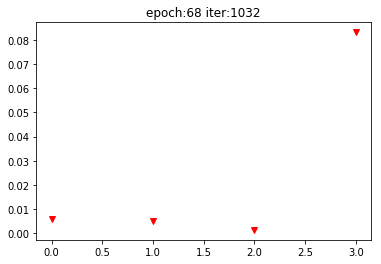

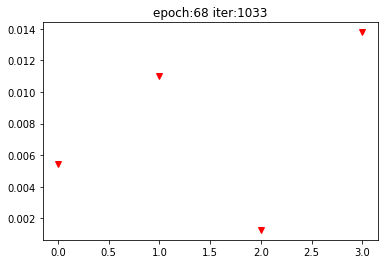

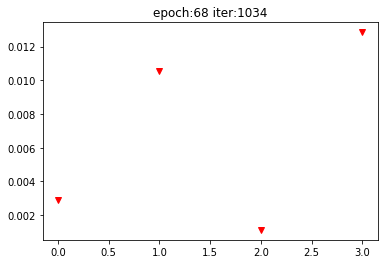

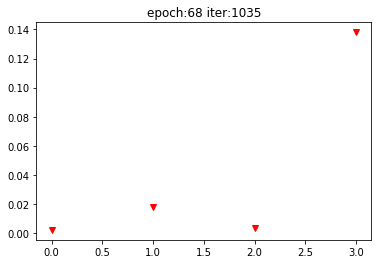

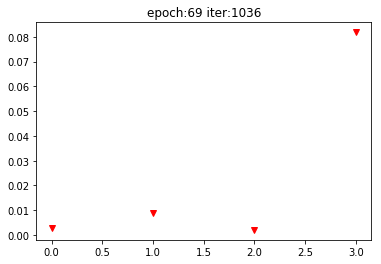

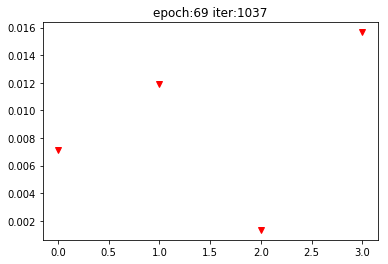

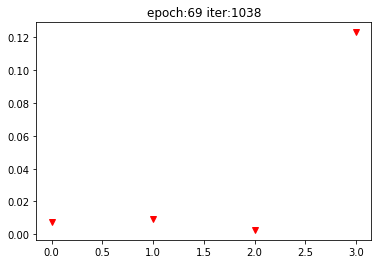

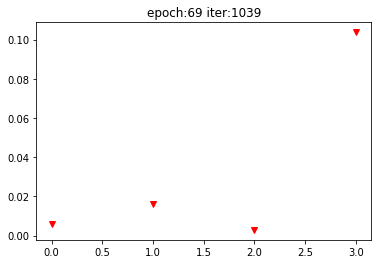

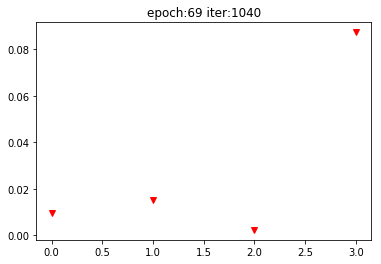

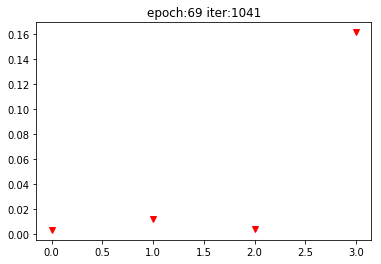

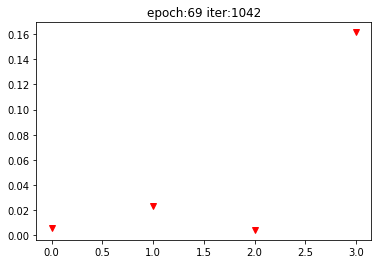

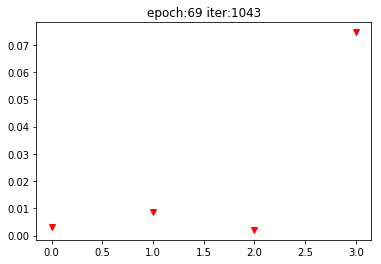

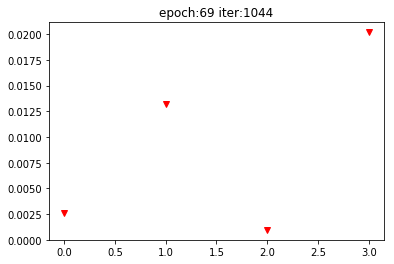

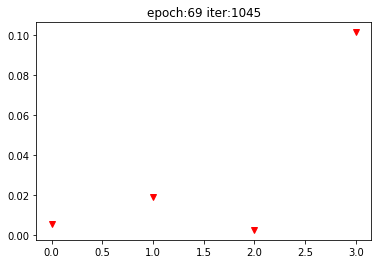

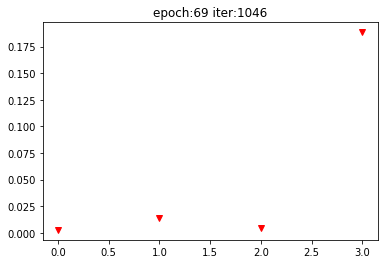

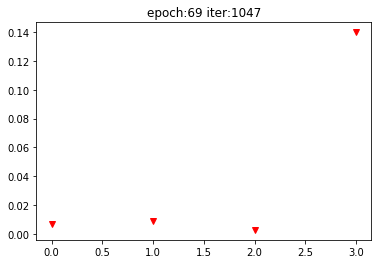

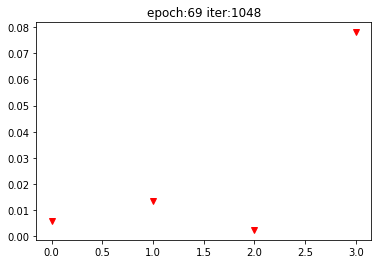

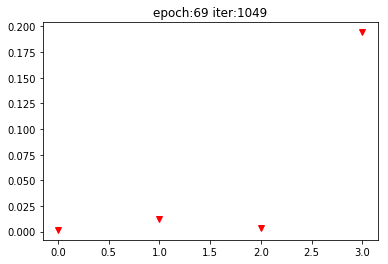

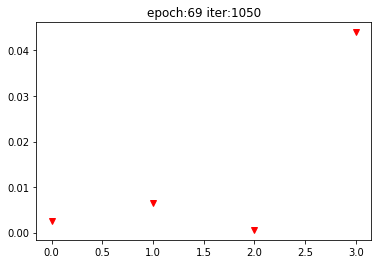

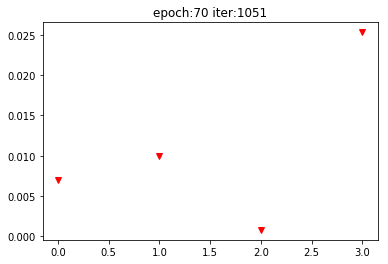

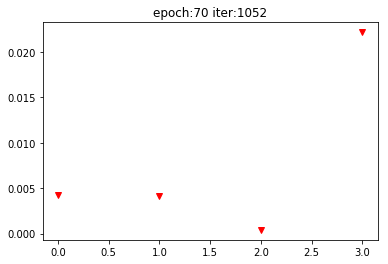

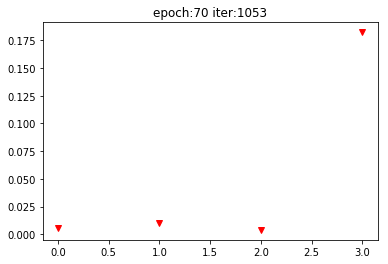

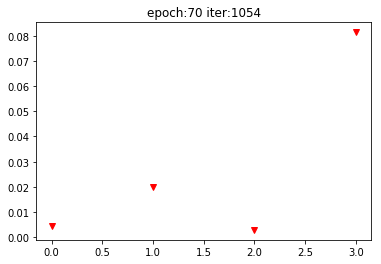

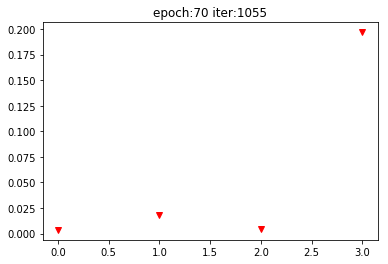

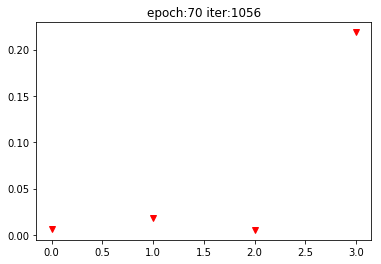

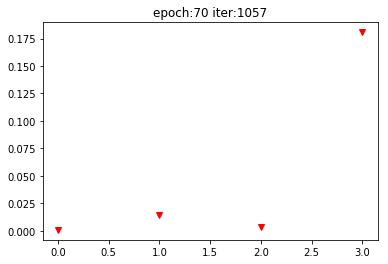

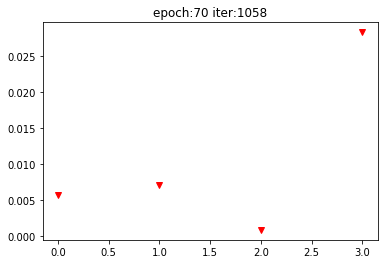

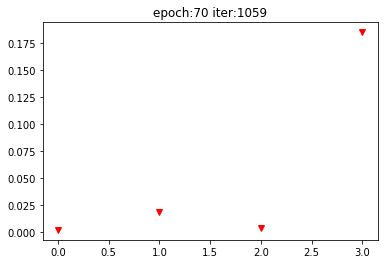

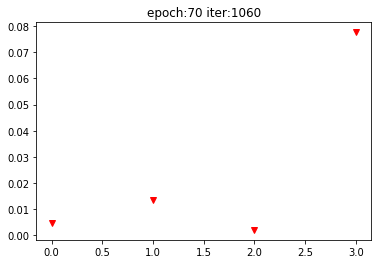

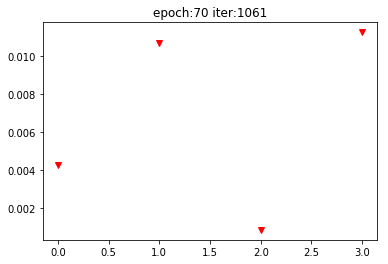

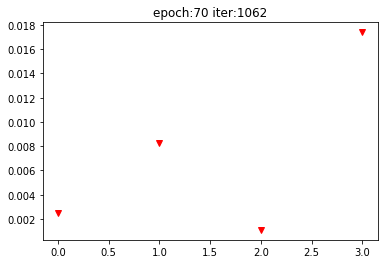

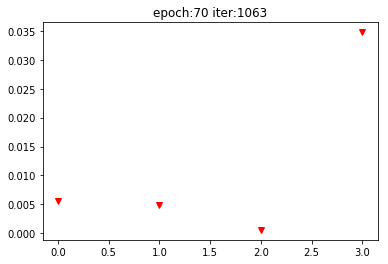

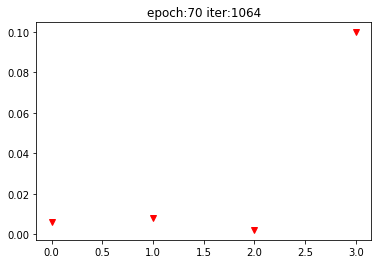

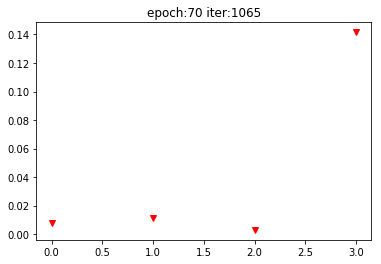

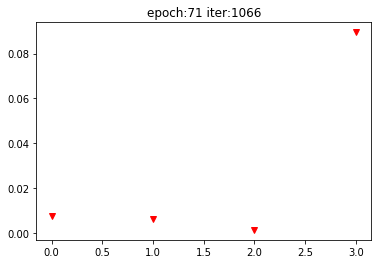

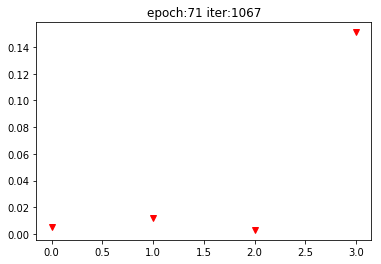

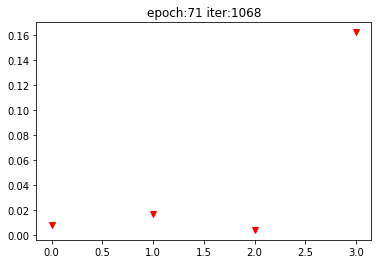

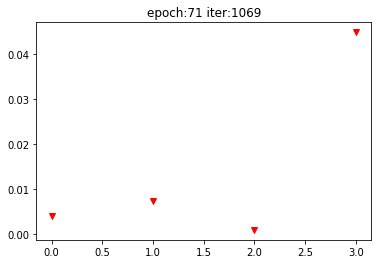

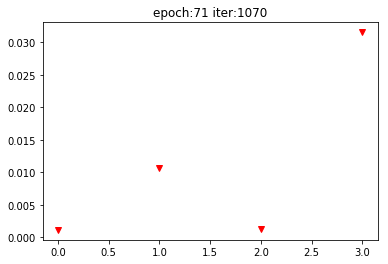

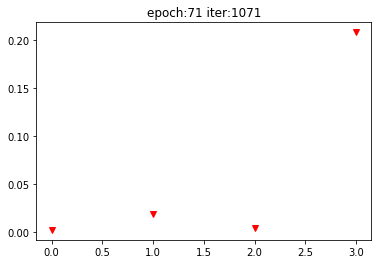

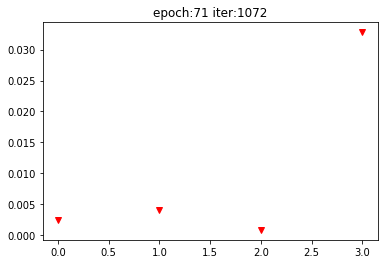

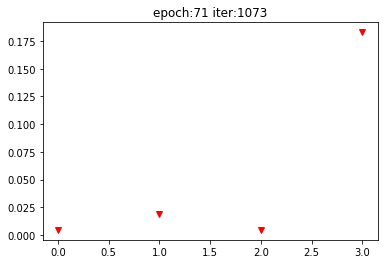

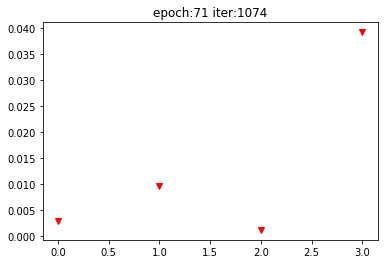

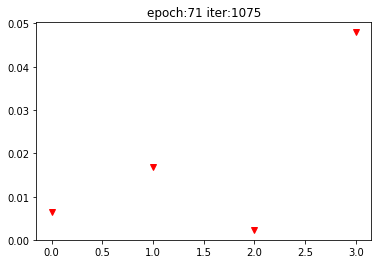

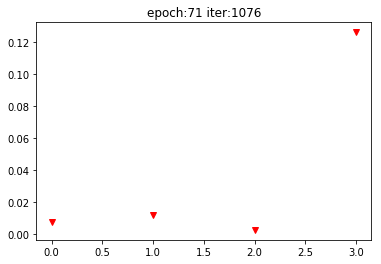

In [ ]:
model.apply(weights_init)
train_loss_rec = []
iter = 0
if show_weight:
    plt.figure()
    
for epoch in range(num_epochs):
    train_loss = 0
    for i, data in enumerate(train_loader):
        data['data'] = data['data'].type(torch.FloatTensor)
        data['label'] = data['label'].type(torch.FloatTensor)
        if torch.cuda.is_available():
            input_data = Variable(data['data'].cuda())
            label = Variable(data['label'].cuda())
        else:
            input_data = Variable(data['data'])
            label = Variable(data['label'])

        # ===================forward=====================
        output = model(input_data)
        loss = criterion(output, label)
        # ===================backward====================
        optimizer.zero_grad()
        
        loss.backward()
        if show_weight:
            iter = iter+1
            layer_grad = []
            layer_grad.append(np.linalg.norm(model.ly1.weight.grad.cpu().data[0]))
            layer_grad.append(np.linalg.norm(model.ly2.weight.grad.cpu().data[0]))
            layer_grad.append(np.linalg.norm(model.ly3.weight.grad.cpu().data[0]))
            layer_grad.append(np.linalg.norm(model.ly4.weight.grad.cpu().data[0]))

            plt.plot(layer_grad, 'rv')
            plt.title('epoch:'+str(epoch)+' iter:'+str(iter))
            plt.show()
        
        optimizer.step()
        train_loss += loss
    
    train_loss = train_loss/len(train_loader)
    train_loss_rec.append(train_loss.data[0])
    # ===================log========================
    if epoch % 100 == 0:
        print('epoch [{}/{}], Training loss:{:.4f}'.format(epoch + 1, num_epochs, train_loss.data[0]))
        
print('Visualizing decision boundary...')
#torch.save(model.state_dict(), 'mymodel.pt')
X = np.load('demo_data_x.npy')
Y = np.load('demo_data_y.npy')
virtualization(X, Y, model)
plt.plot(train_loss_rec)
if relu_flag:
    plt.title('ReLU')
else:
    plt.title('Sigmoid')
